In [1]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

In [2]:
import os
from models.raw_audio import ResTSSDNetWrapper
from models.raw_audio import IncTSSDNetWrapper
from datasets.SPCUP22DataModule import SPCUP22DataModule

/home/iubnlp/anaconda3/envs/spcup2022/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores
)

In [4]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/inc_tssdnet/last.ckpt"
)
data_module = SPCUP22DataModule(64, dataset_root=pathlib.Path(ROOT).joinpath("data", "spcup22"))

In [5]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_eval_part1.zip]...
Predicting: 100%|██████████| 16/16 [00:01<00:00,  8.79it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [6]:
print_scores(actual_labels, predictions)


    F1 Score: 0.98
    Accuracy: 0.98
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


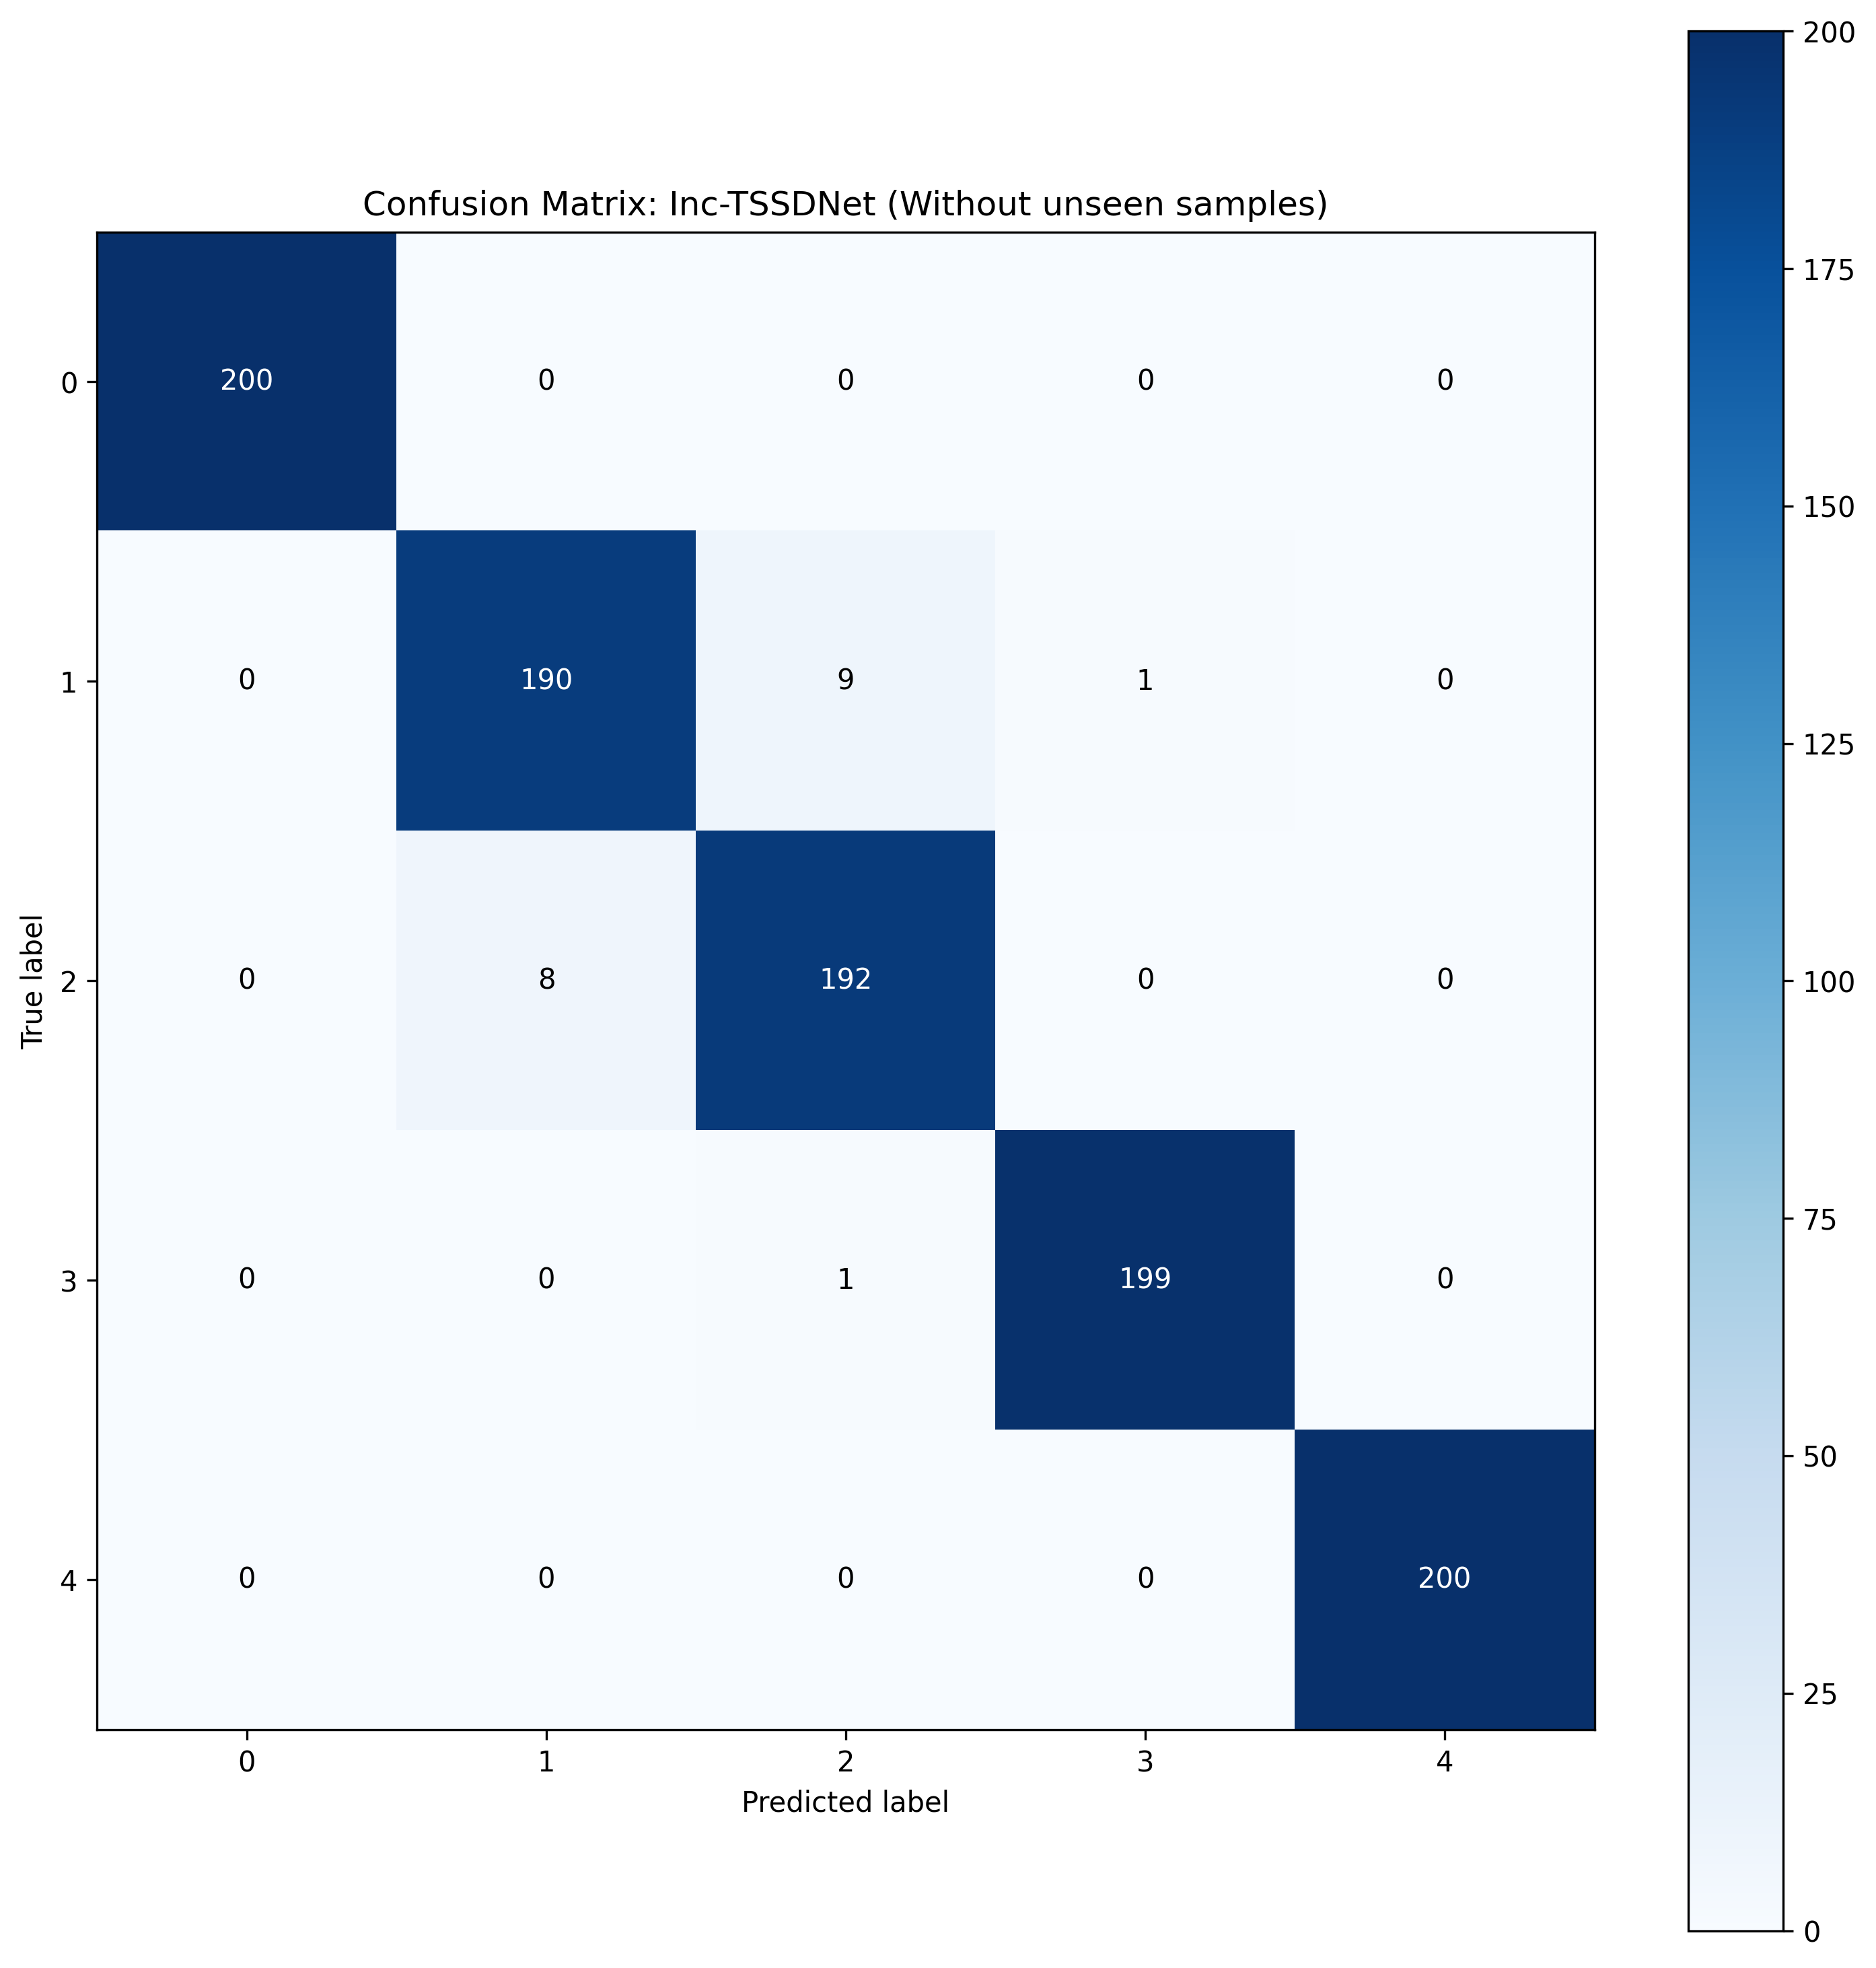

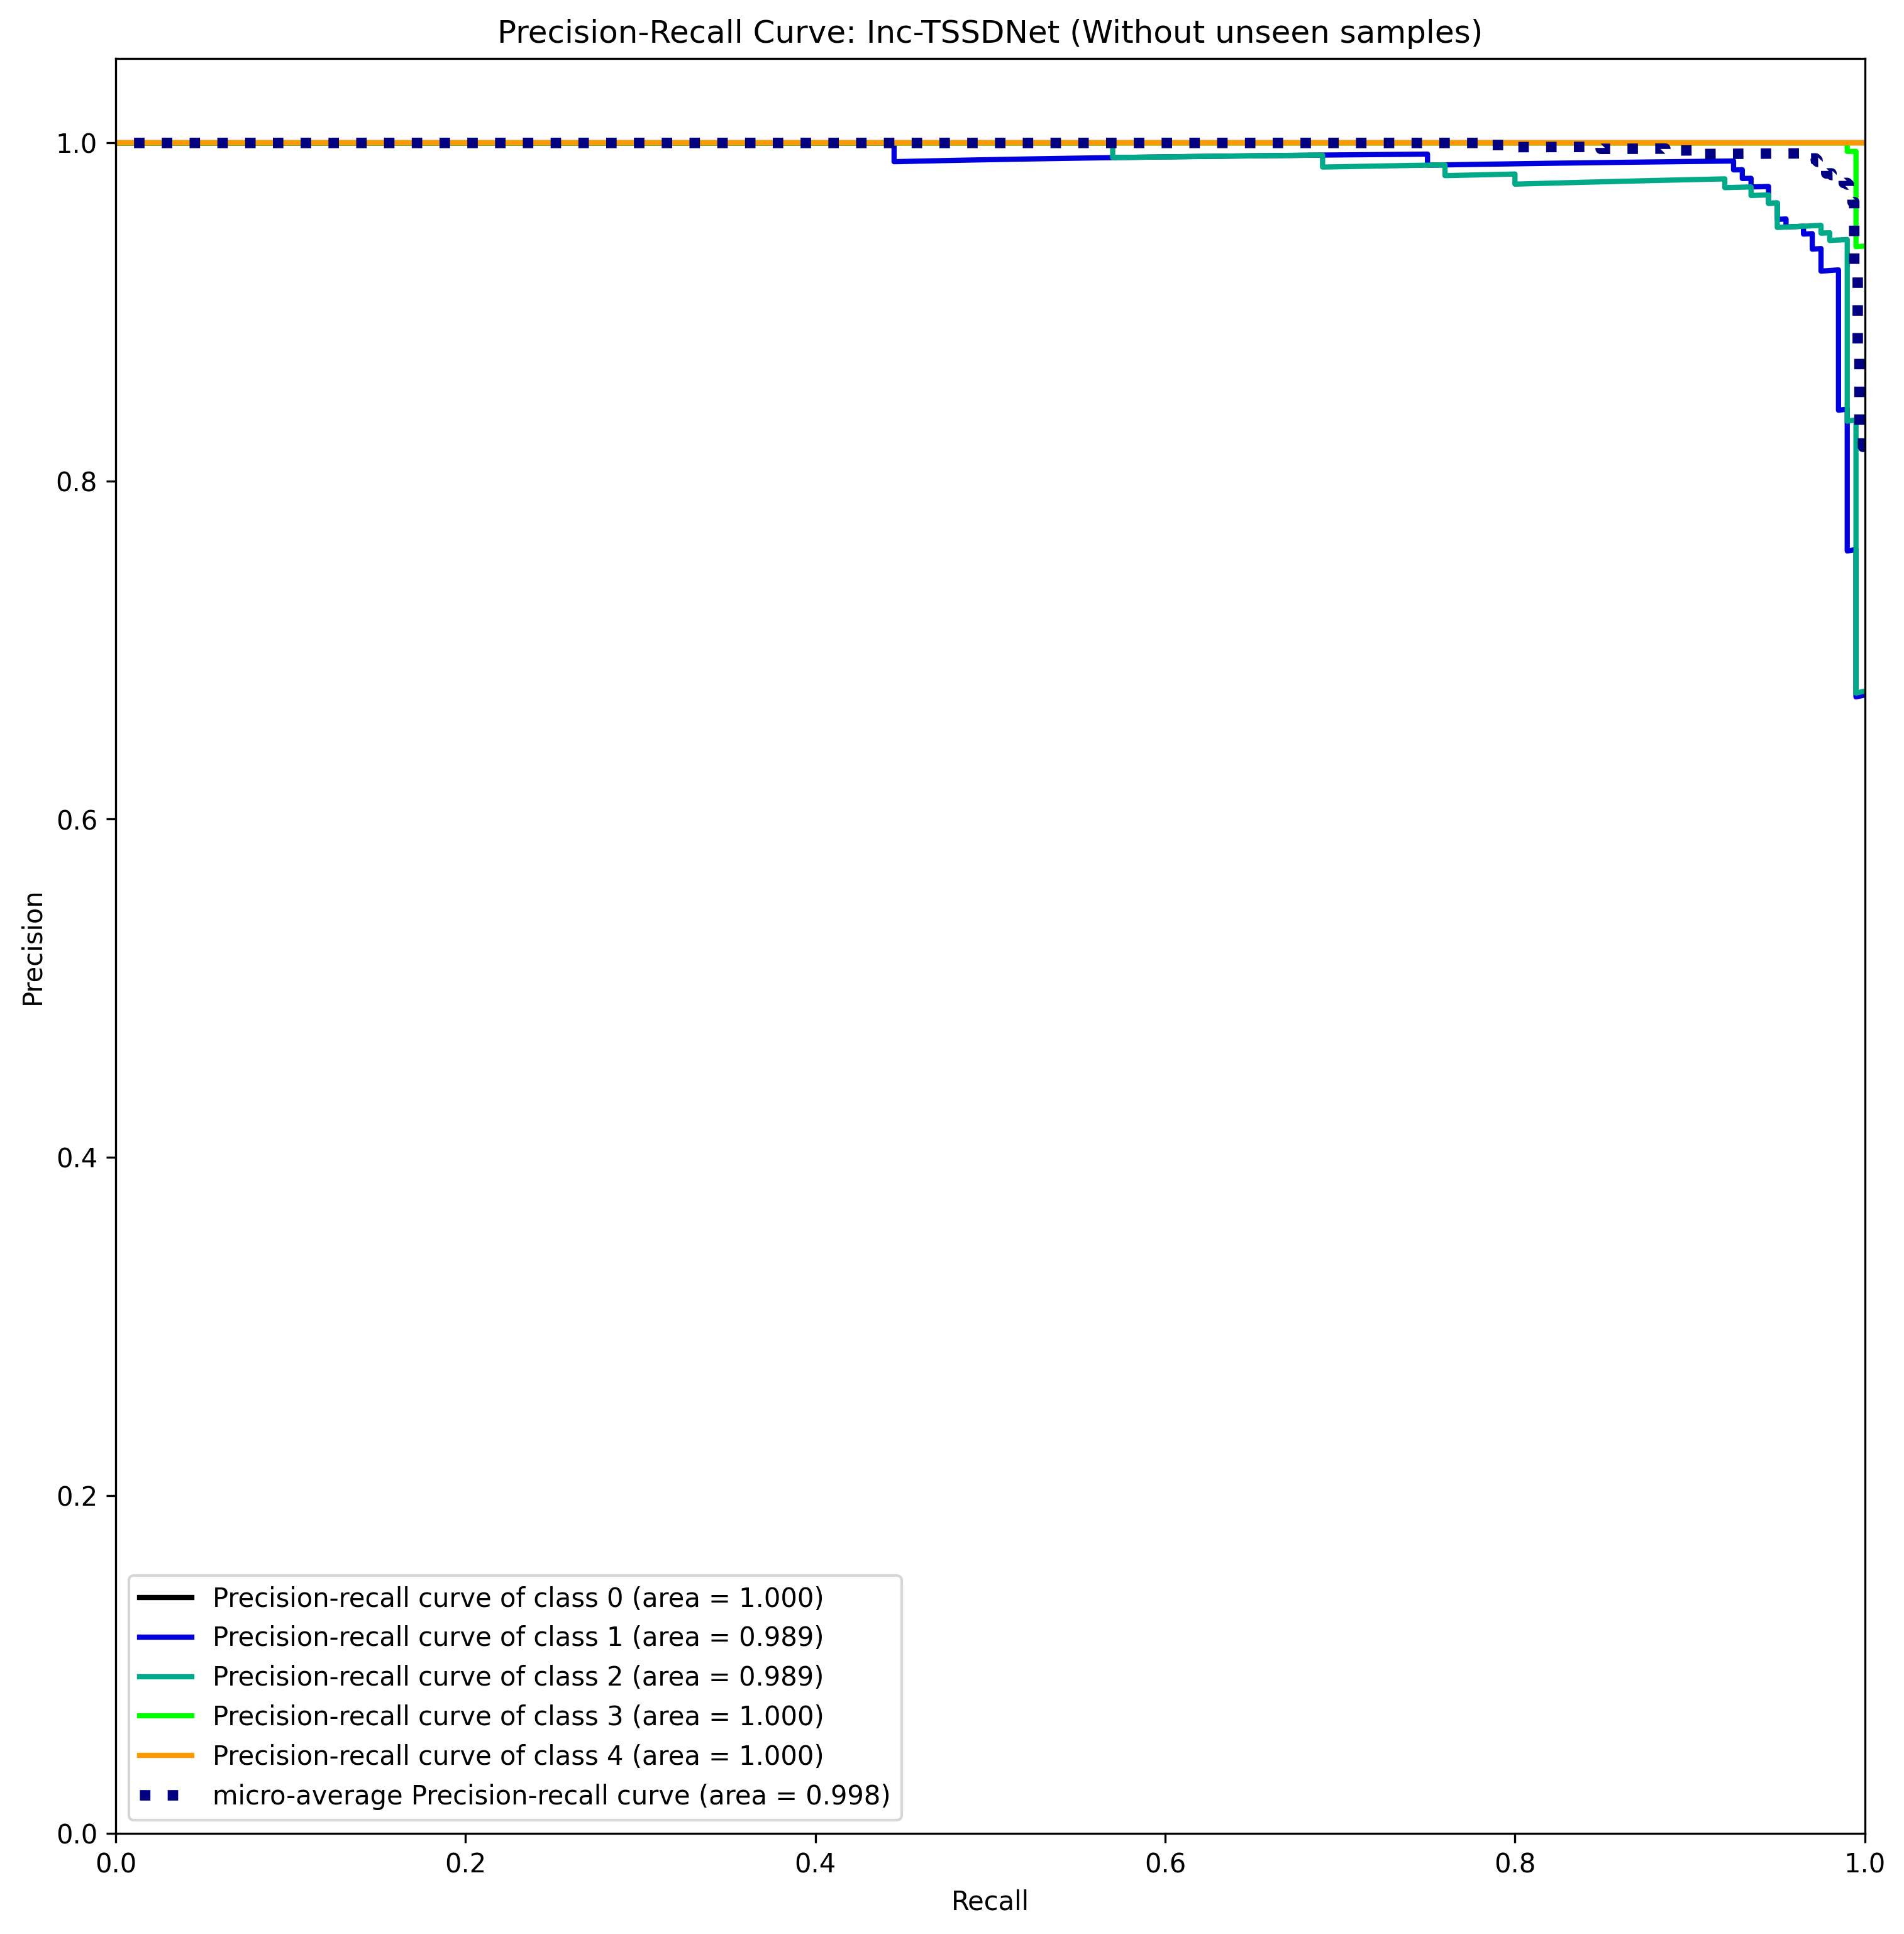

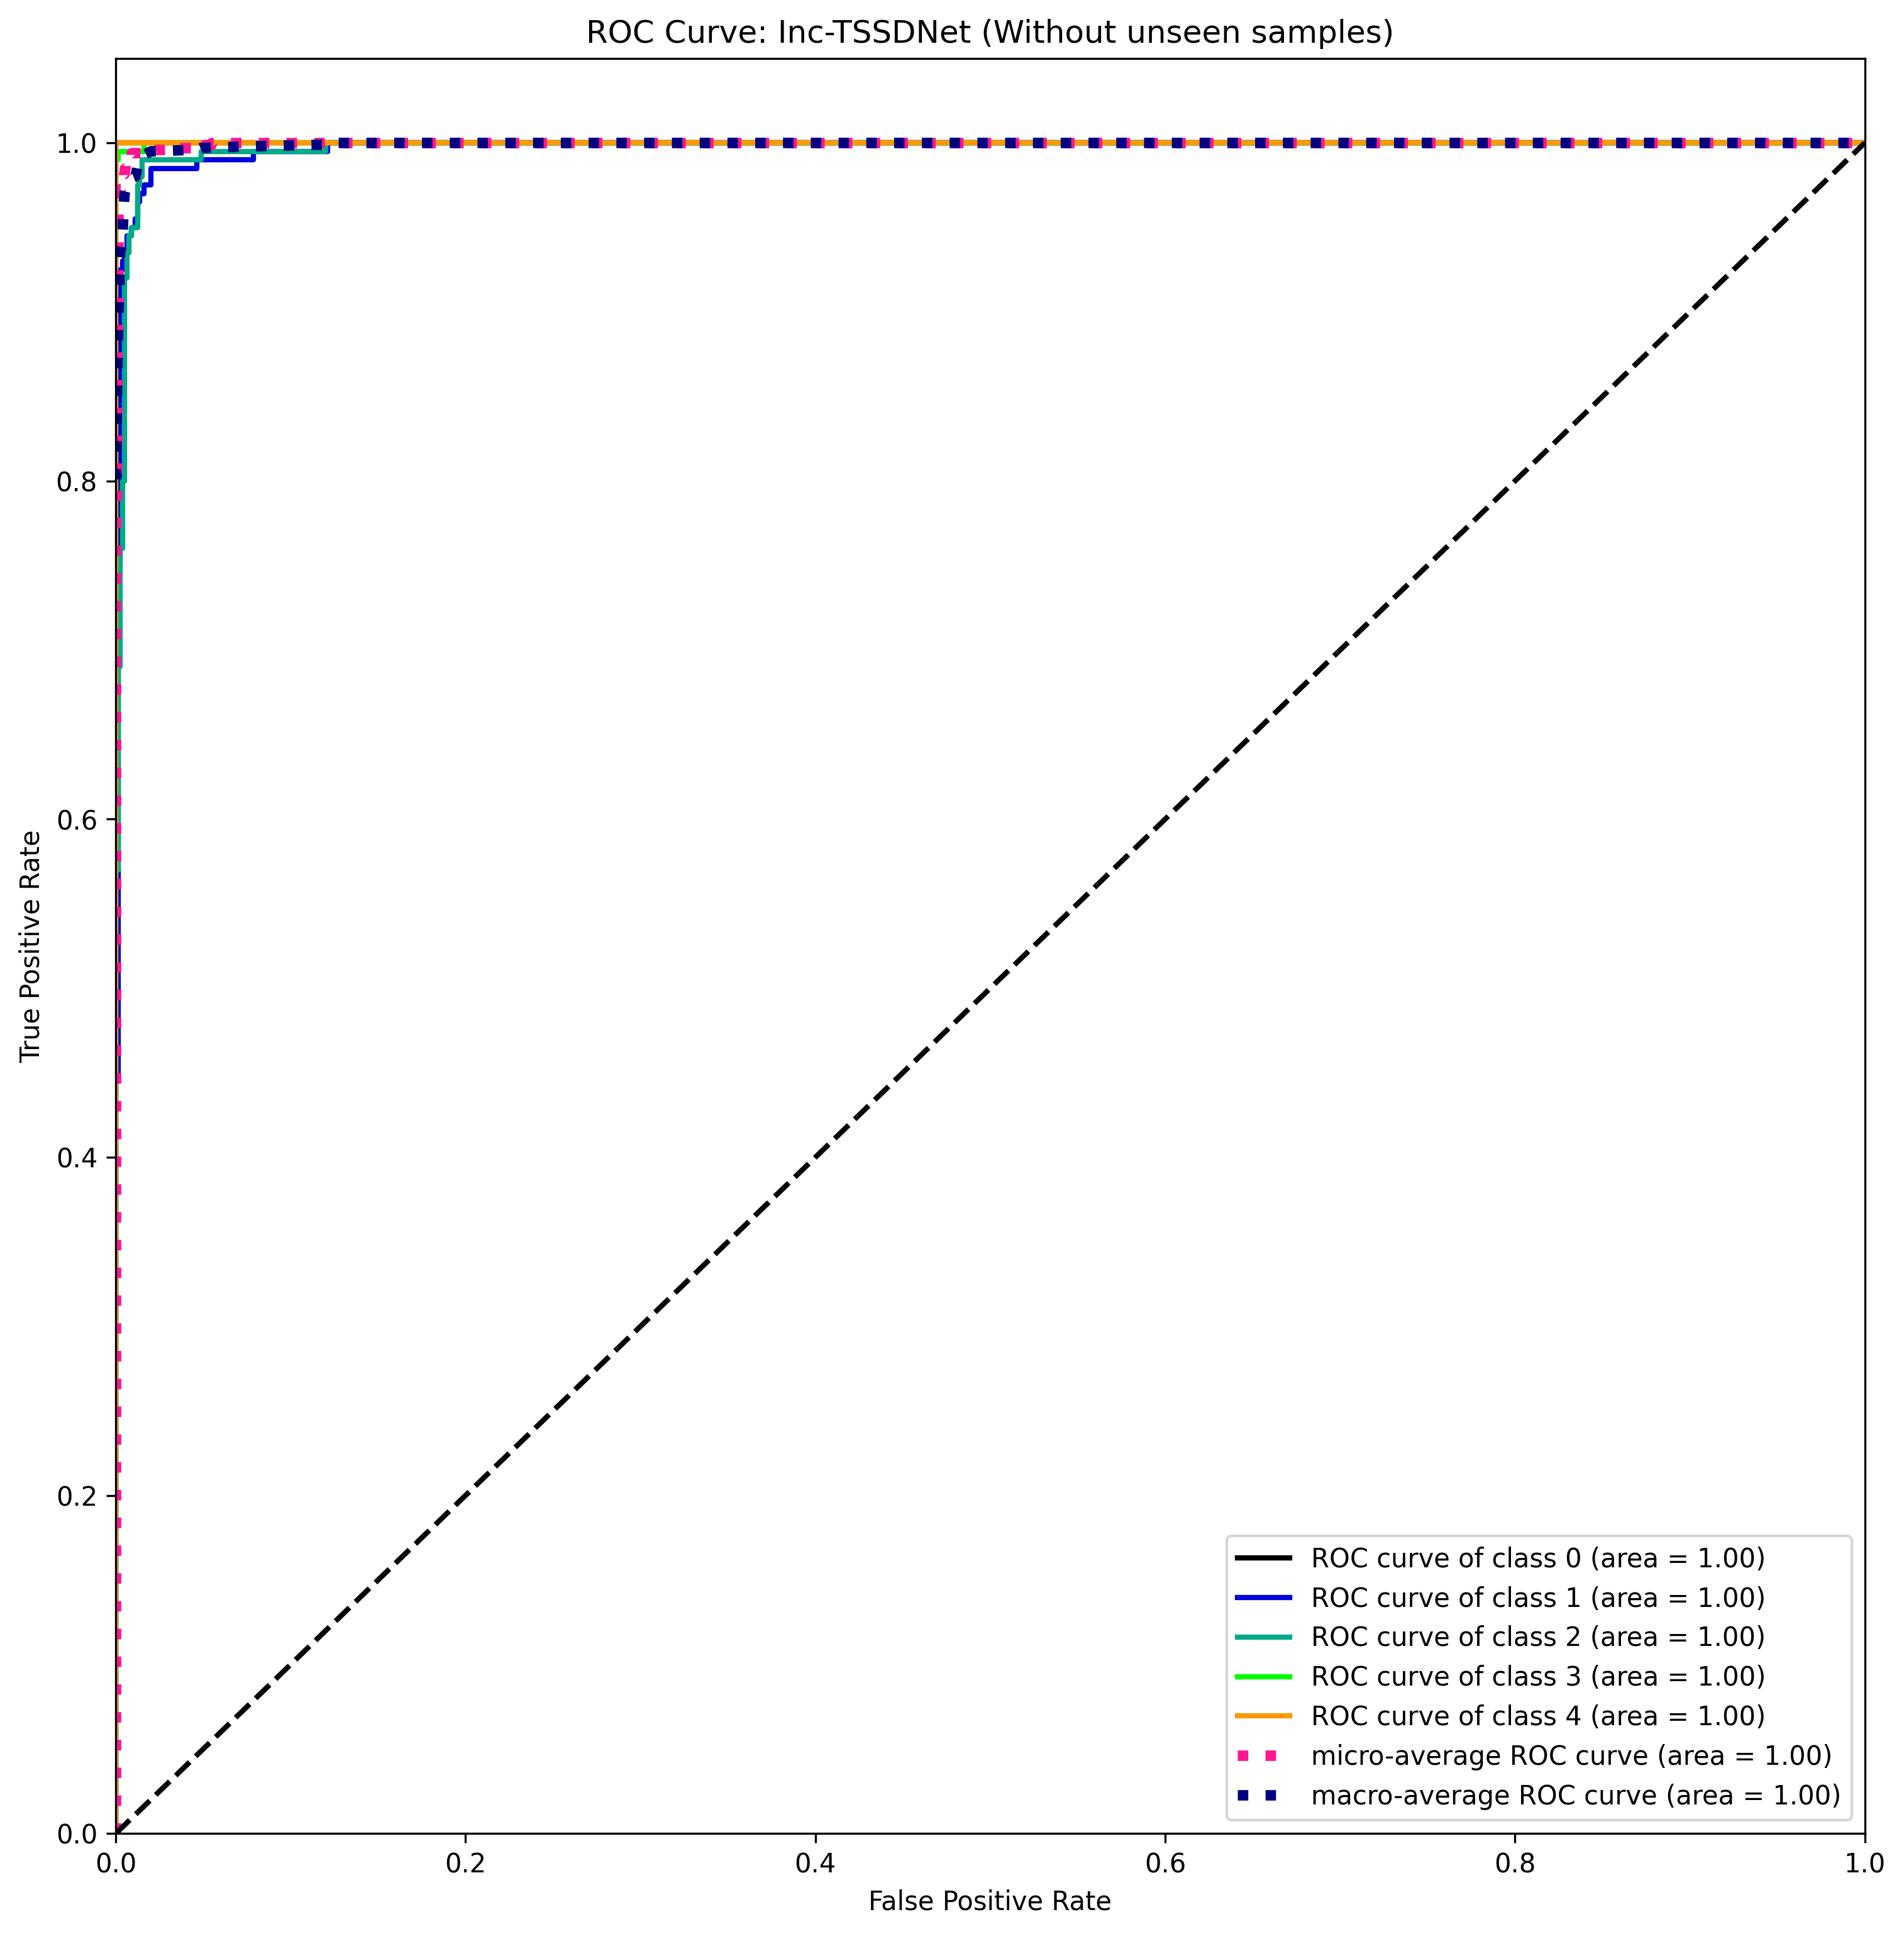

In [7]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "without_unseen"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (Without unseen samples)",
    save_path=fig_save_path
)

In [8]:
checkpoint = ResTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/res_tssdnet/last.ckpt"
)
data_module = SPCUP22DataModule(64, dataset_root=pathlib.Path(ROOT).joinpath("data", "spcup22"))

In [9]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_eval_part1.zip]...
Predicting: 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [10]:
print_scores(actual_labels, predictions)


    F1 Score: 0.98
    Accuracy: 0.98
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


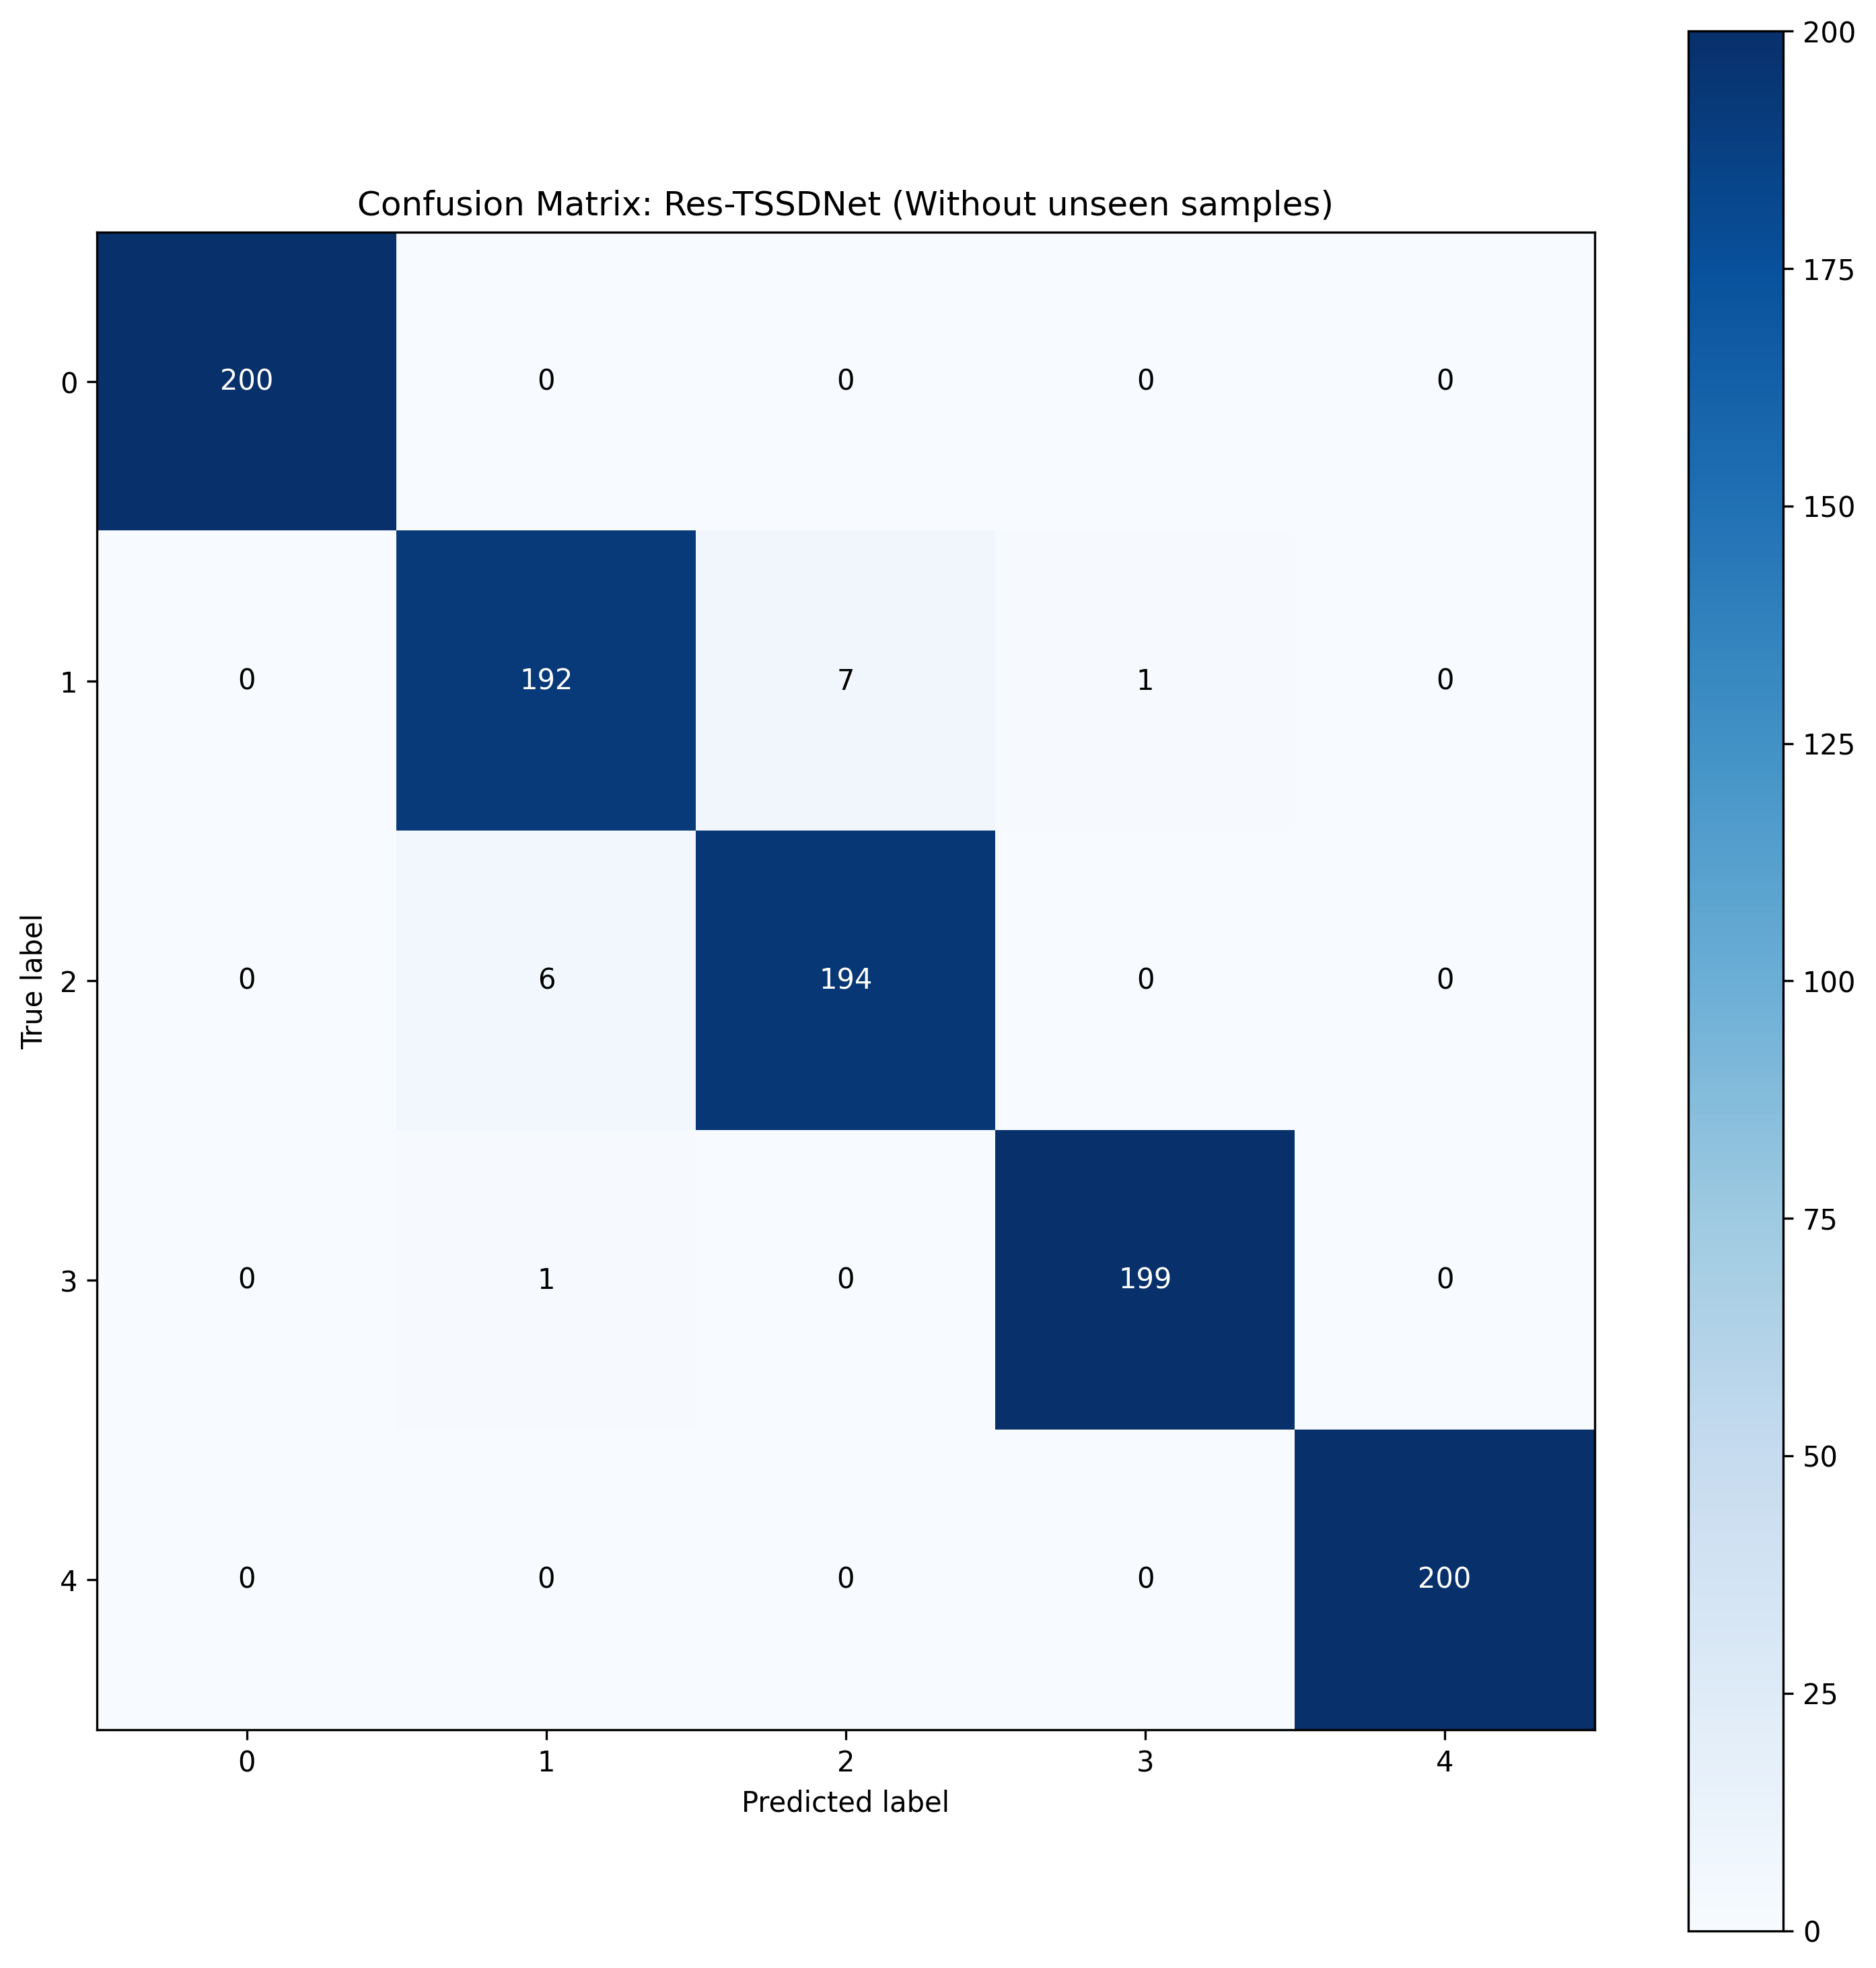

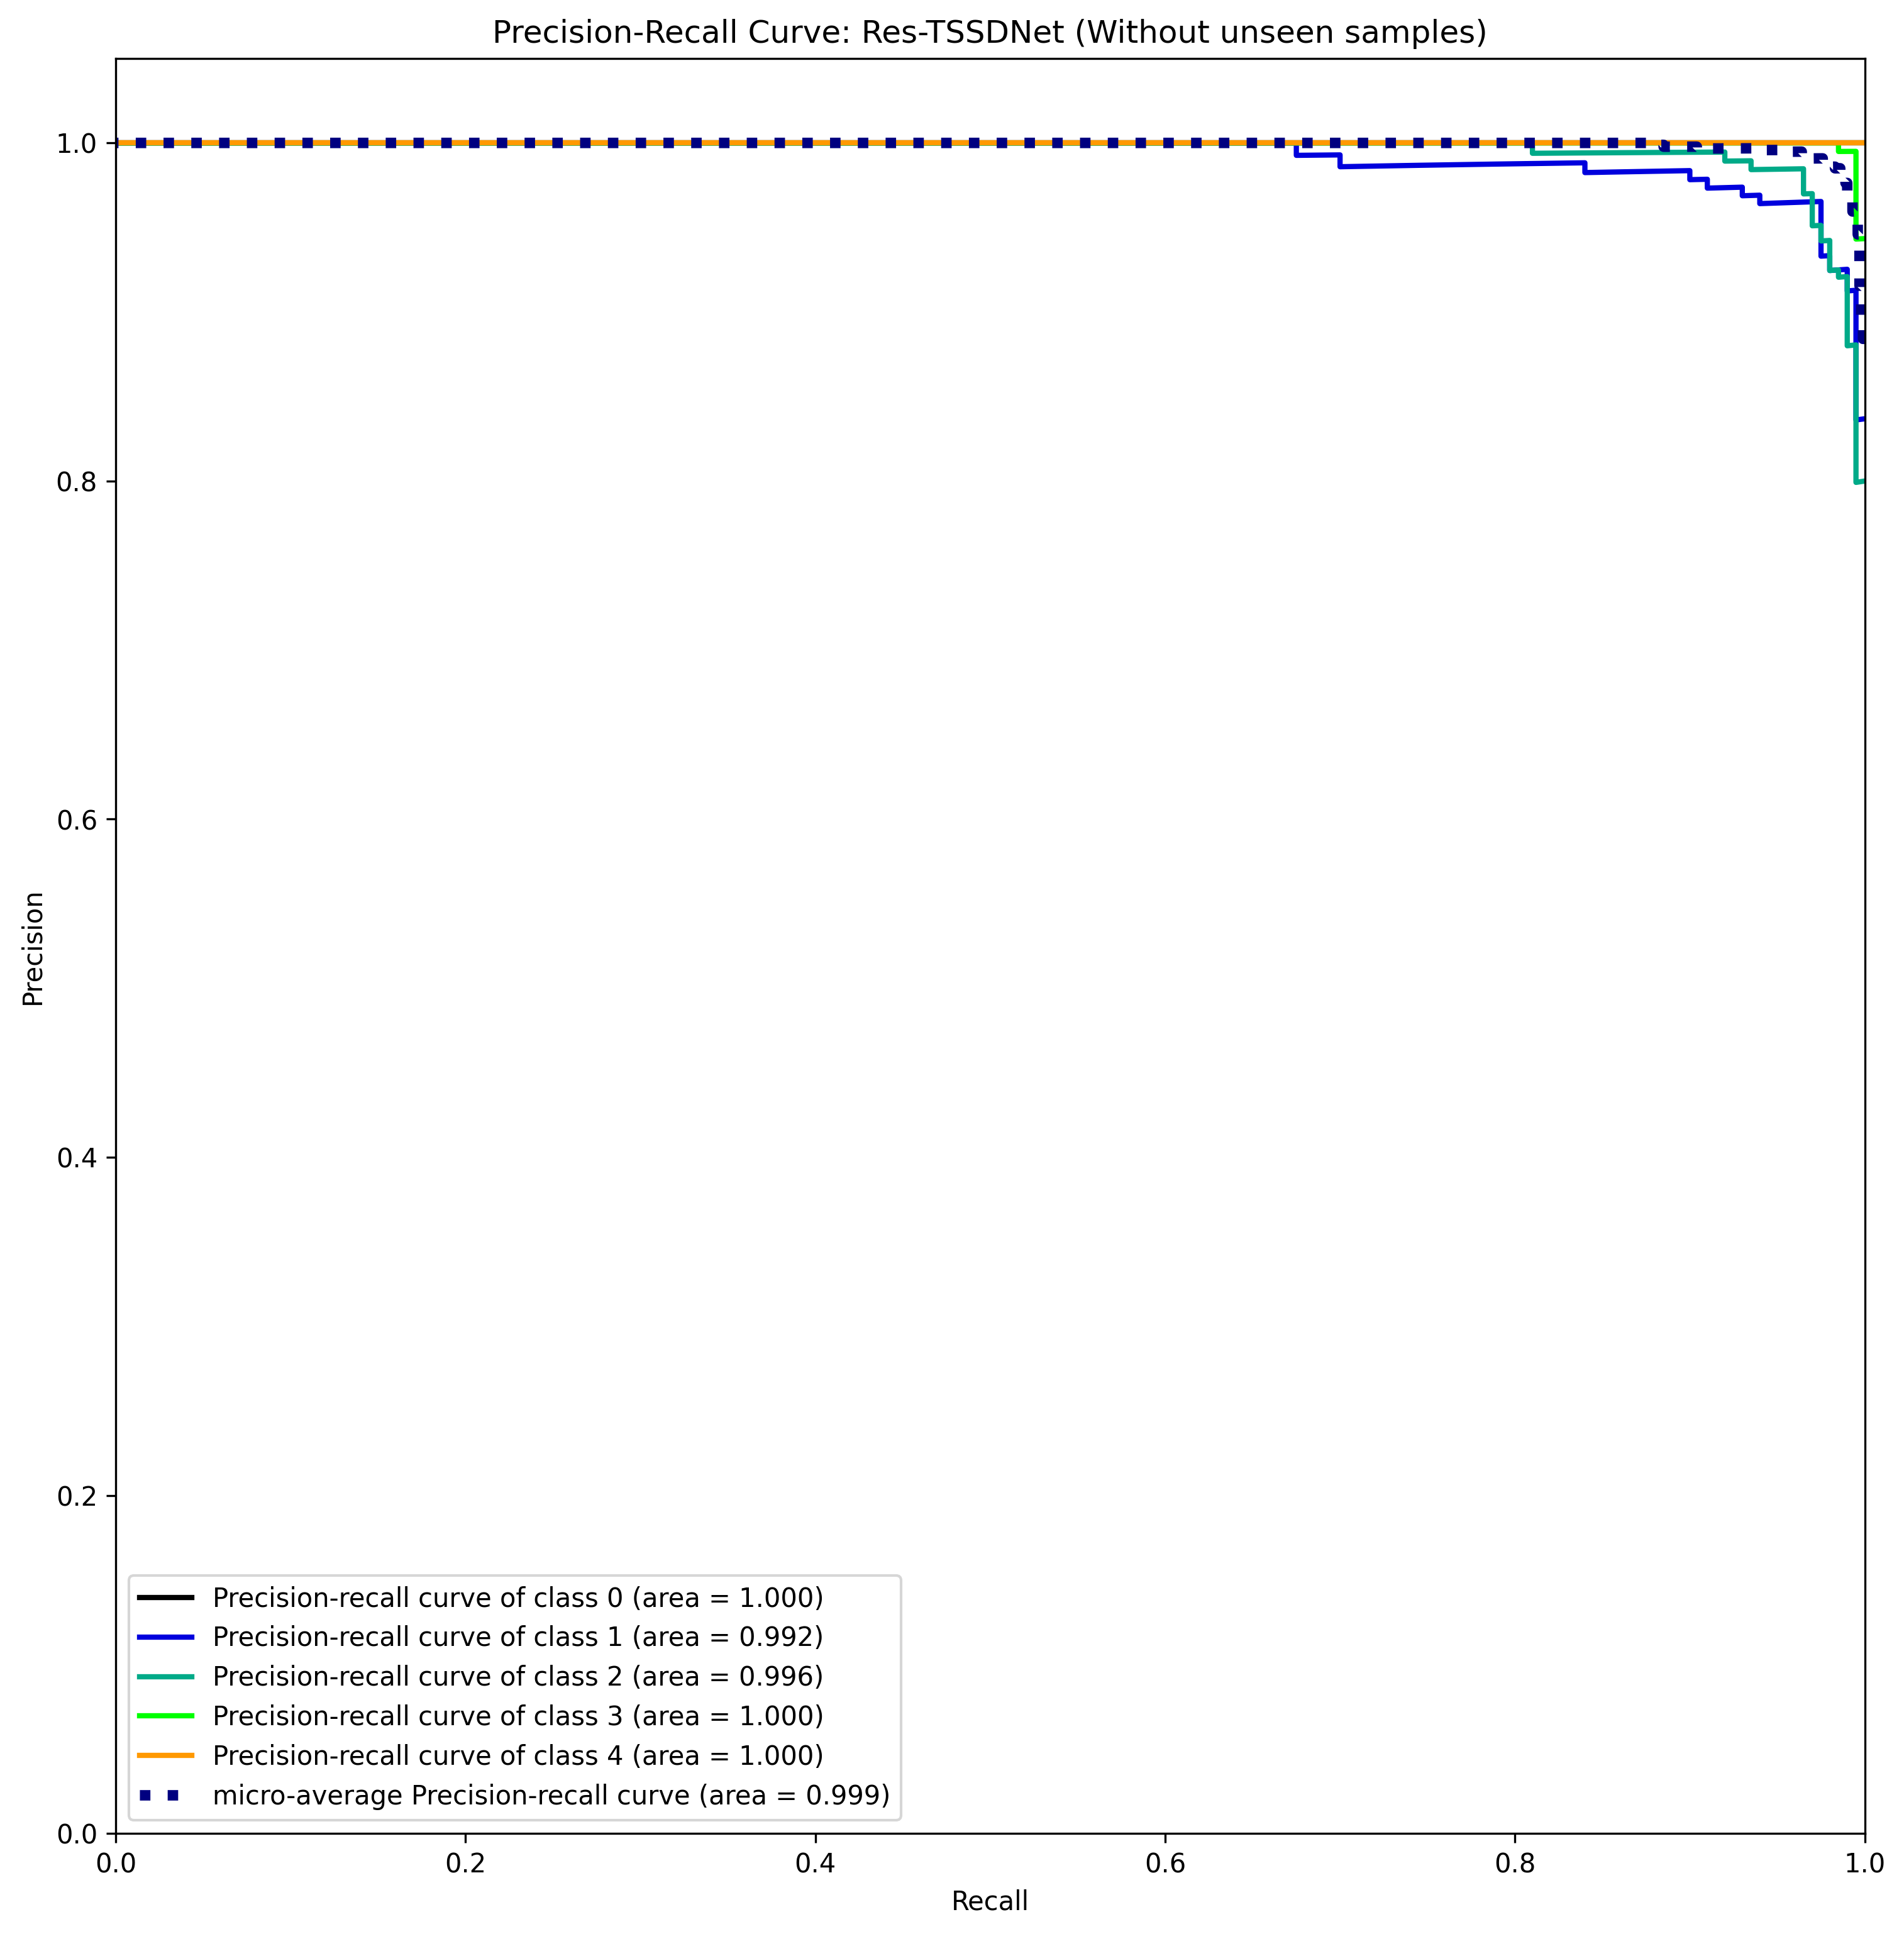

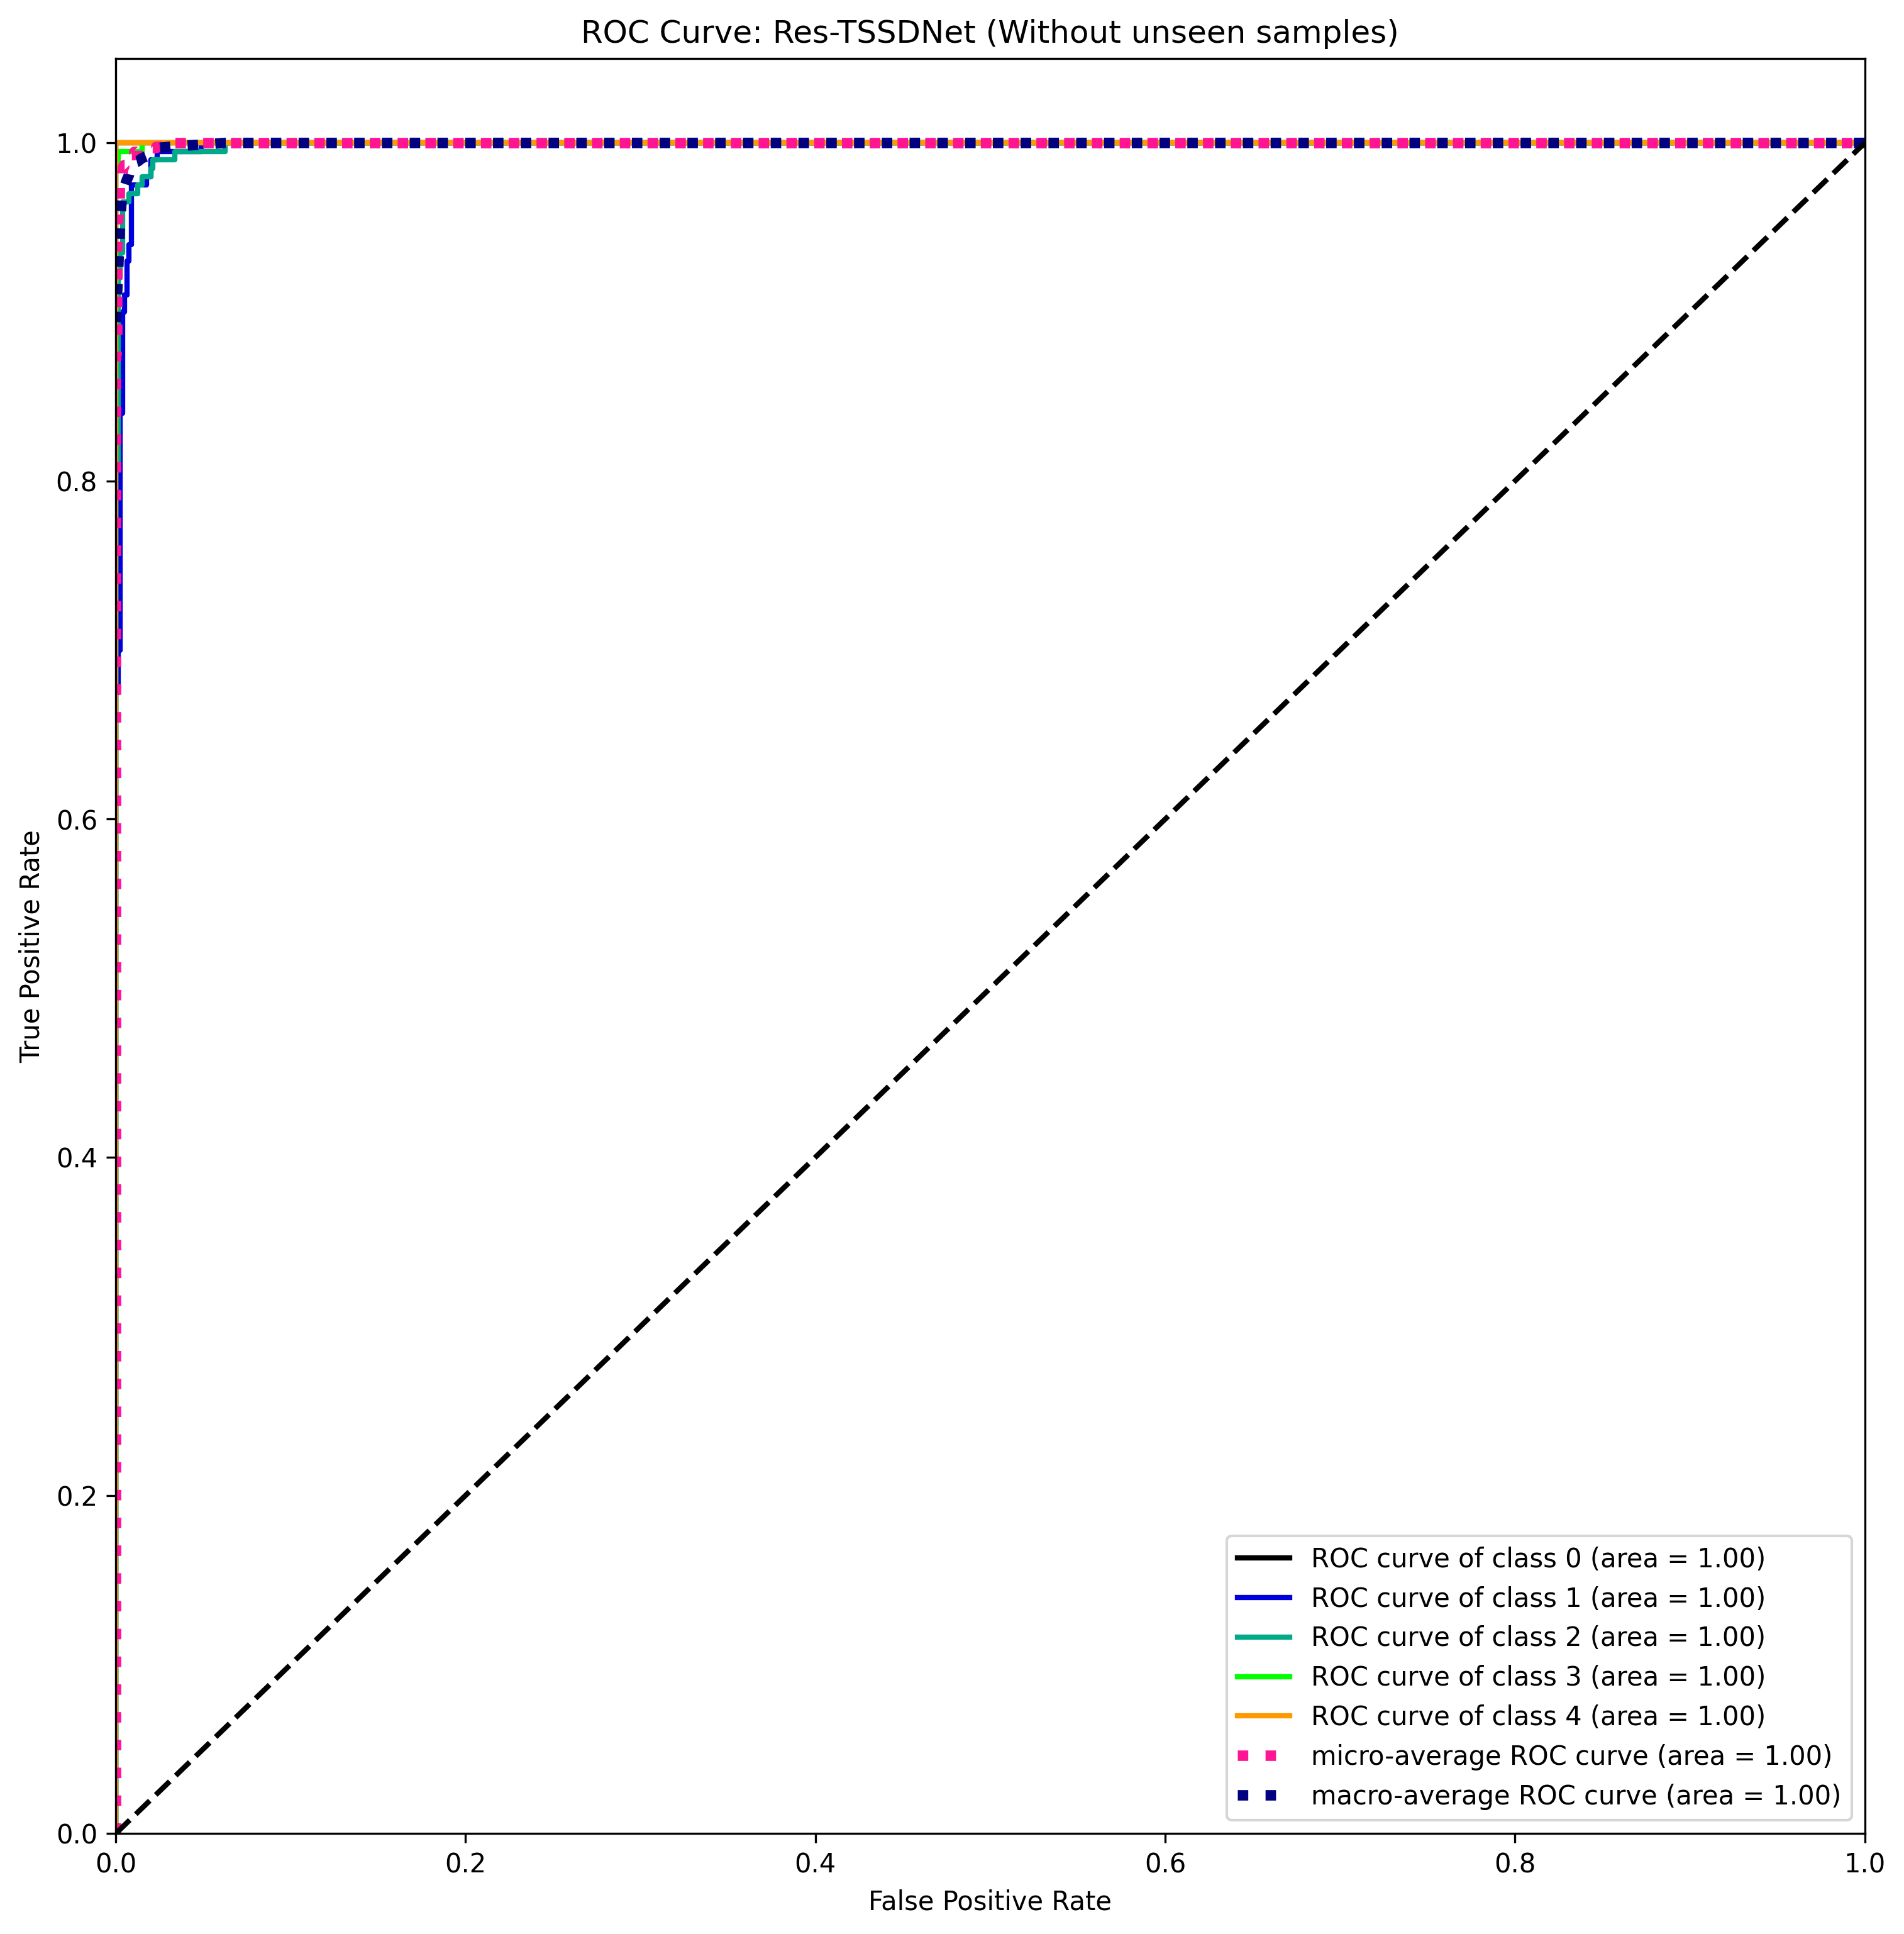

In [11]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "res", "without_unseen"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Res-TSSDNet (Without unseen samples)",
    save_path=fig_save_path
)

In [12]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/inc_tssdnet_with_unseen/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "spcup22"),
    should_include_unseen_in_training_data=True,
)

In [13]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_eval_part1.zip]...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Predicting: 100%|██████████| 19/19 [00:01<00:00,  9.92it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [14]:
print_scores(actual_labels, predictions)


    F1 Score: 0.96
    Accuracy: 0.96
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


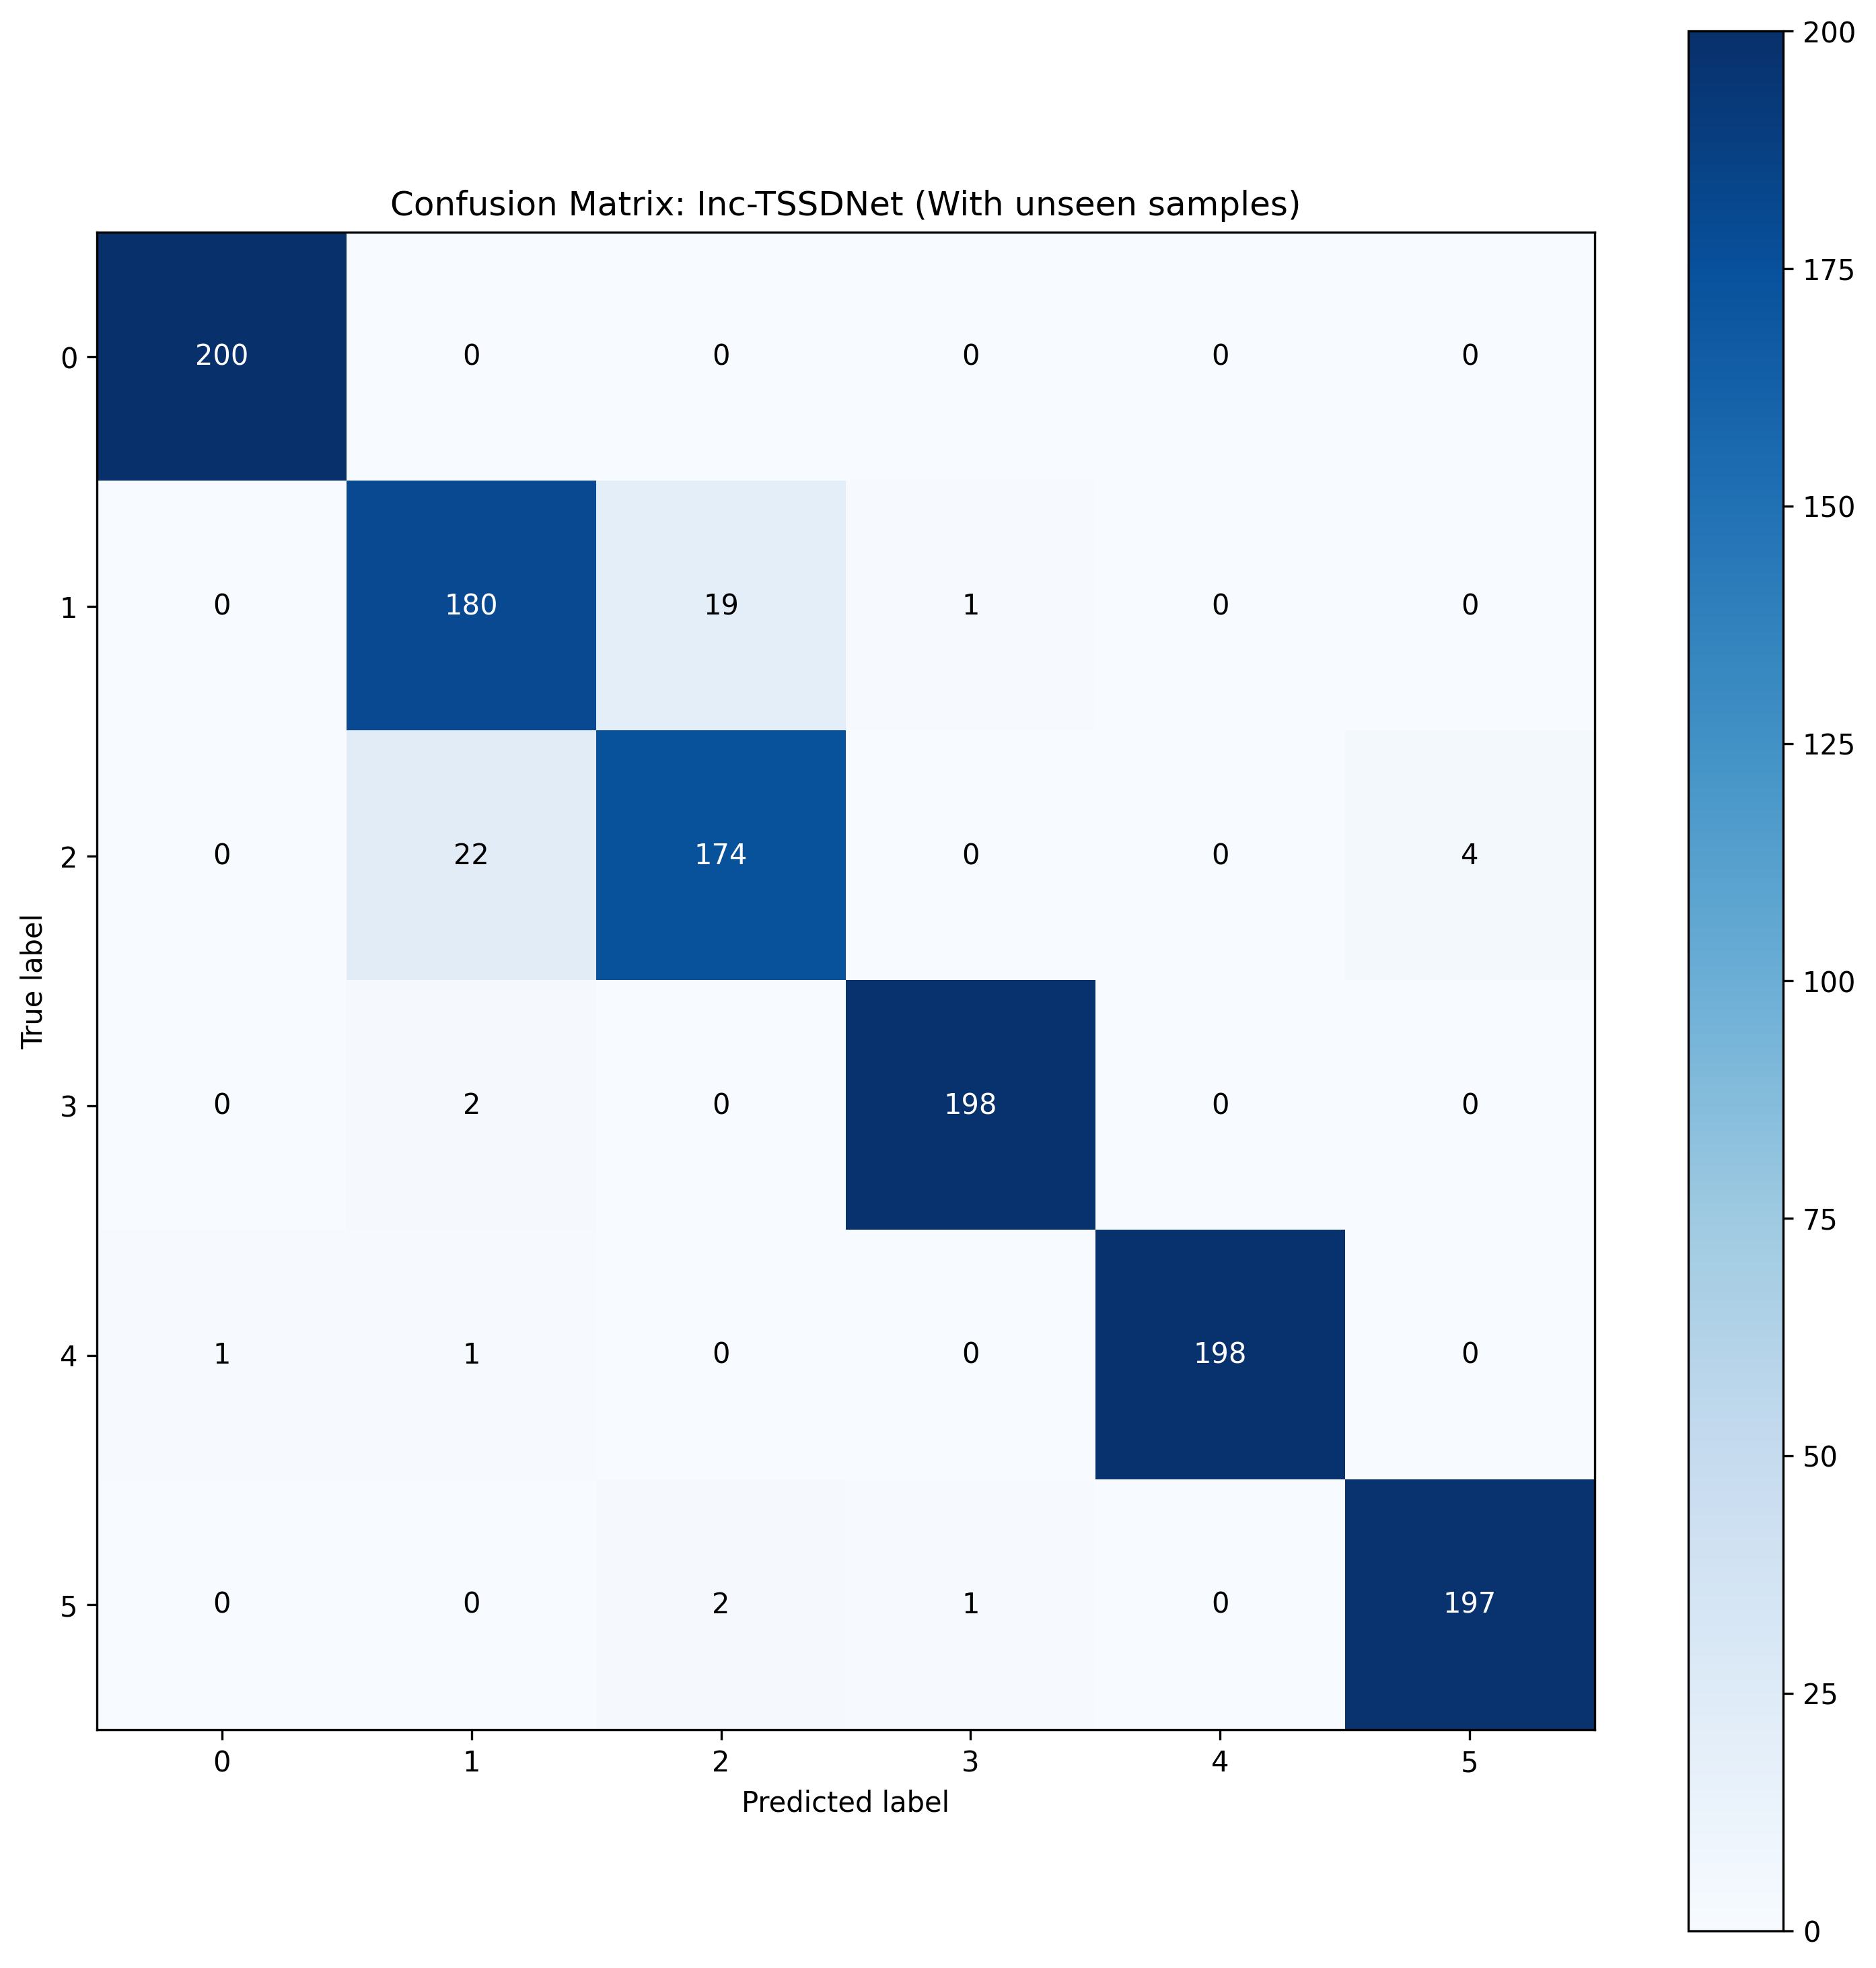

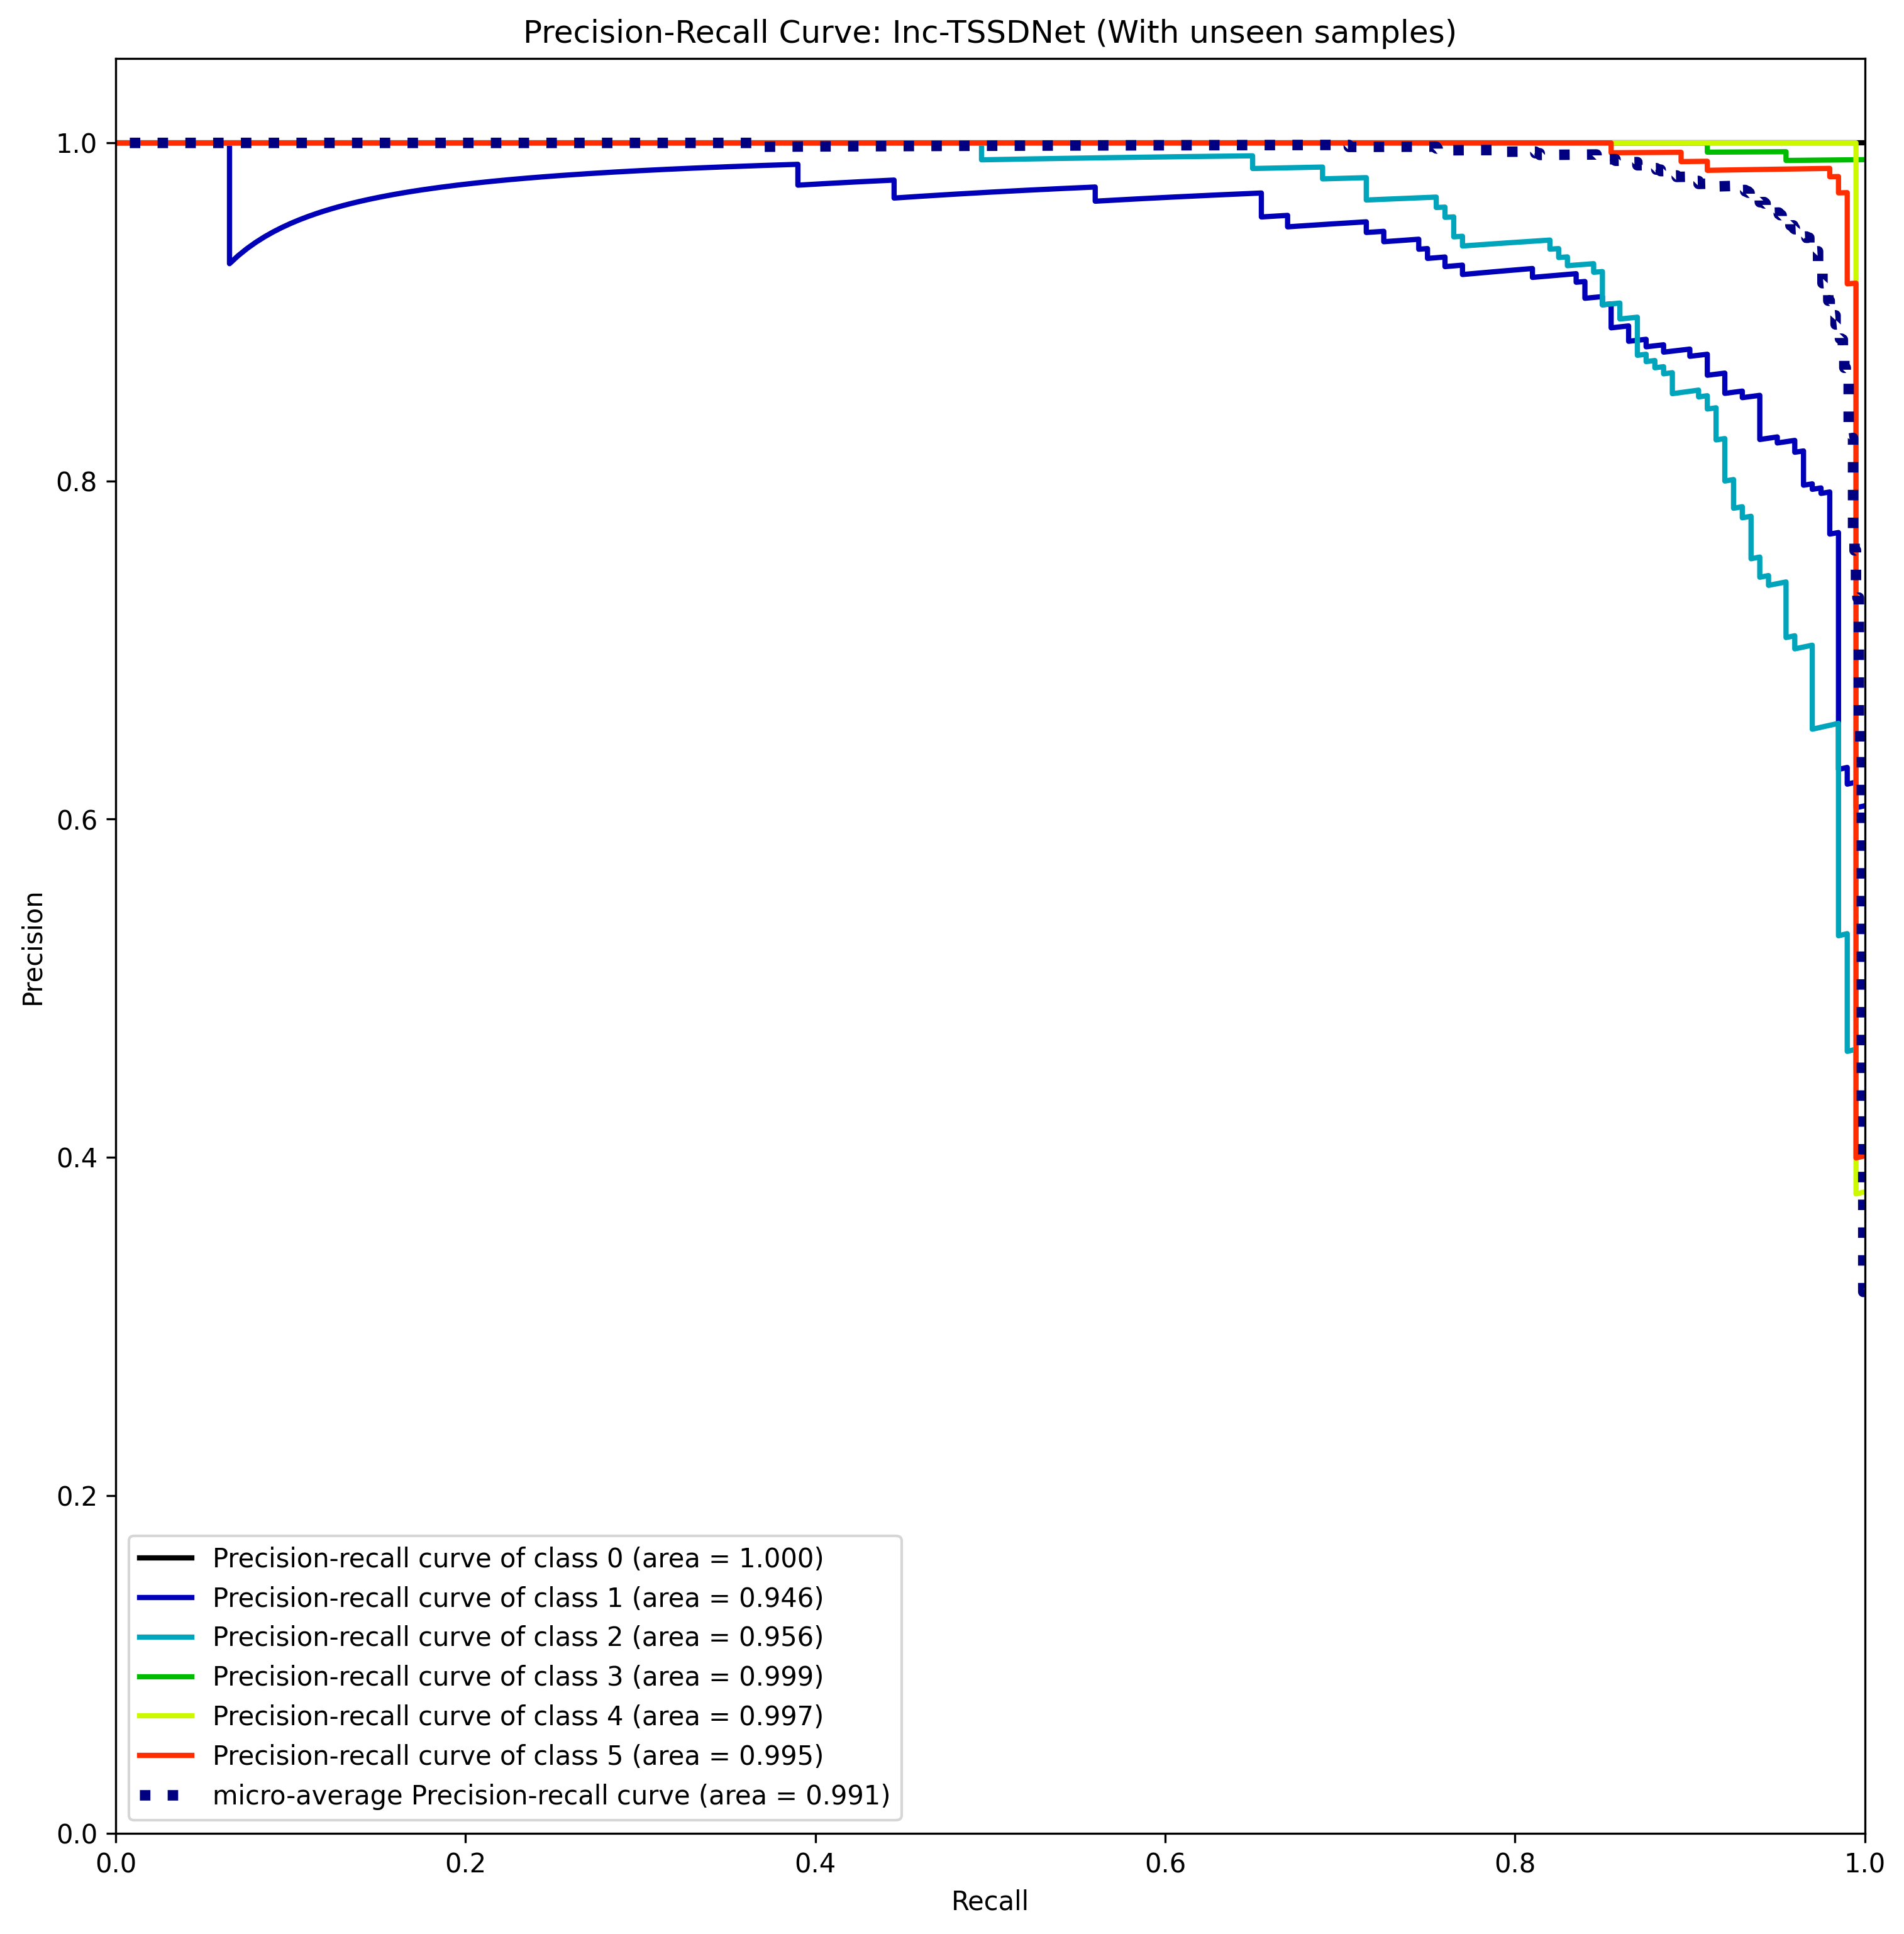

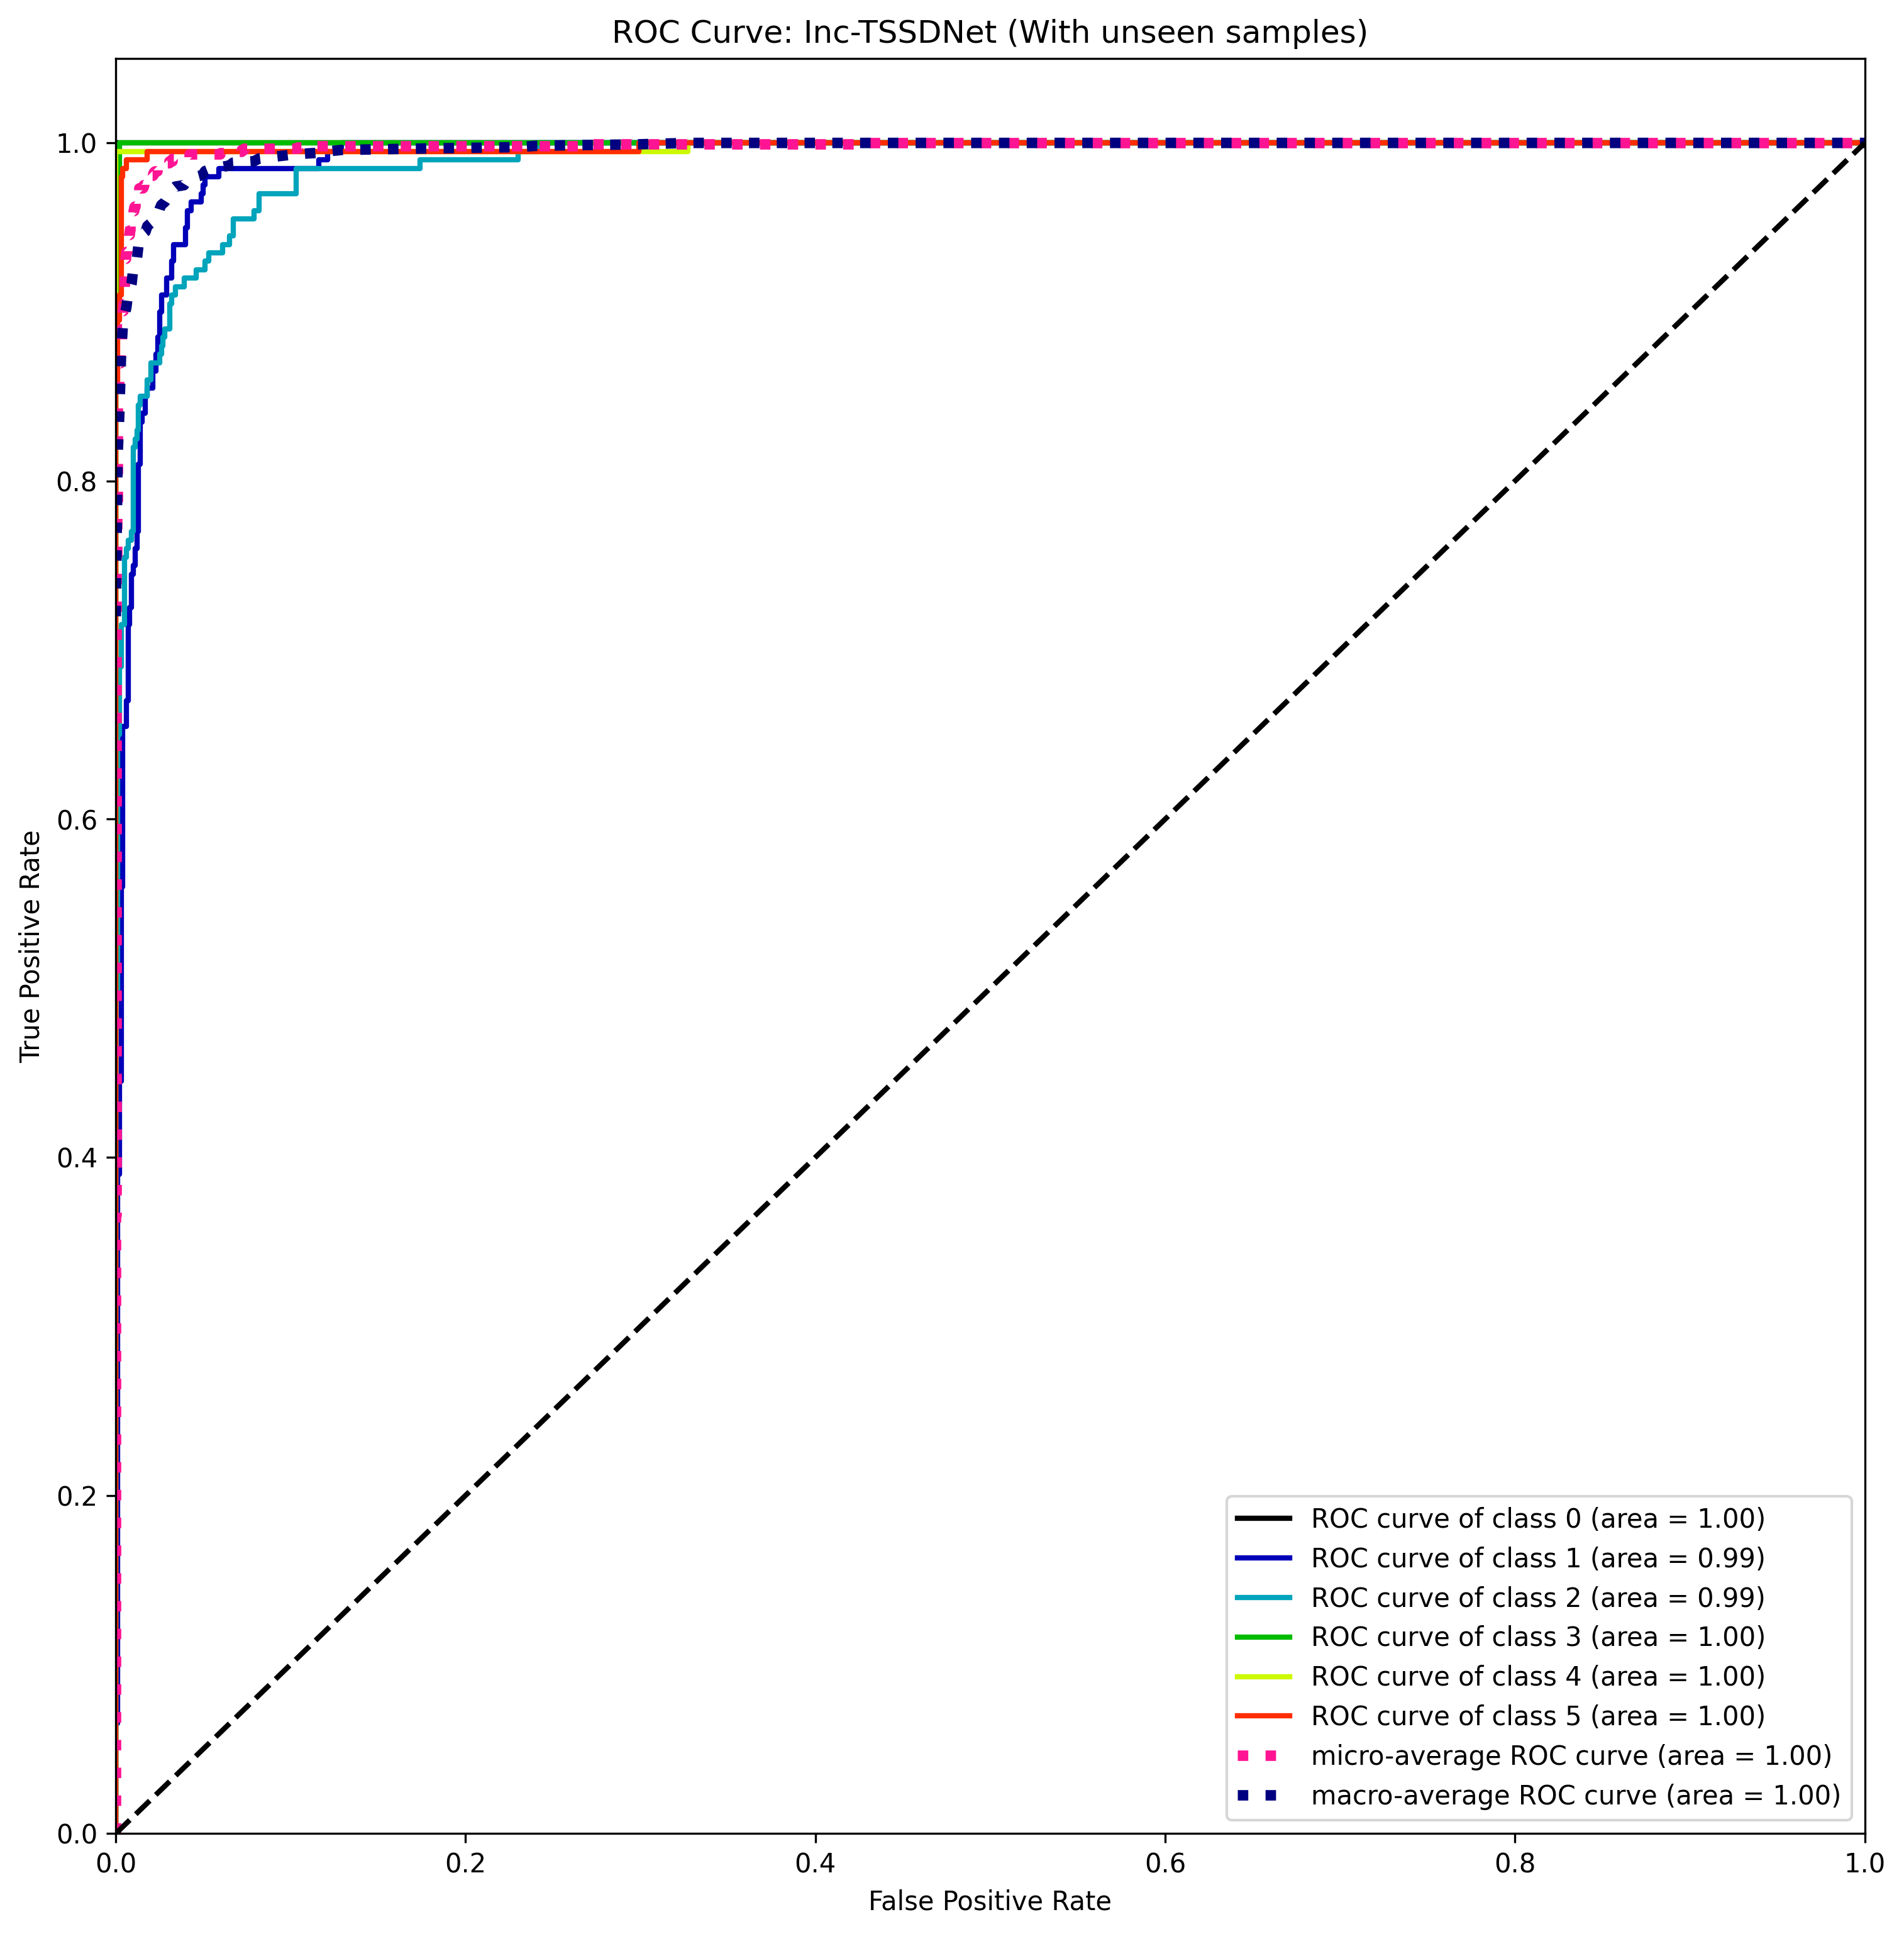

In [15]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "with_unseen"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (With unseen samples)",
    save_path=fig_save_path
)

In [16]:
checkpoint = ResTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/res_tssdnet_with_unseen/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "spcup22"),
    should_include_unseen_in_training_data=True,
)

In [17]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/spcup22/spcup_2022_eval_part1.zip]...
Predicting: 100%|██████████| 19/19 [00:03<00:00,  6.30it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [18]:
print_scores(actual_labels, predictions)


    F1 Score: 0.93
    Accuracy: 0.93
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


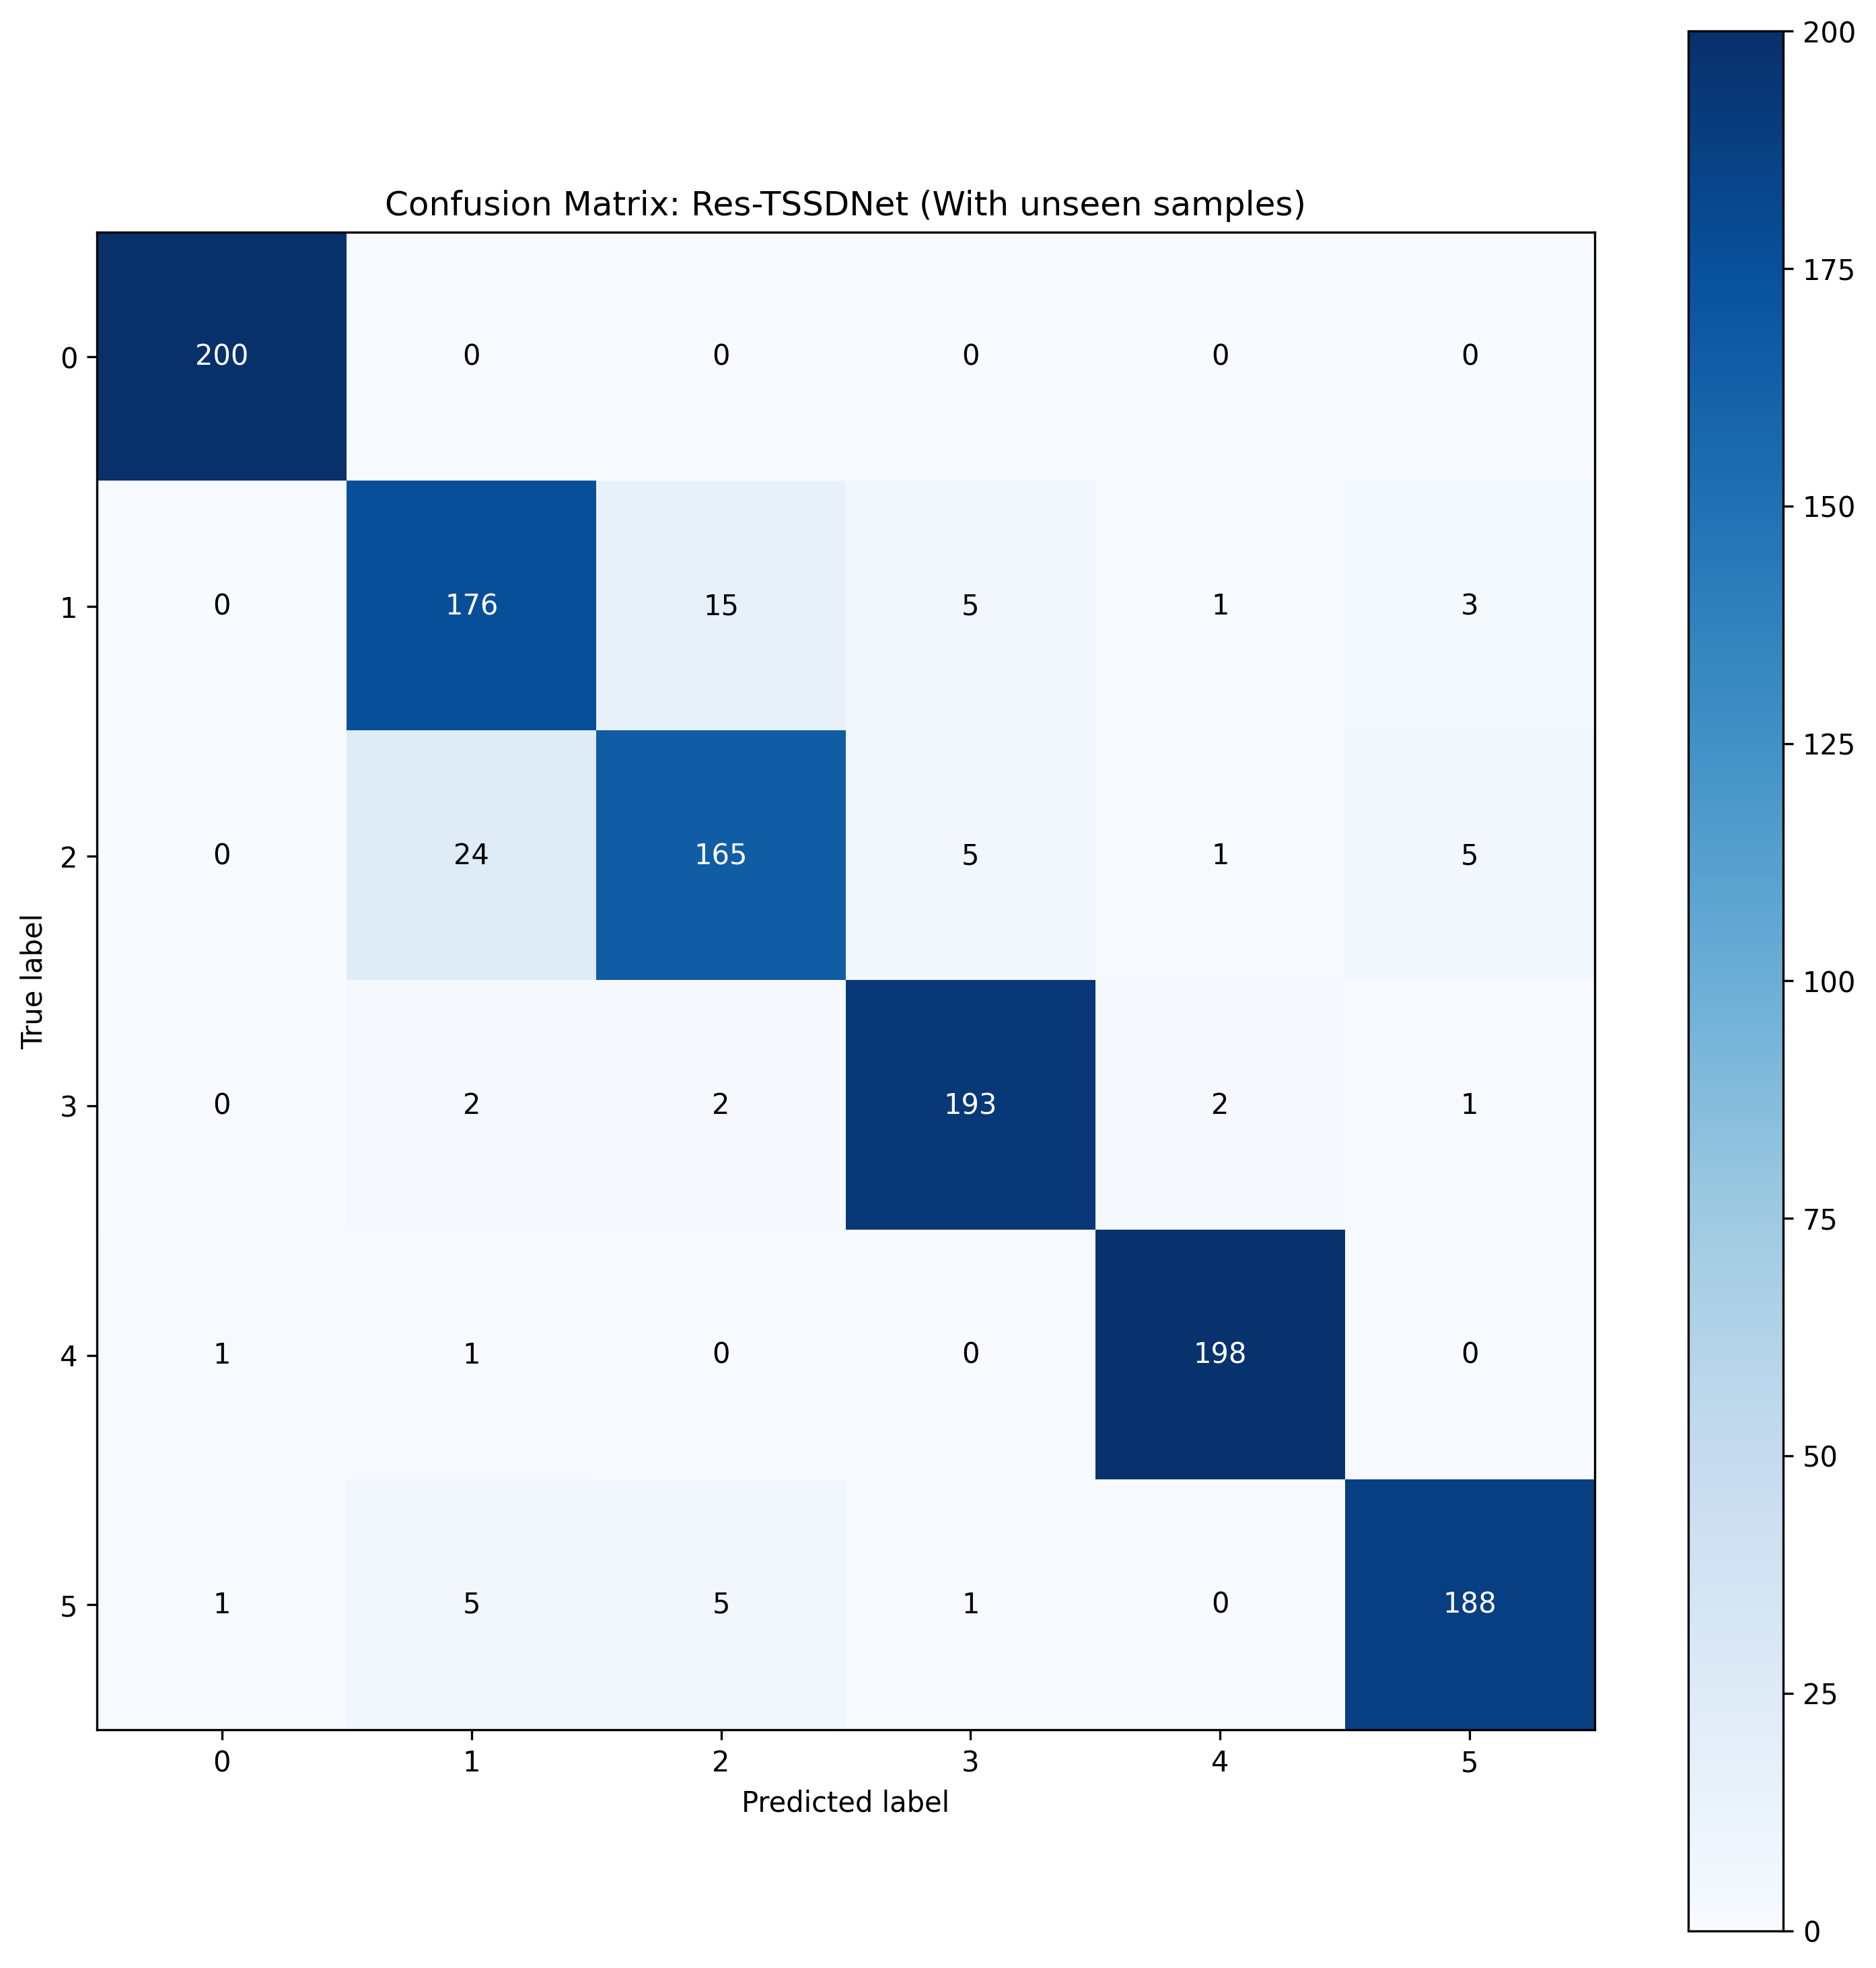

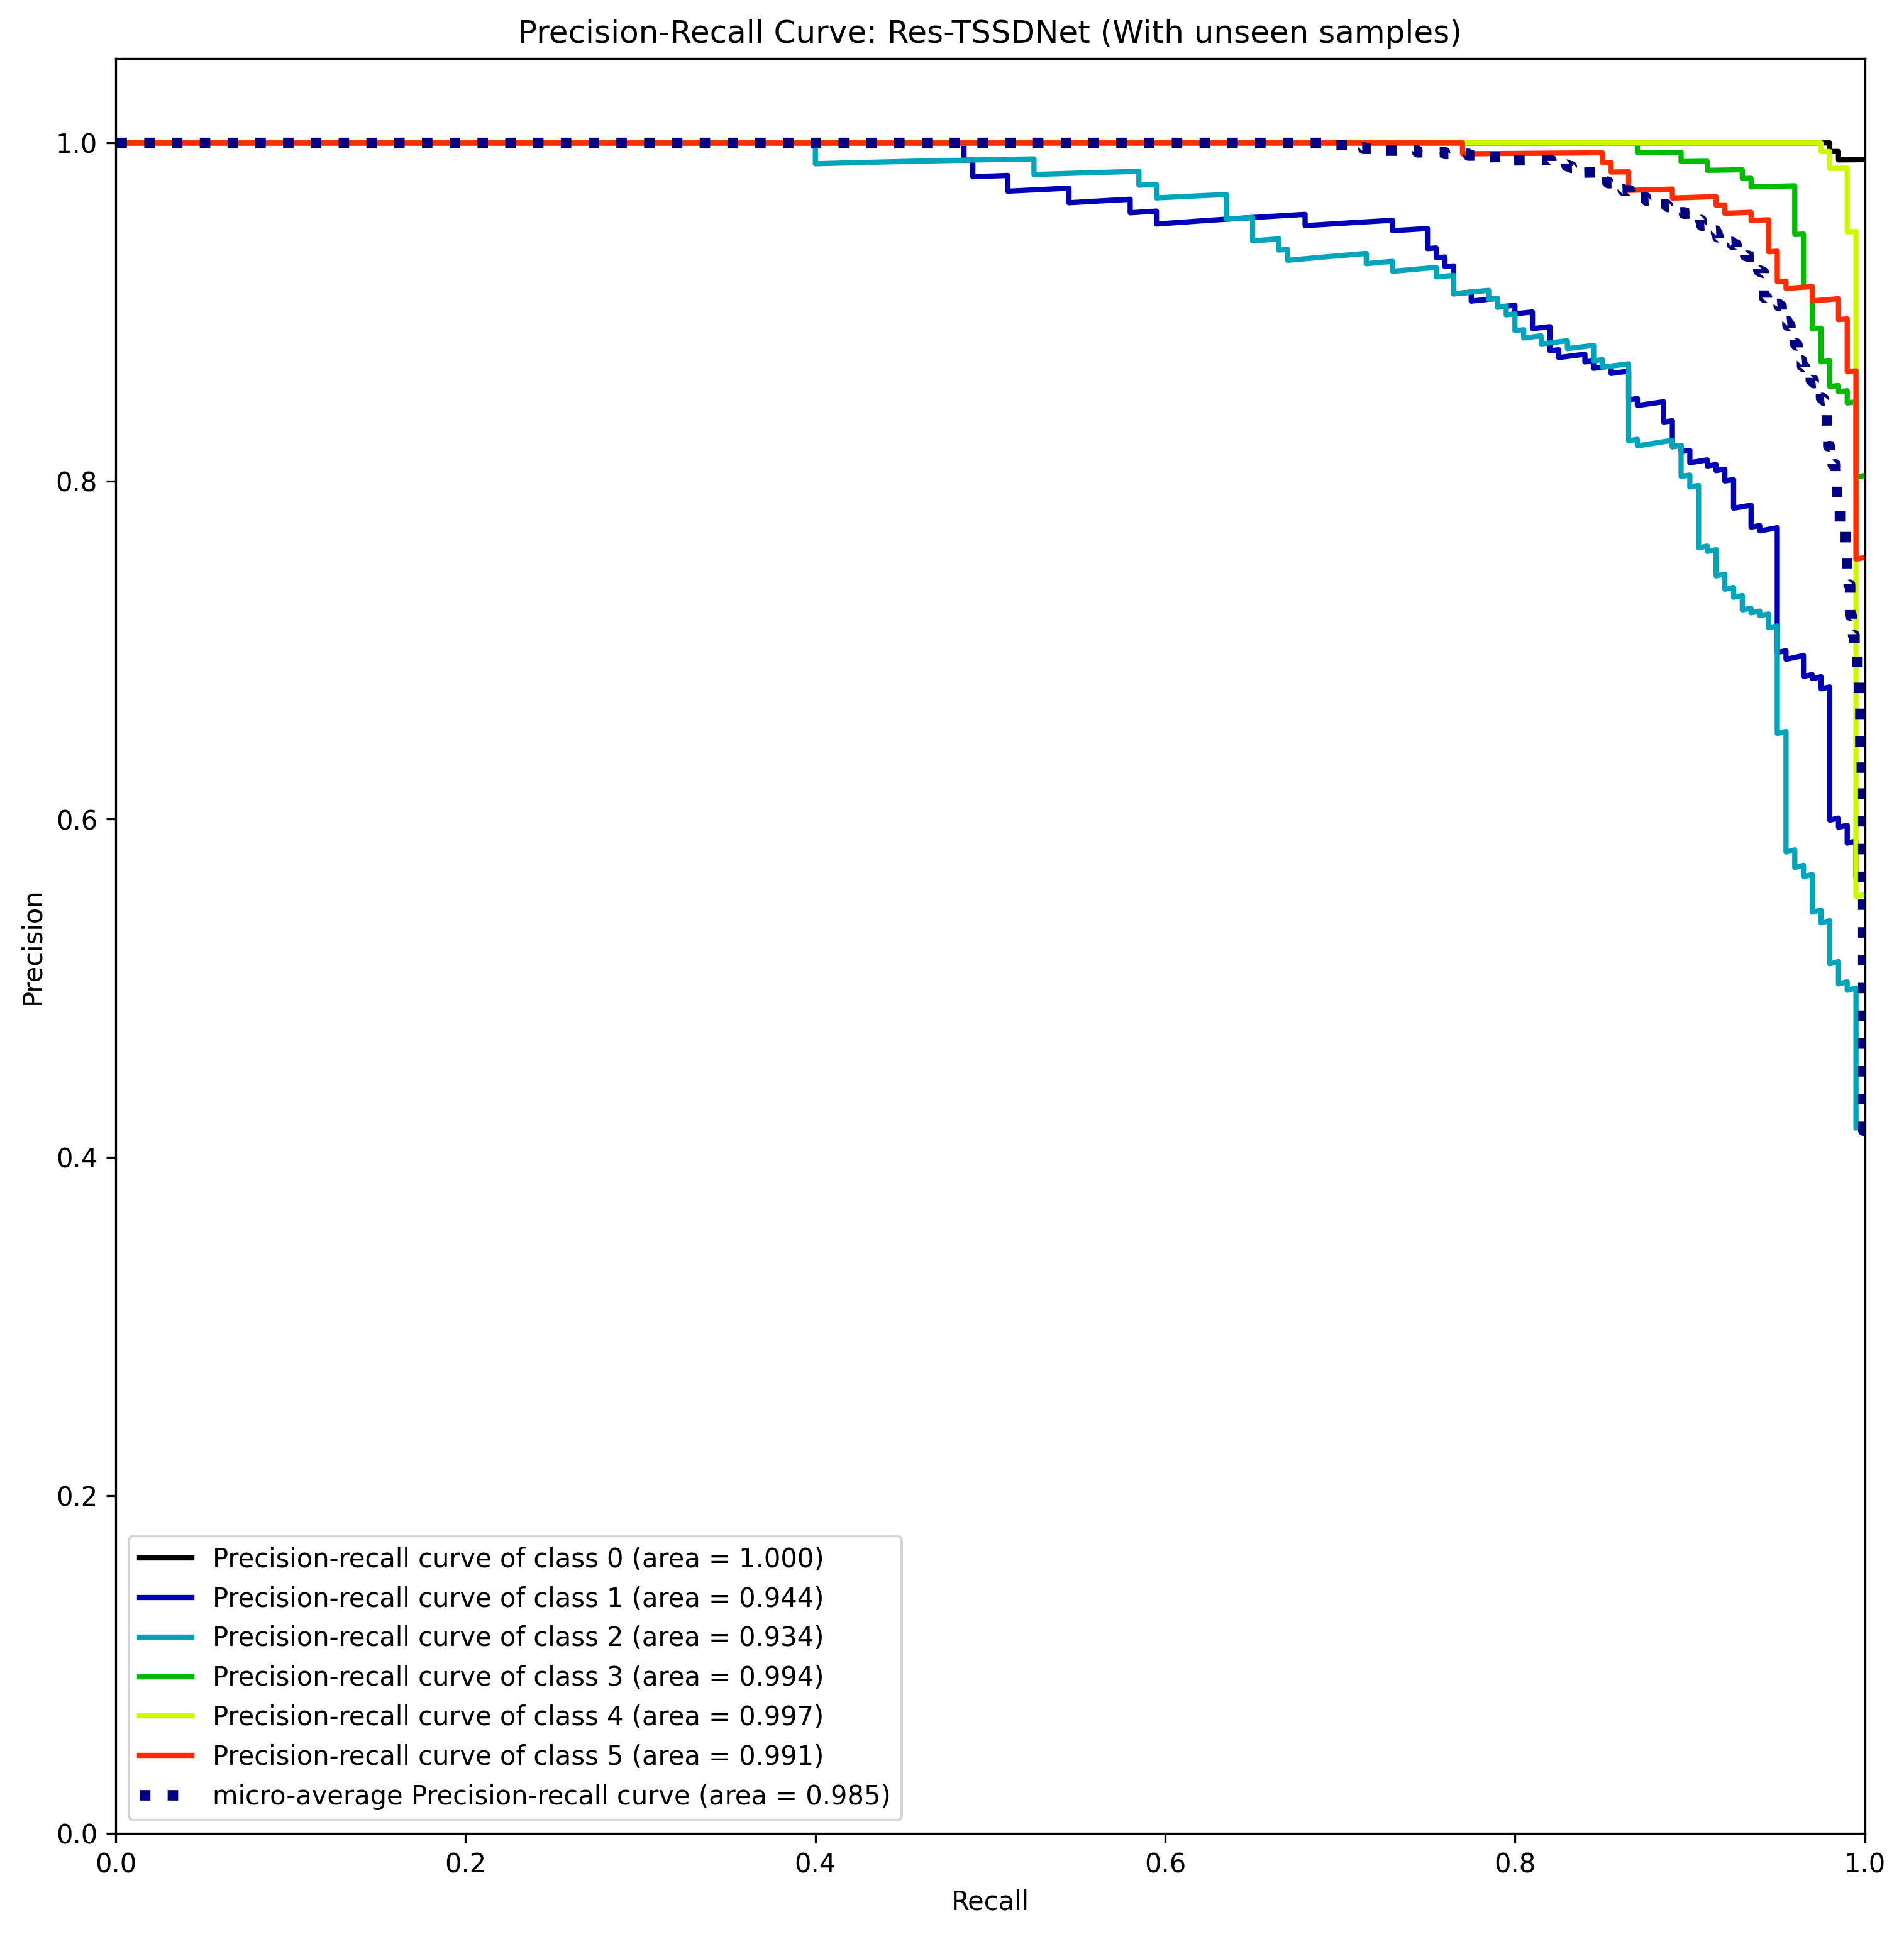

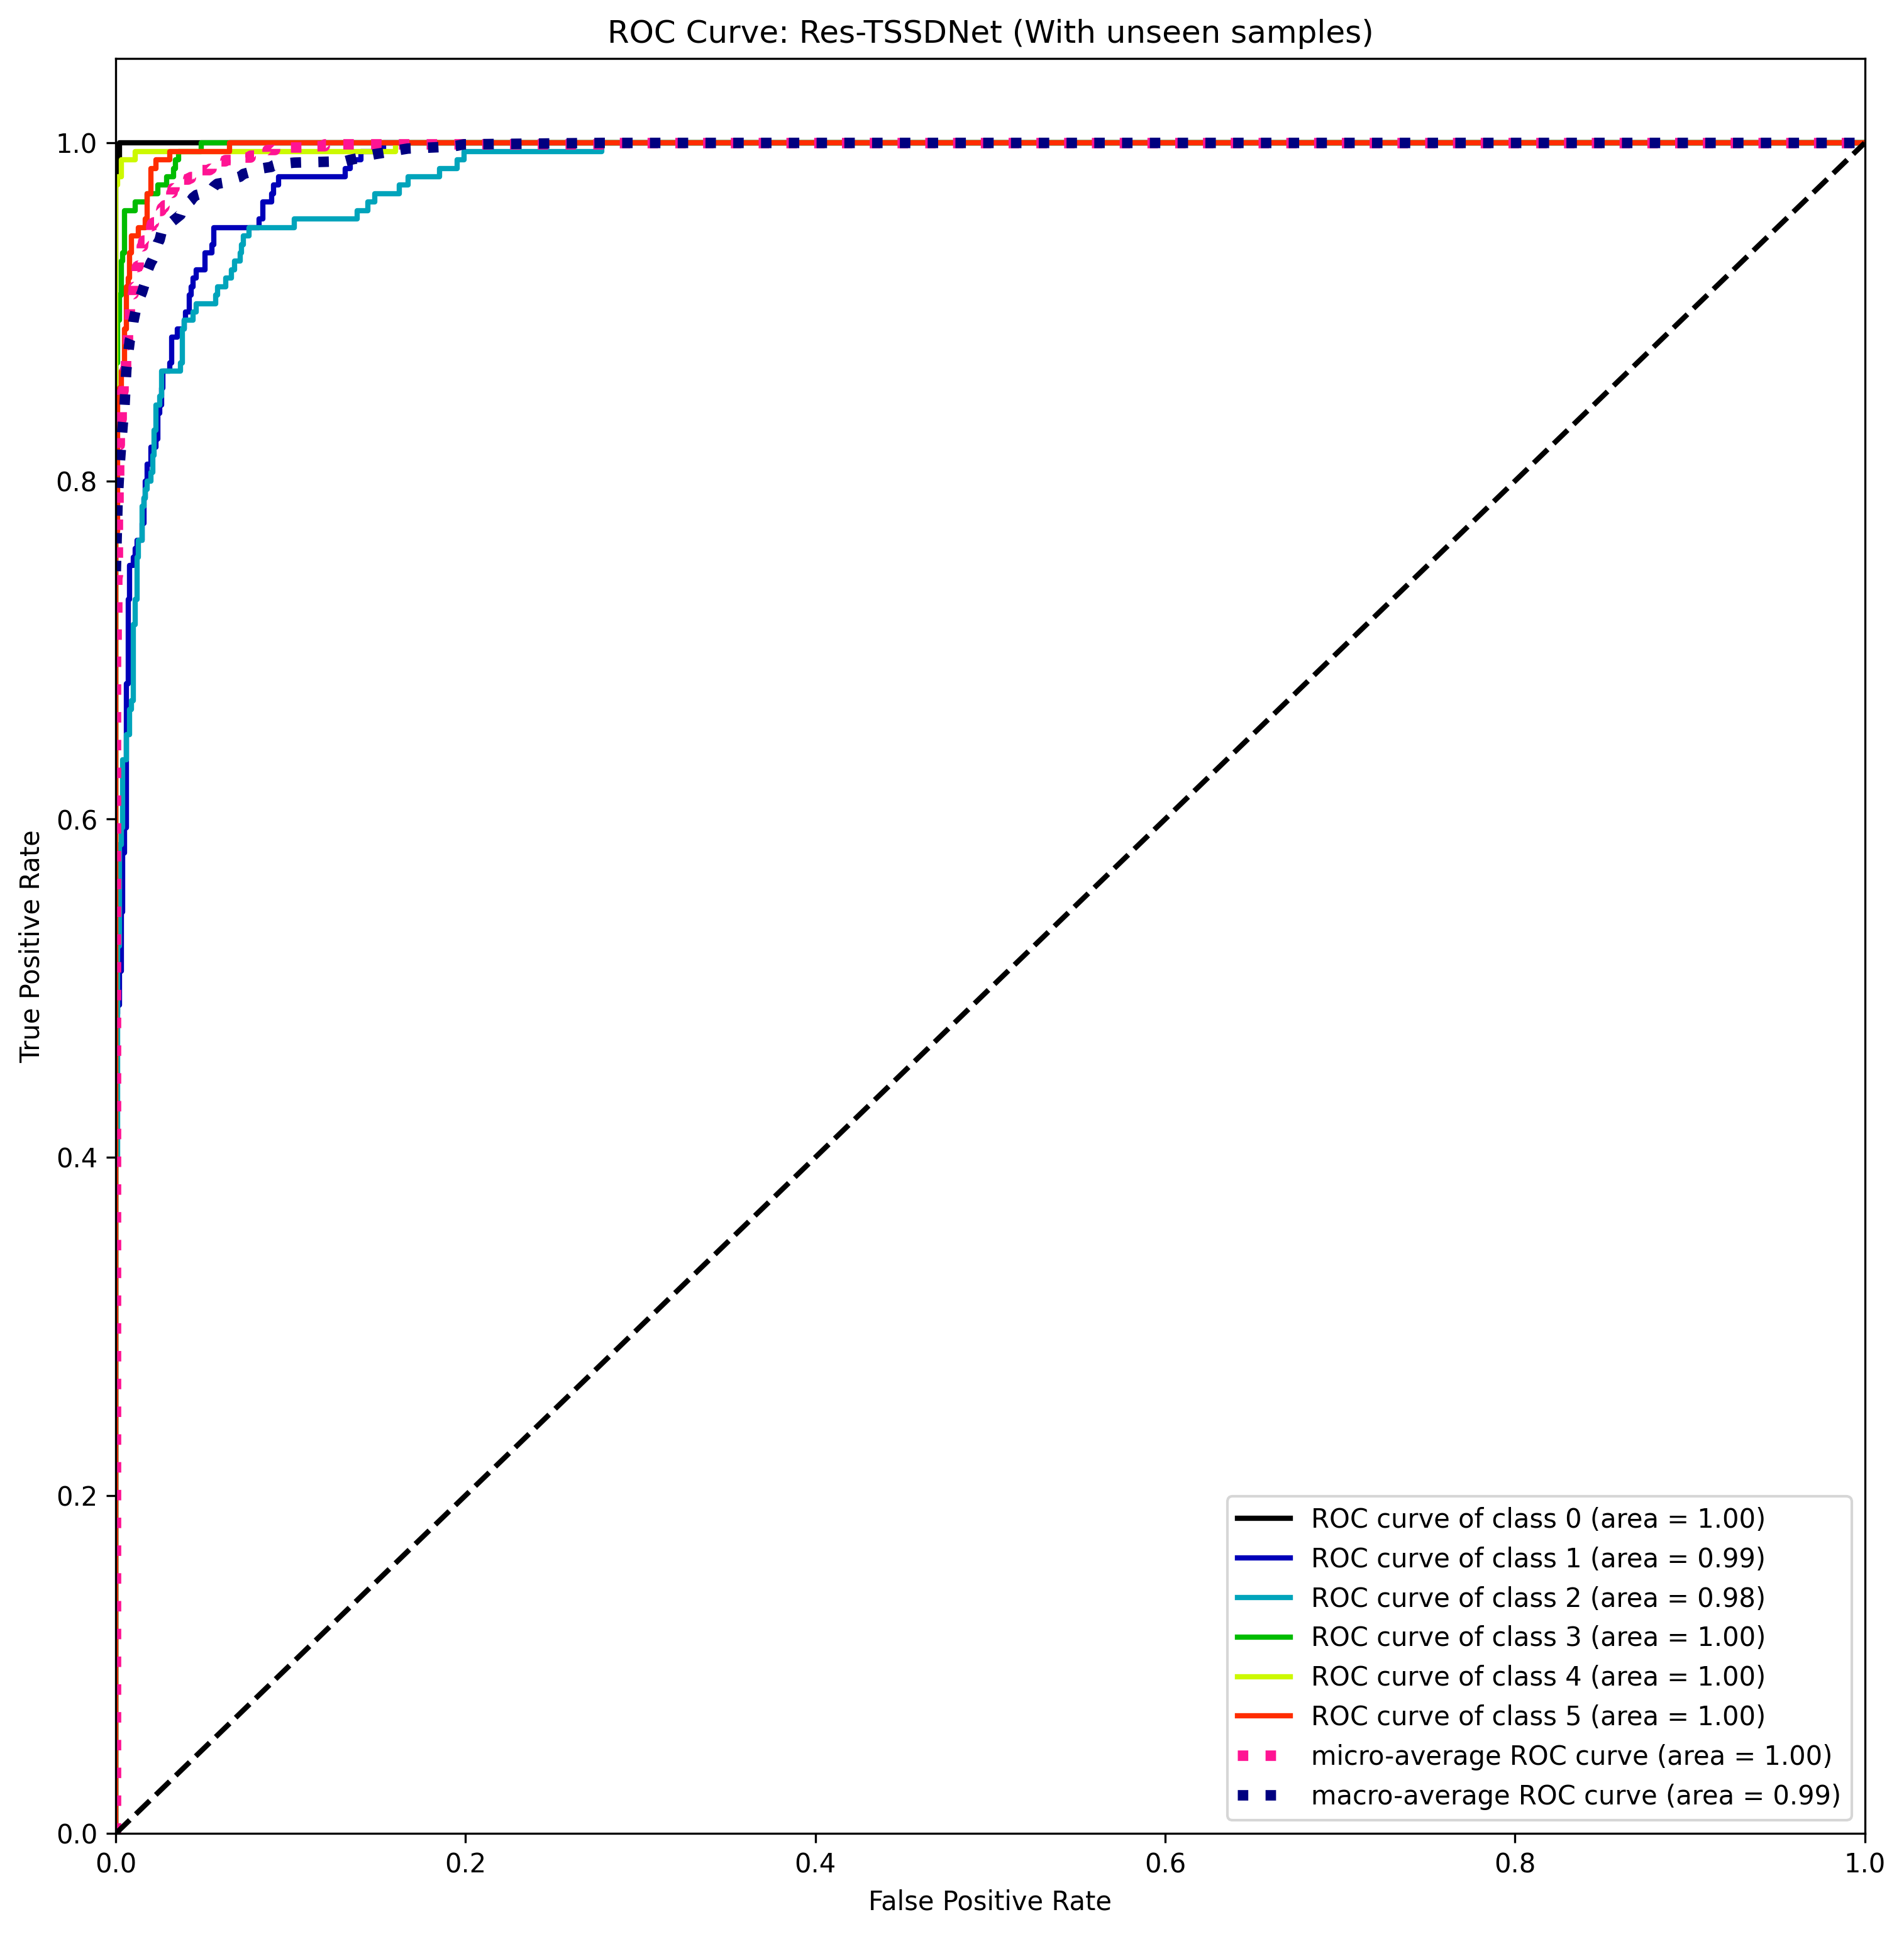

In [19]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "res", "with_unseen"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Res-TSSDNet (With unseen samples)",
    save_path=fig_save_path
)

## With augmentation

In [5]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/inc_tssdnet_with_unseen_aug/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_augmented_data=True,
    should_include_unseen_in_training_data=True,
)

In [6]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 75/75 [00:07<00:00, 10.39it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [8]:
print_scores(actual_labels, predictions)


    F1 Score: 1.00
    Accuracy: 1.00
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


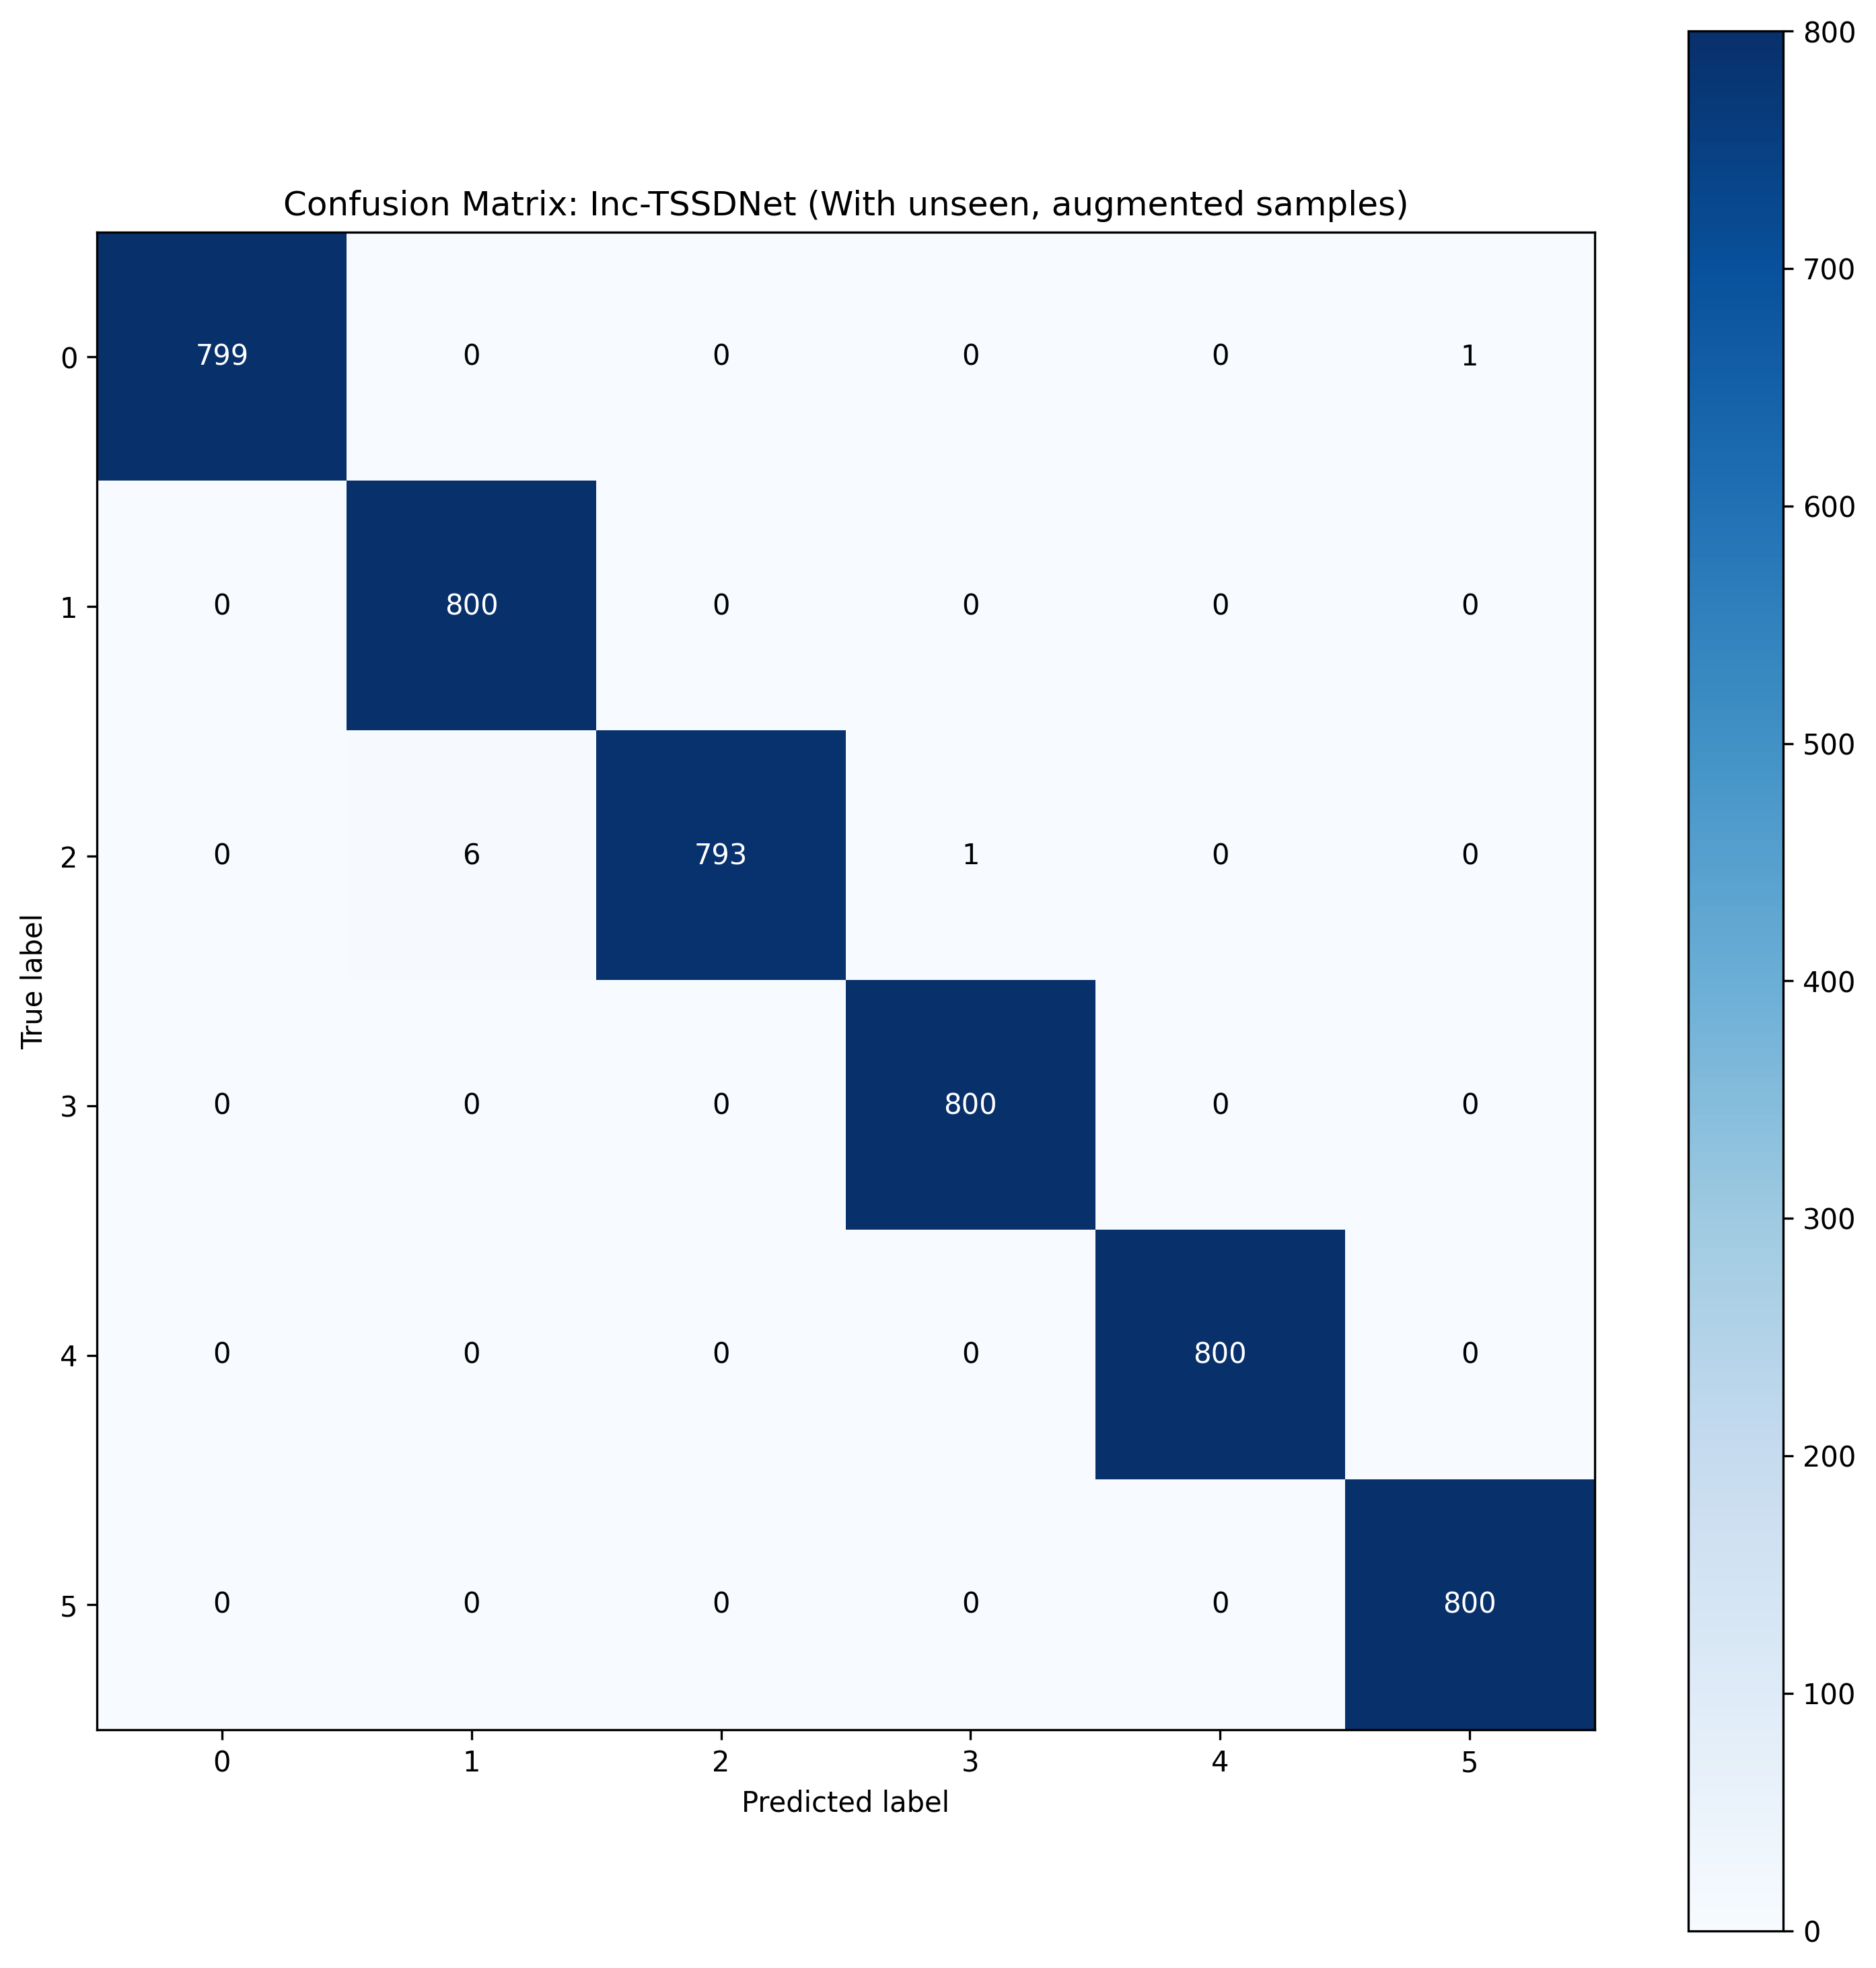

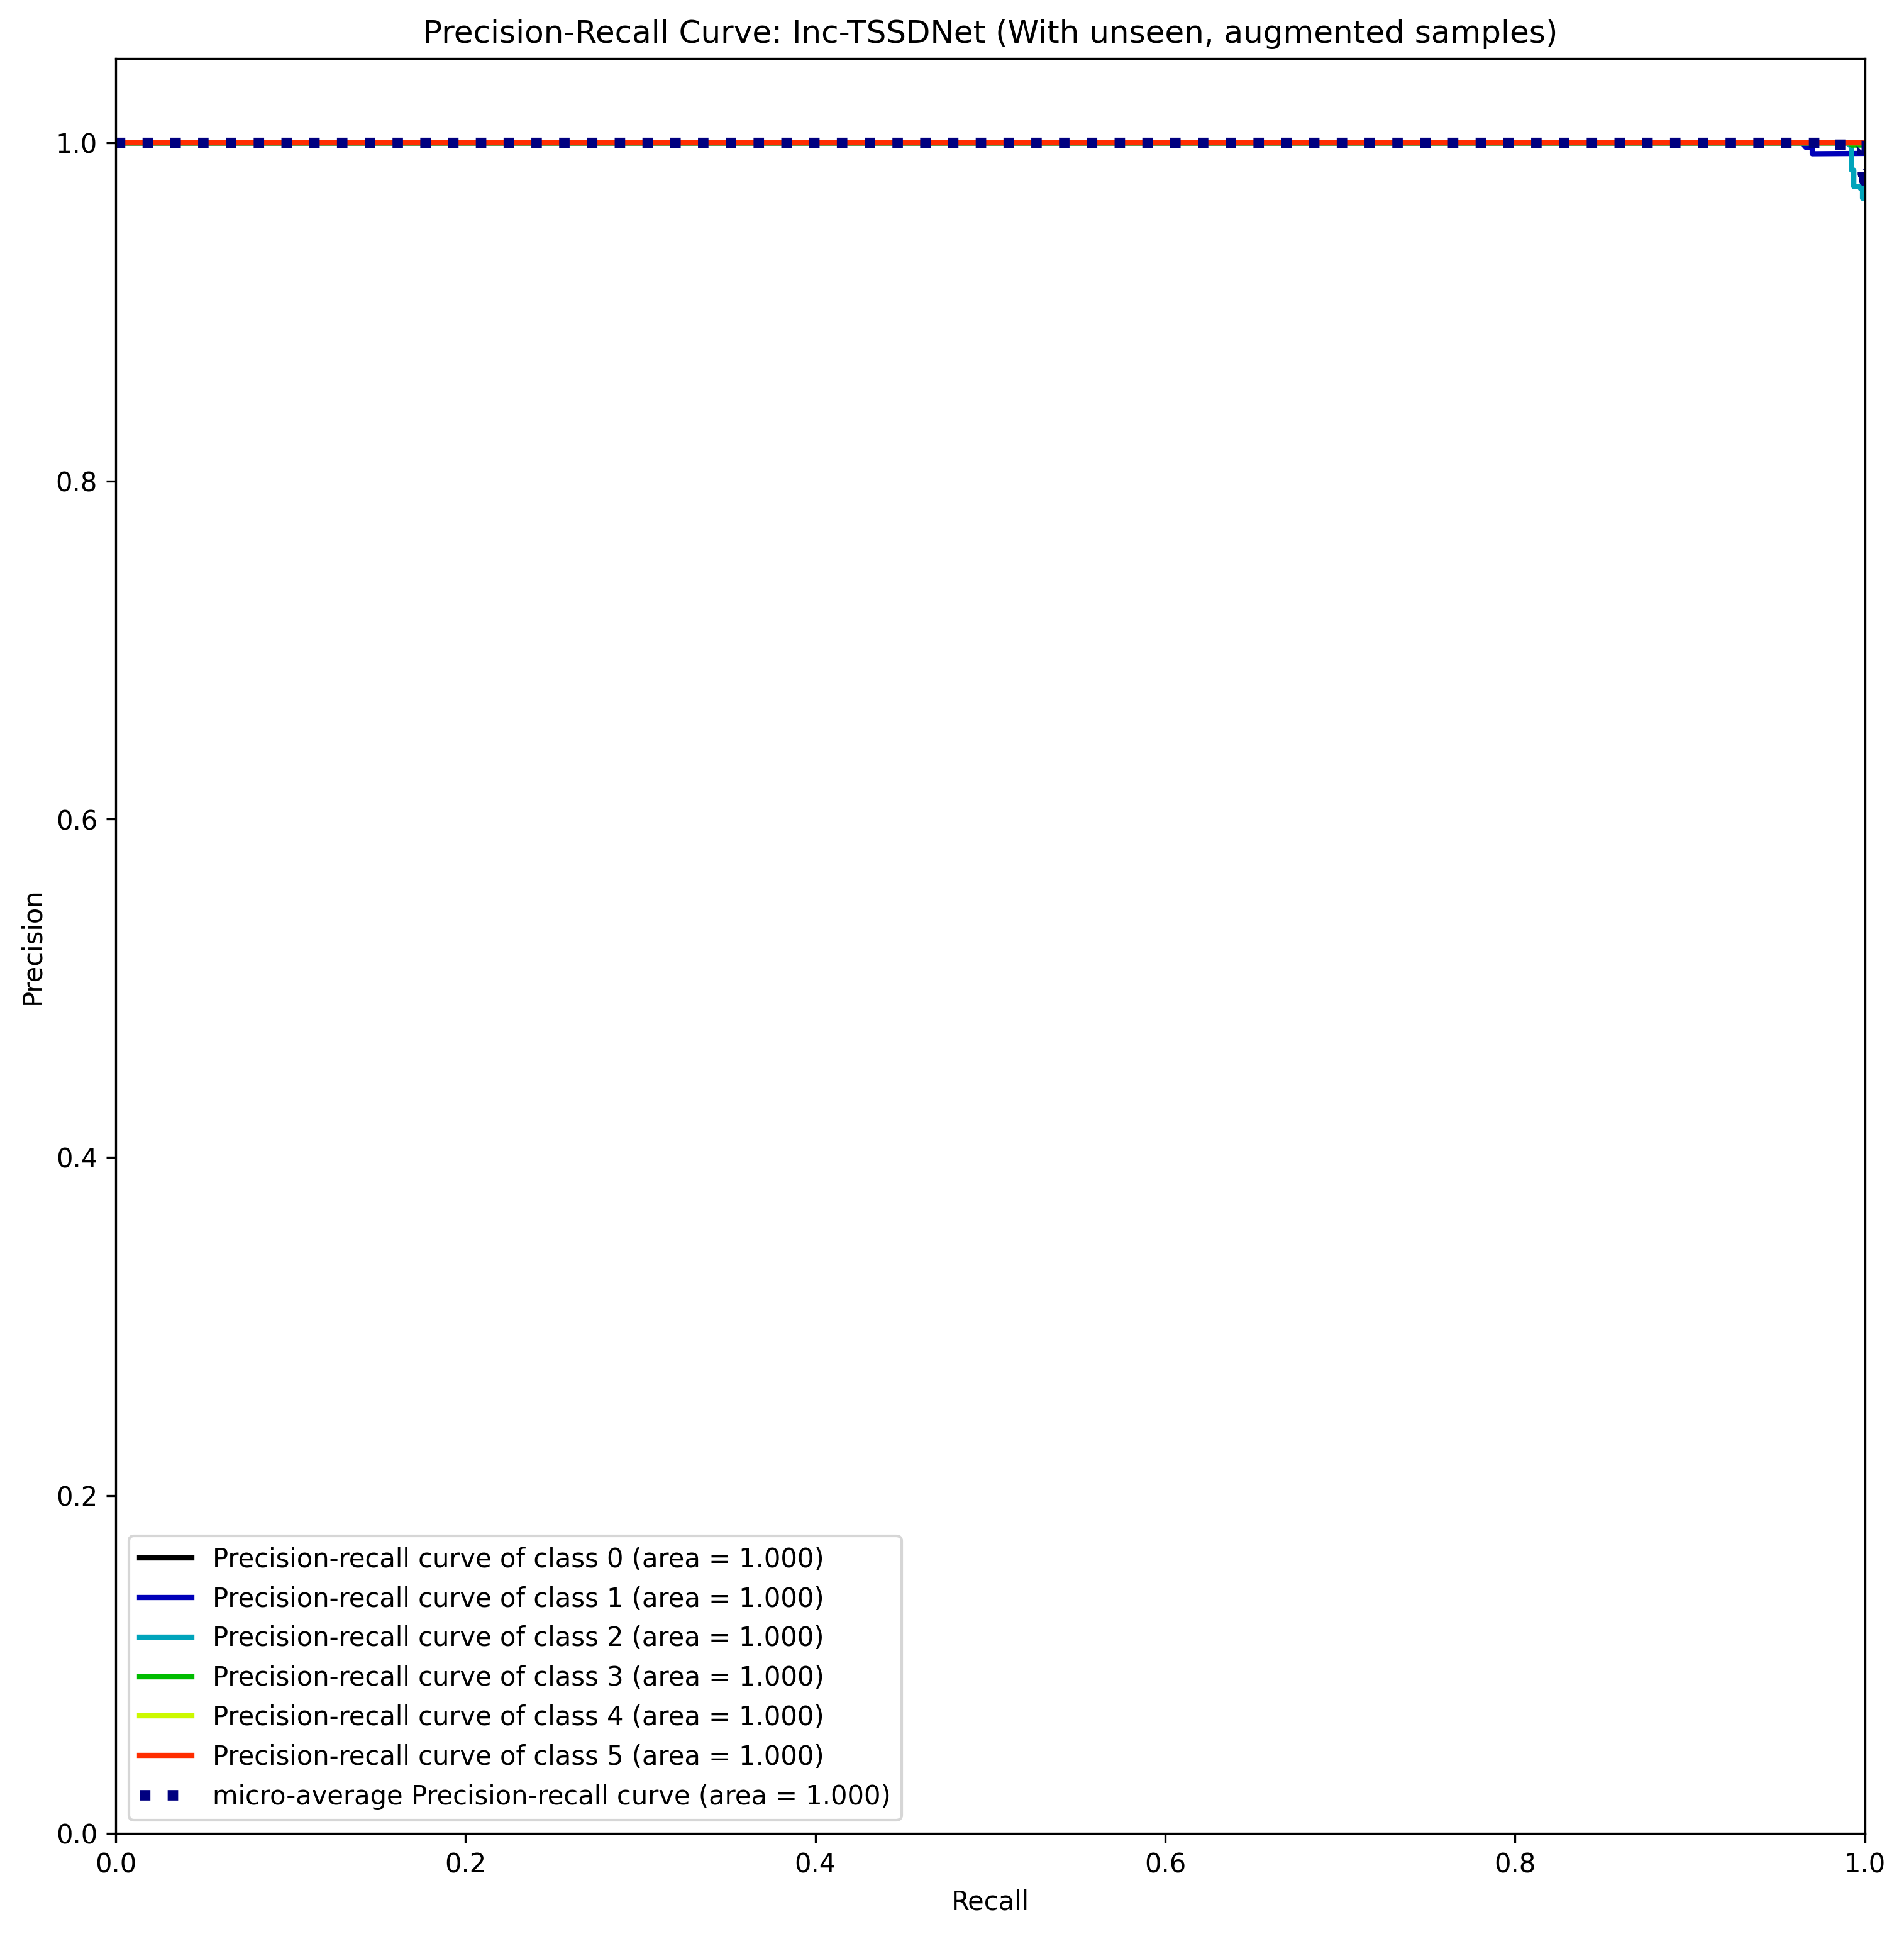

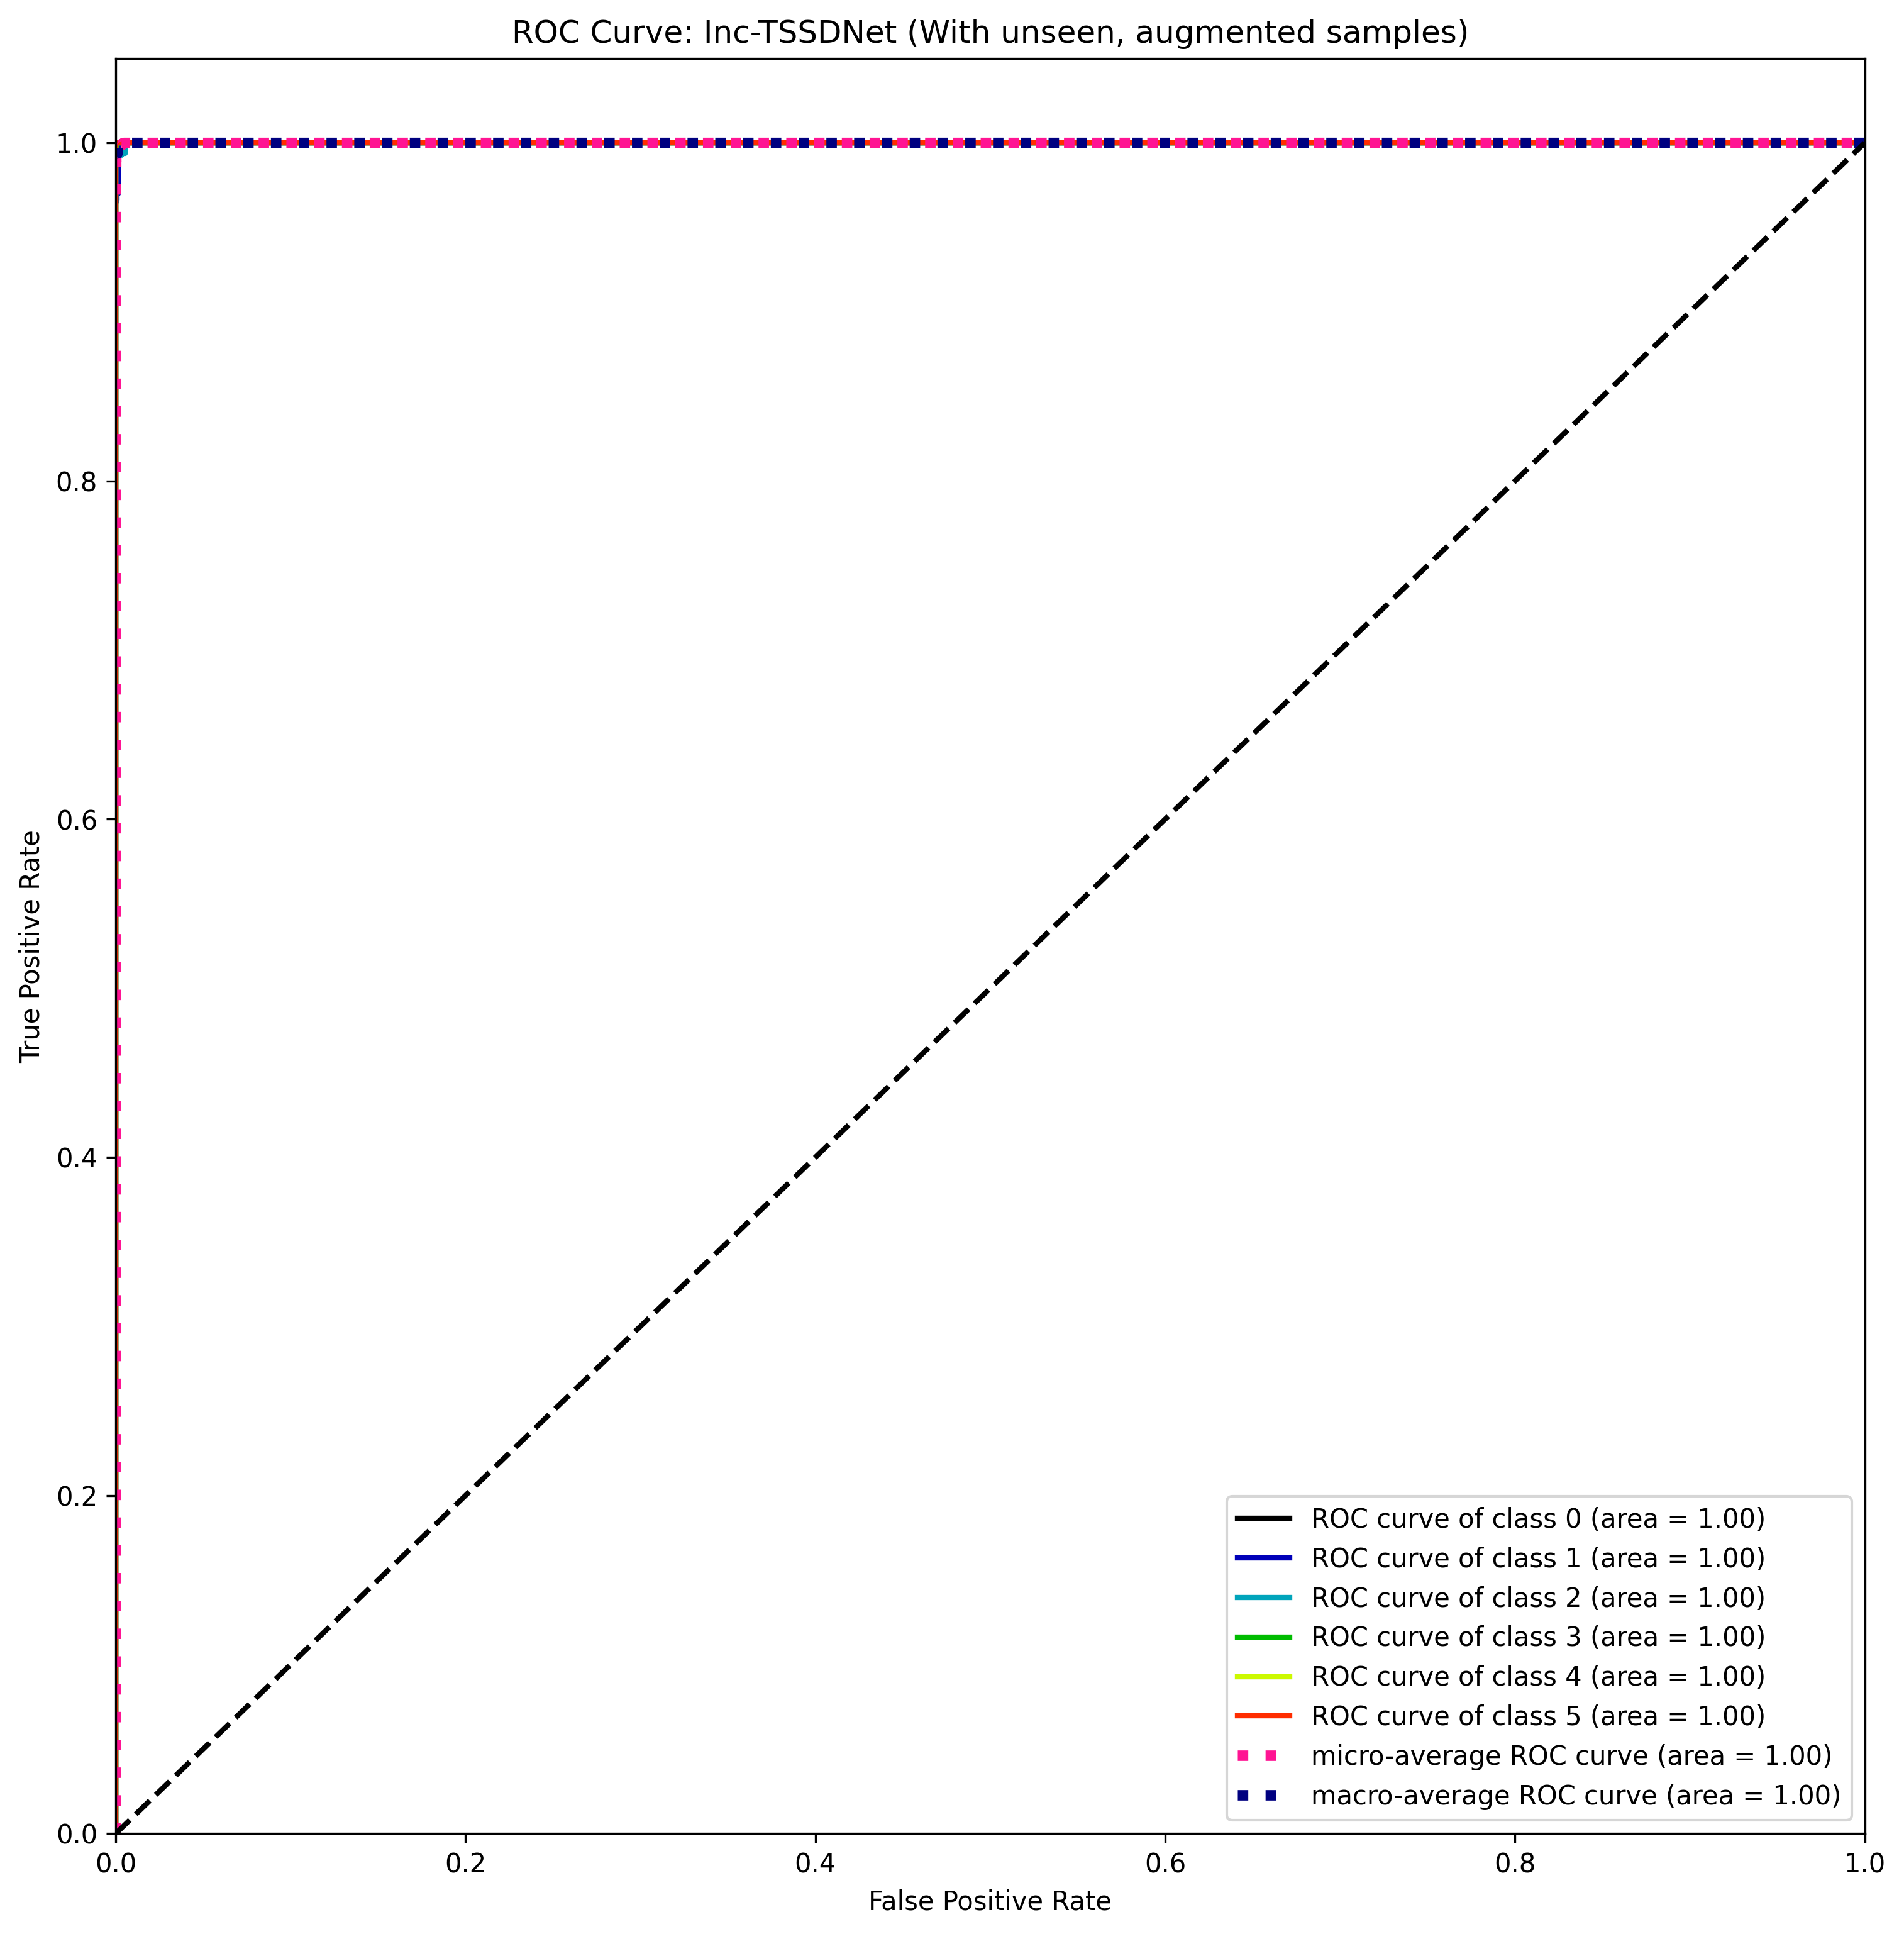

In [9]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "with_unseen_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (With unseen, augmented samples)",
    save_path=fig_save_path
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 63/63 [00:06<00:00, 10.35it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)



    F1 Score: 1.00
    Accuracy: 1.00
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


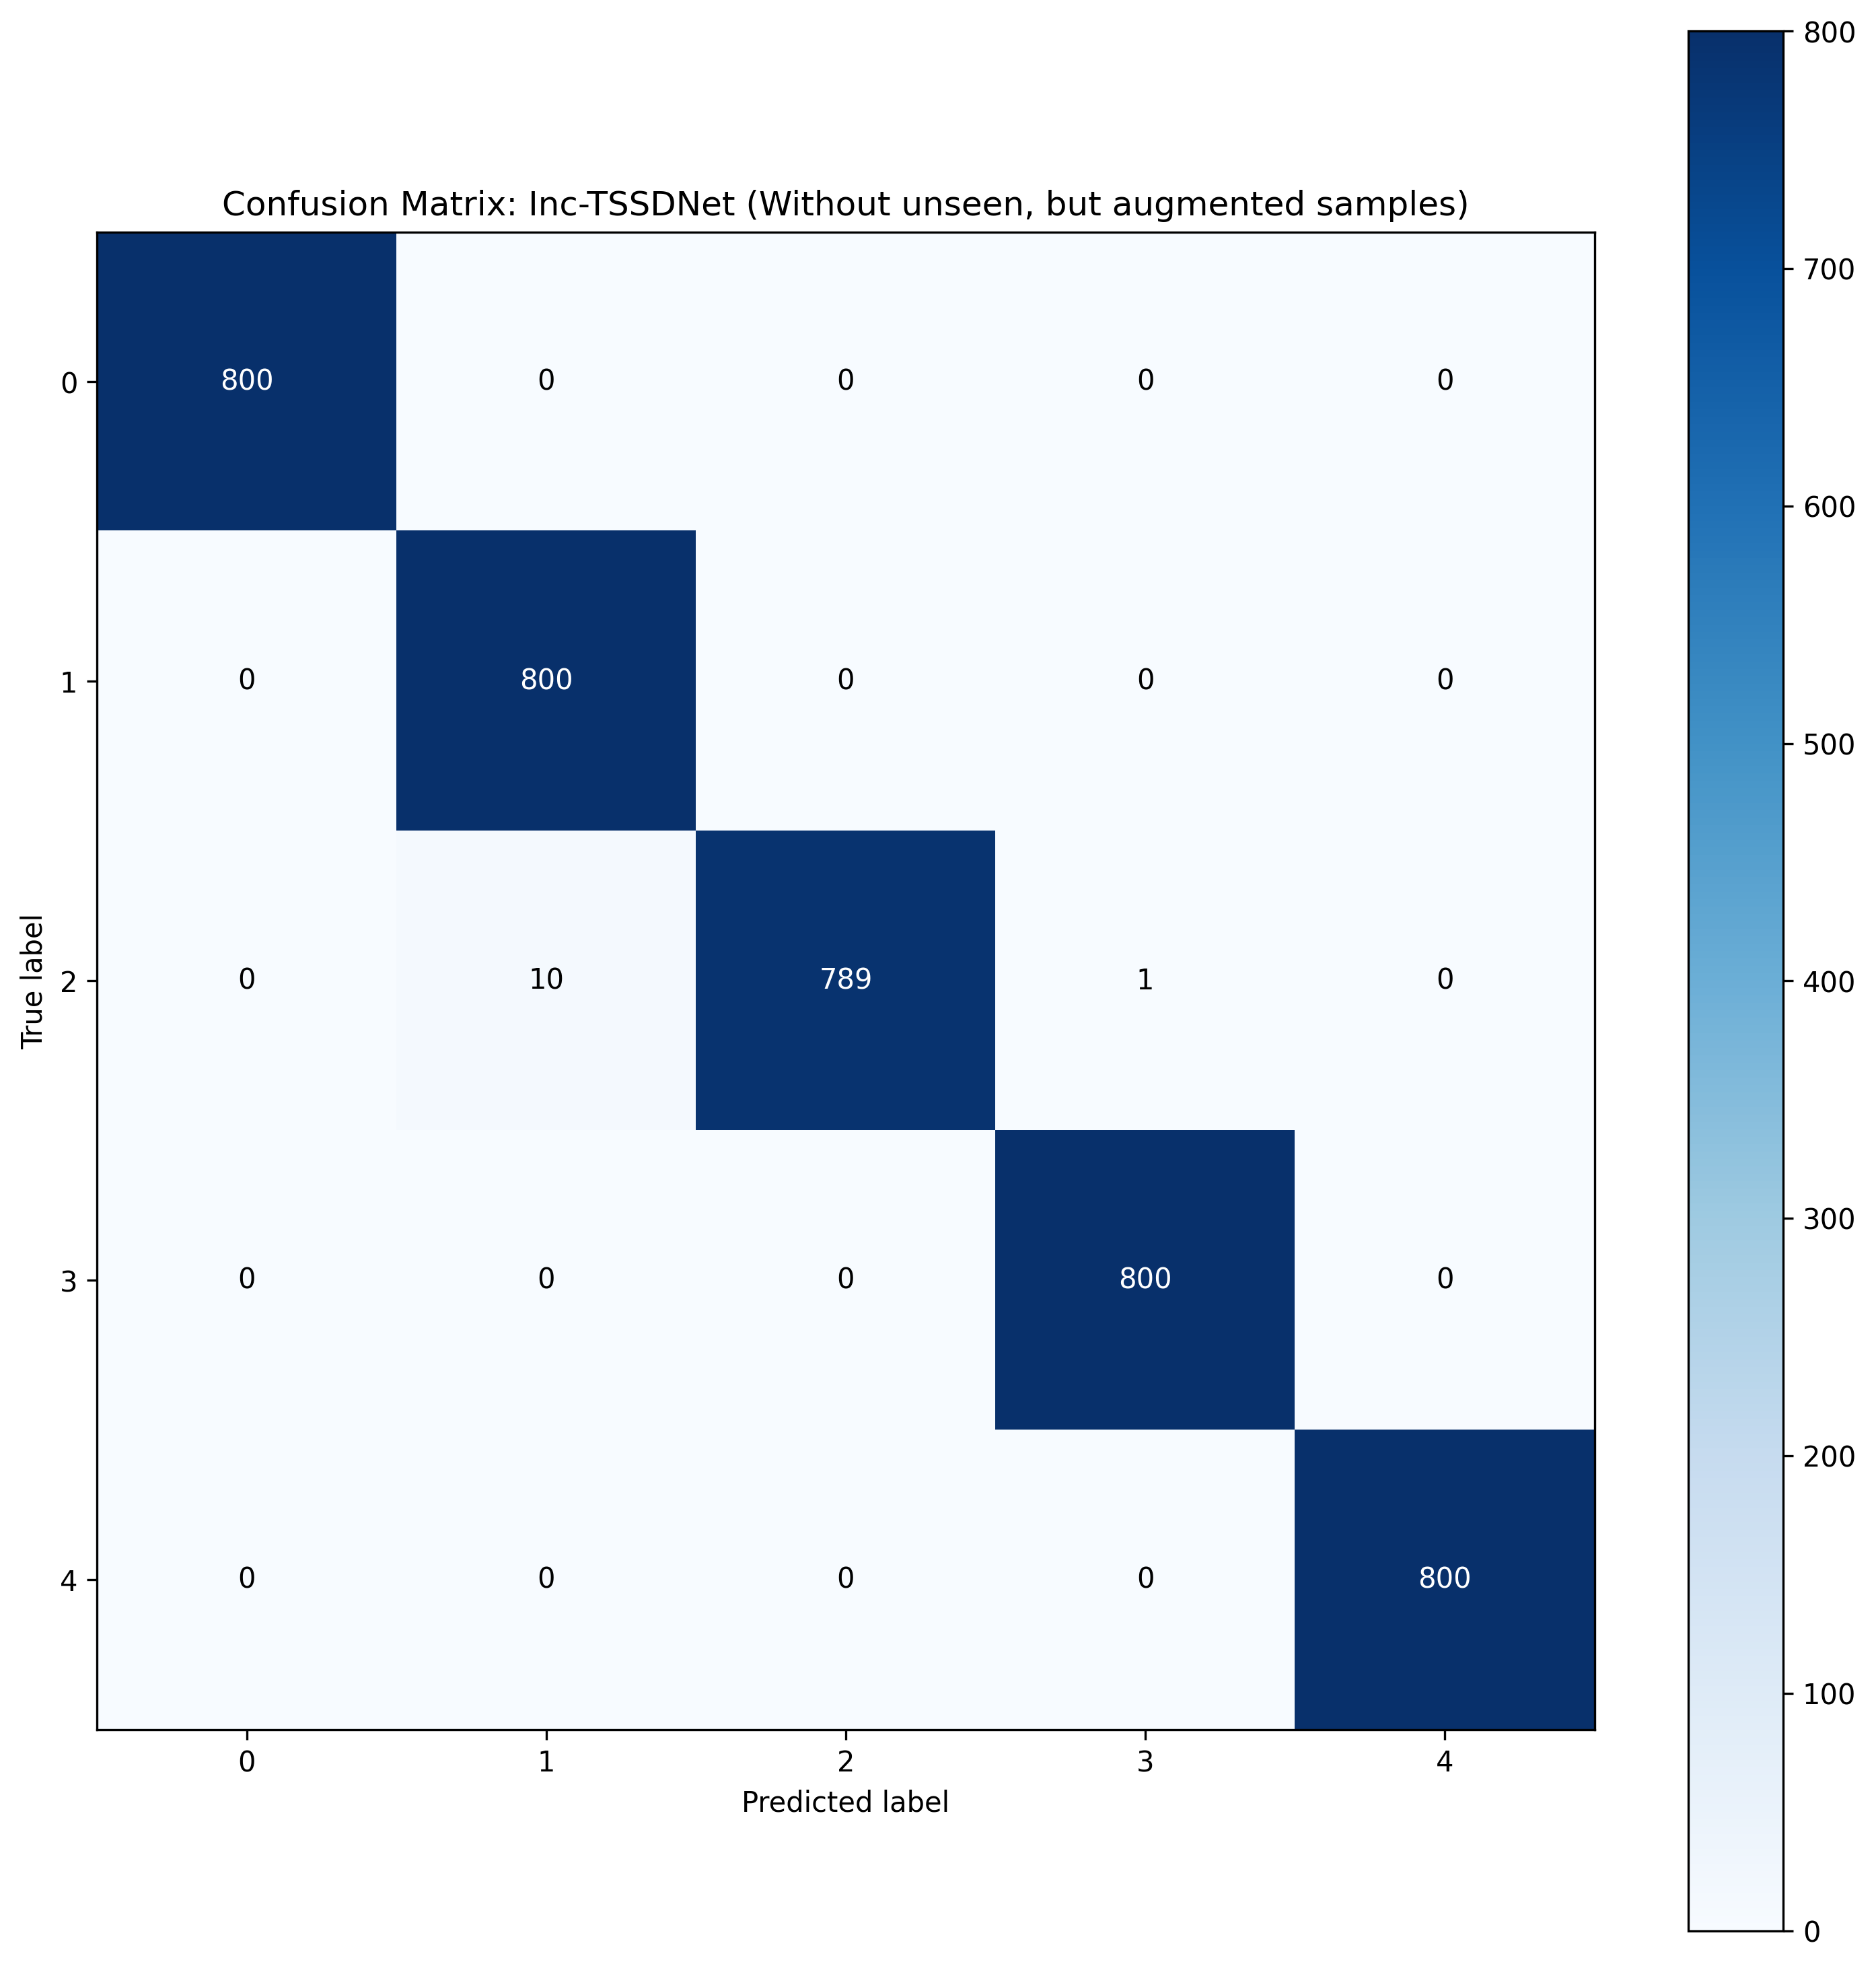

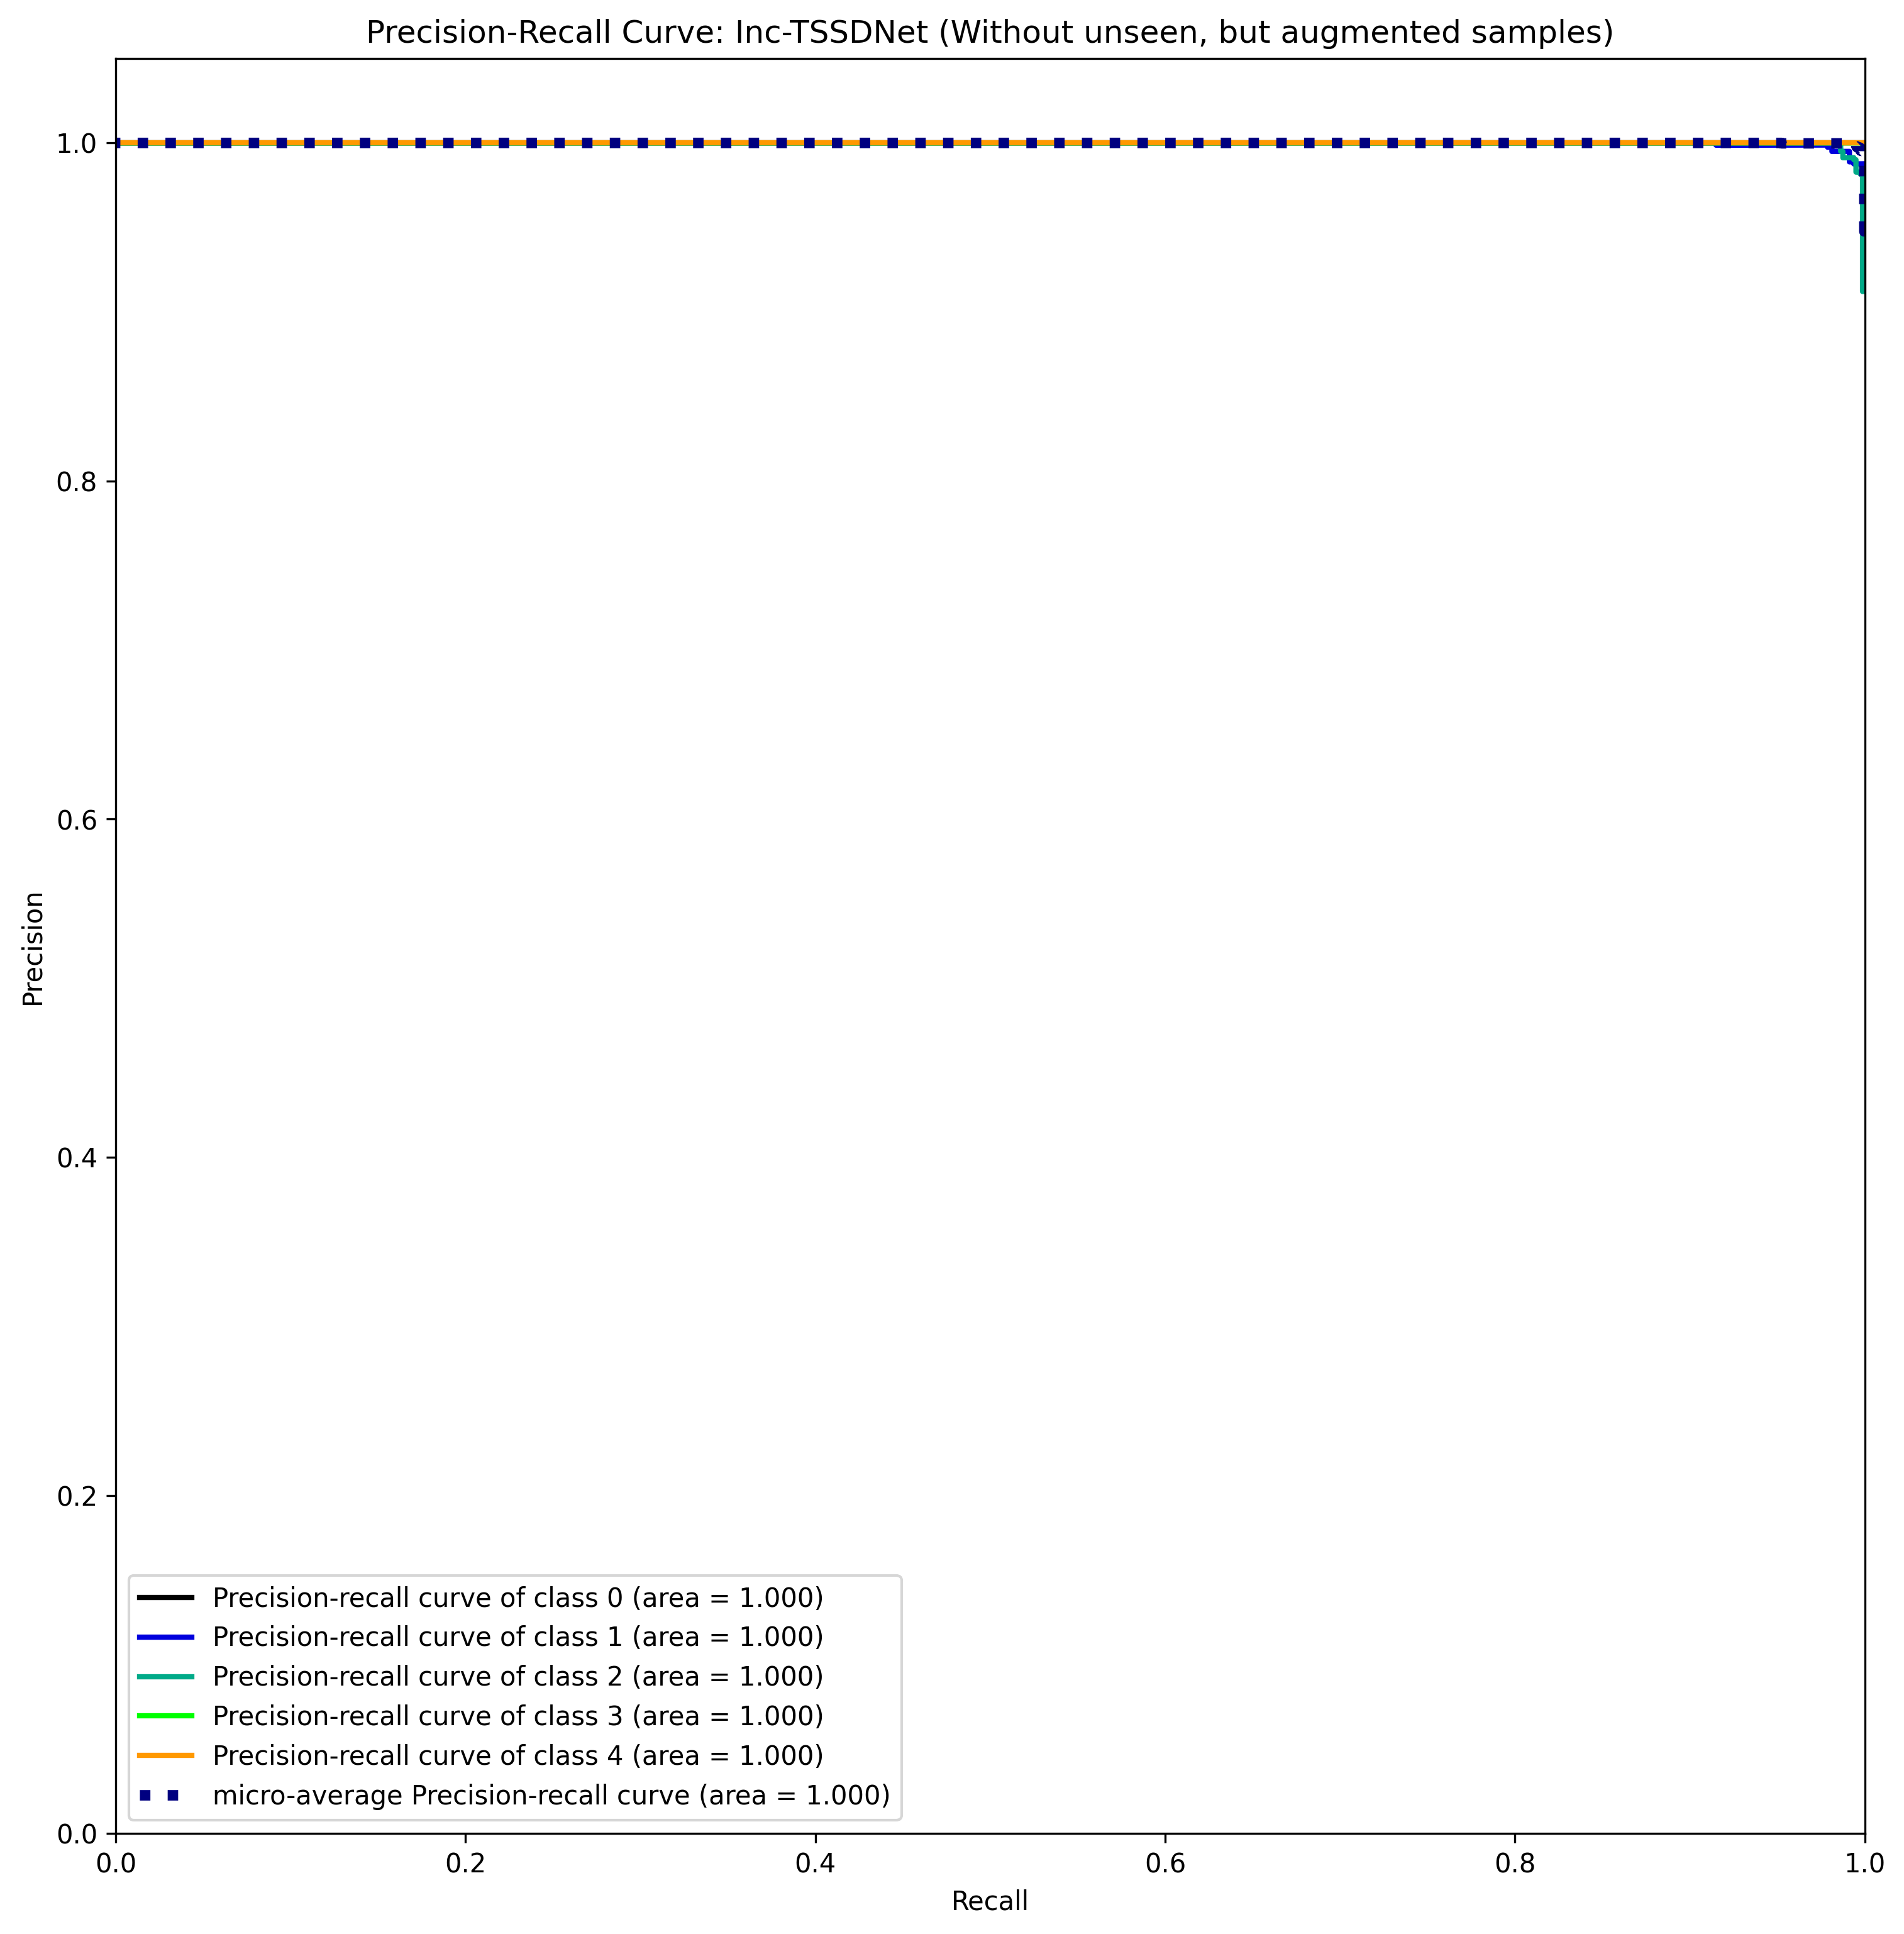

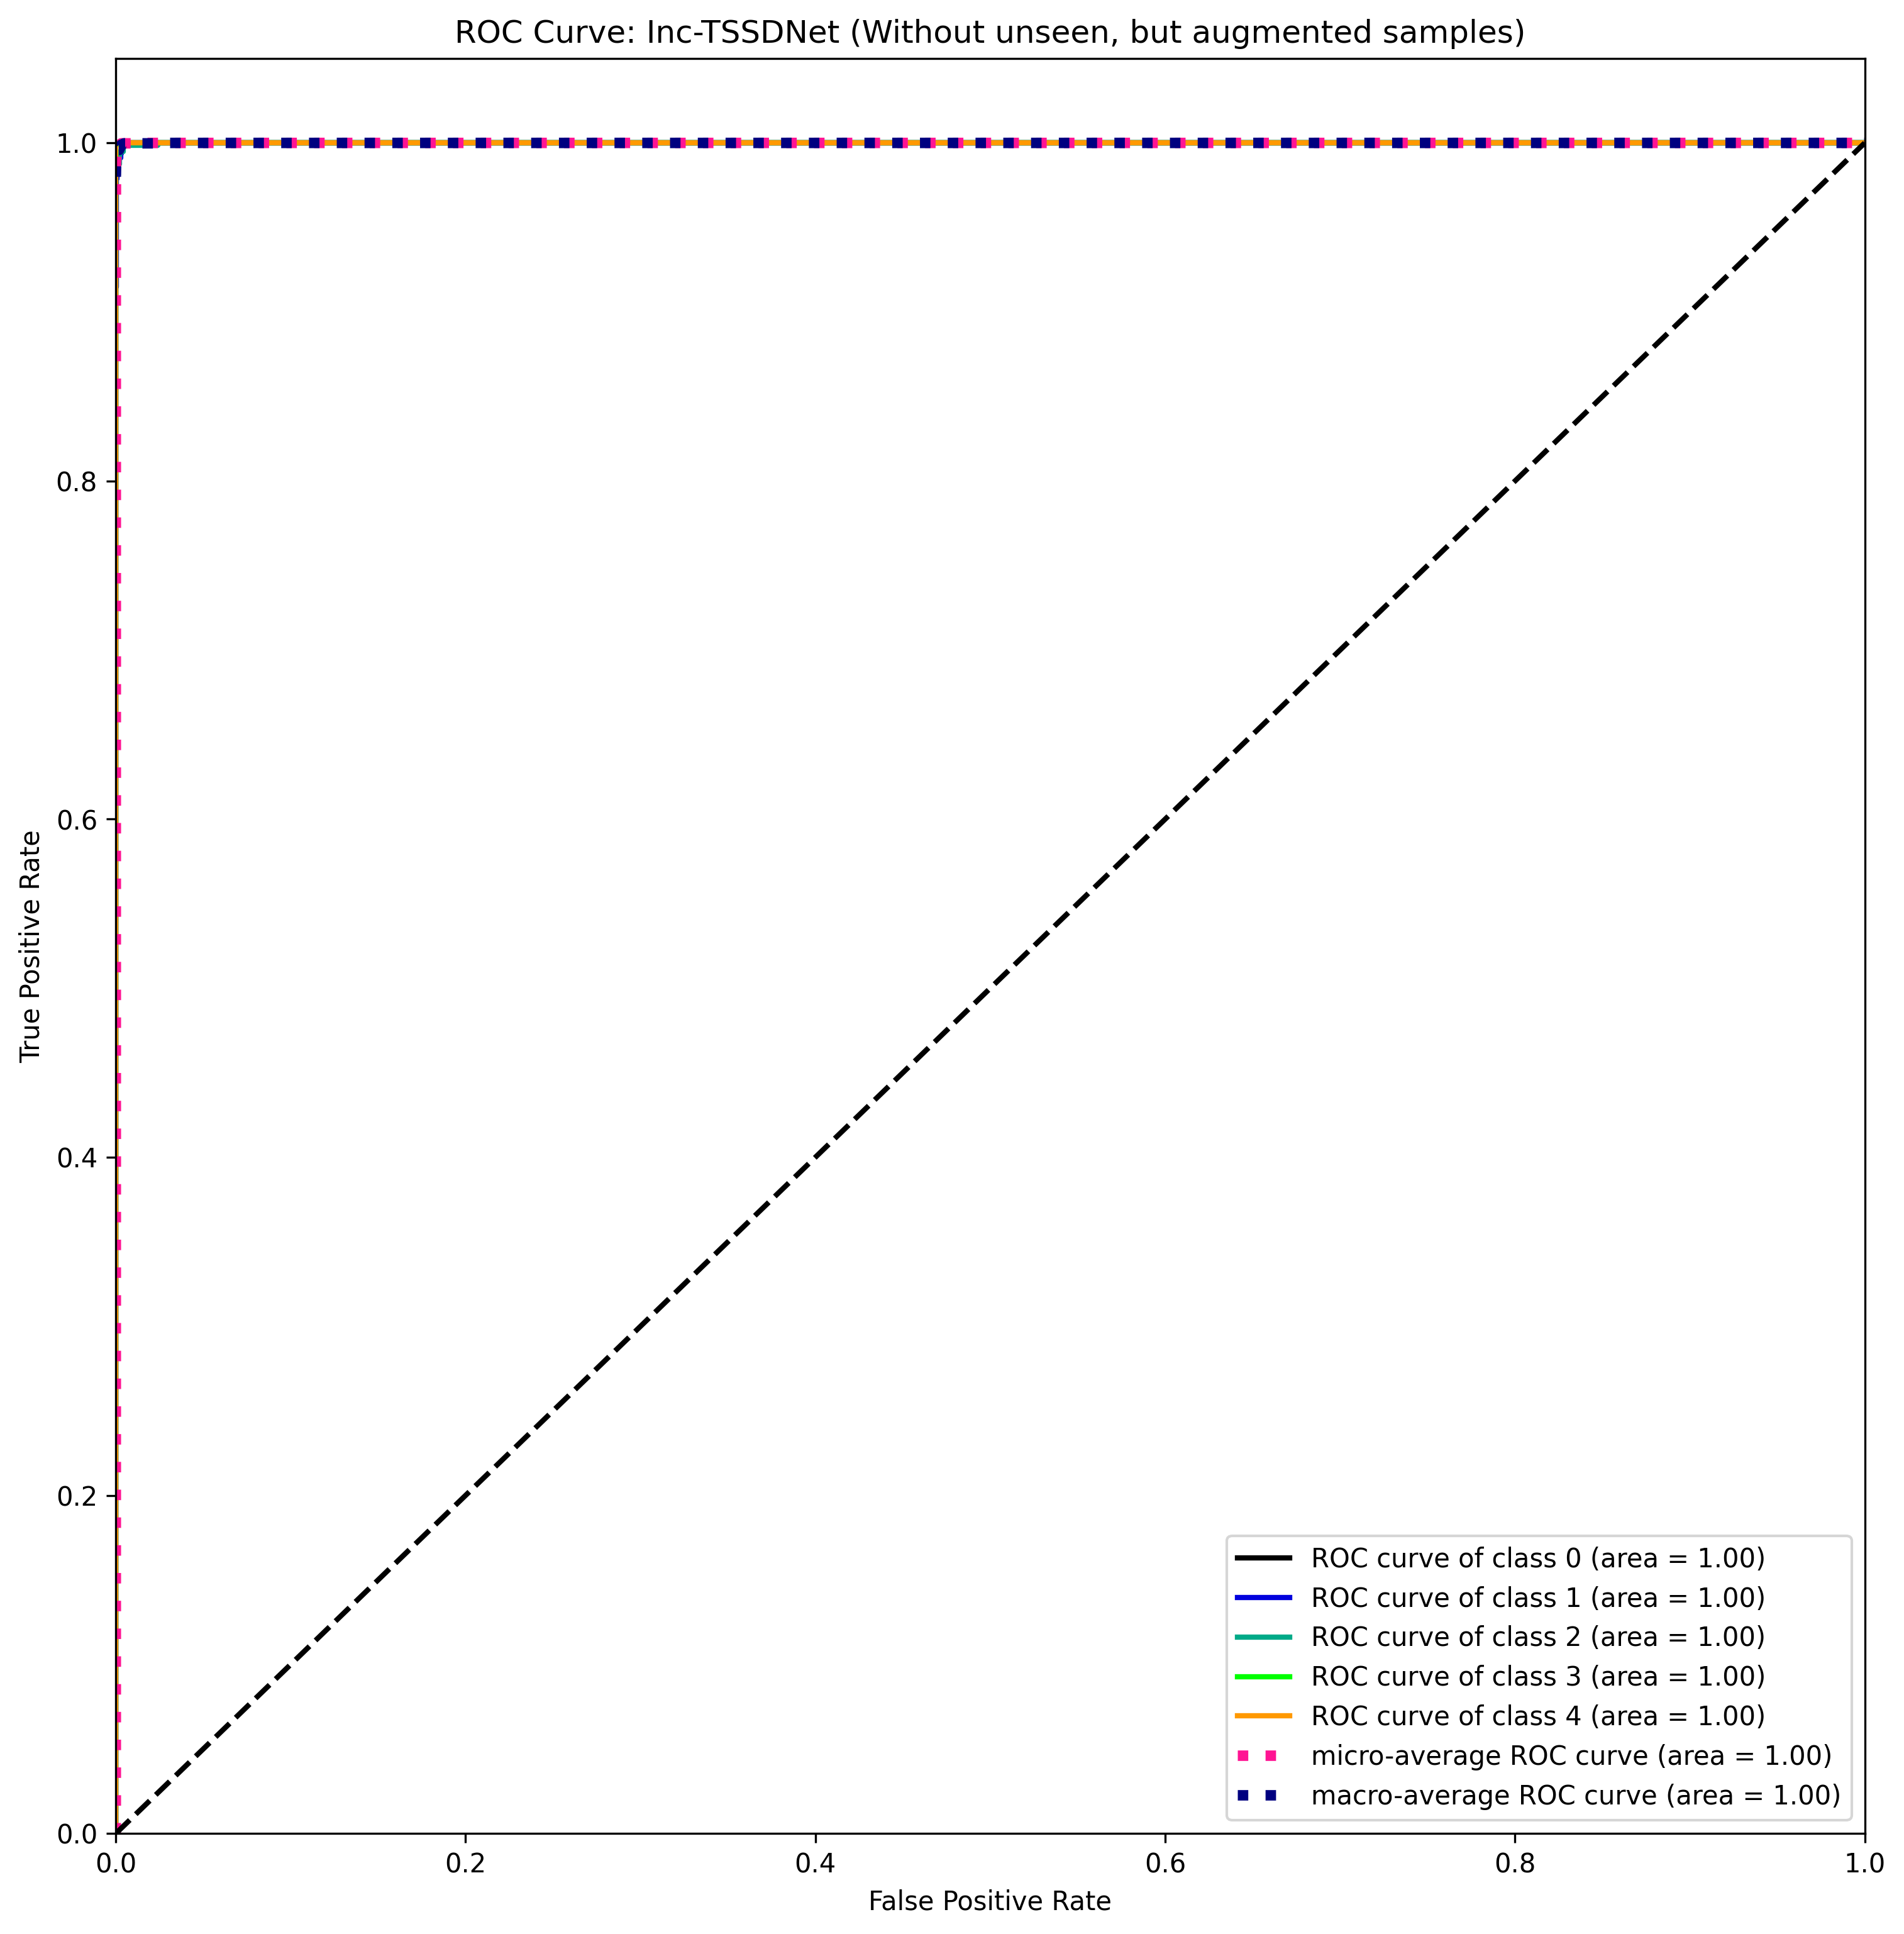

In [10]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/inc_tssdnet_without_unseen_aug/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_augmented_data=True,
    should_include_unseen_in_training_data=False,
)
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);
print_scores(actual_labels, predictions)
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "without_unseen_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (Without unseen, but augmented samples)",
    save_path=fig_save_path
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Predicting: 100%|██████████| 75/75 [00:11<00:00,  6.35it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)



    F1 Score: 0.99
    Accuracy: 0.99
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


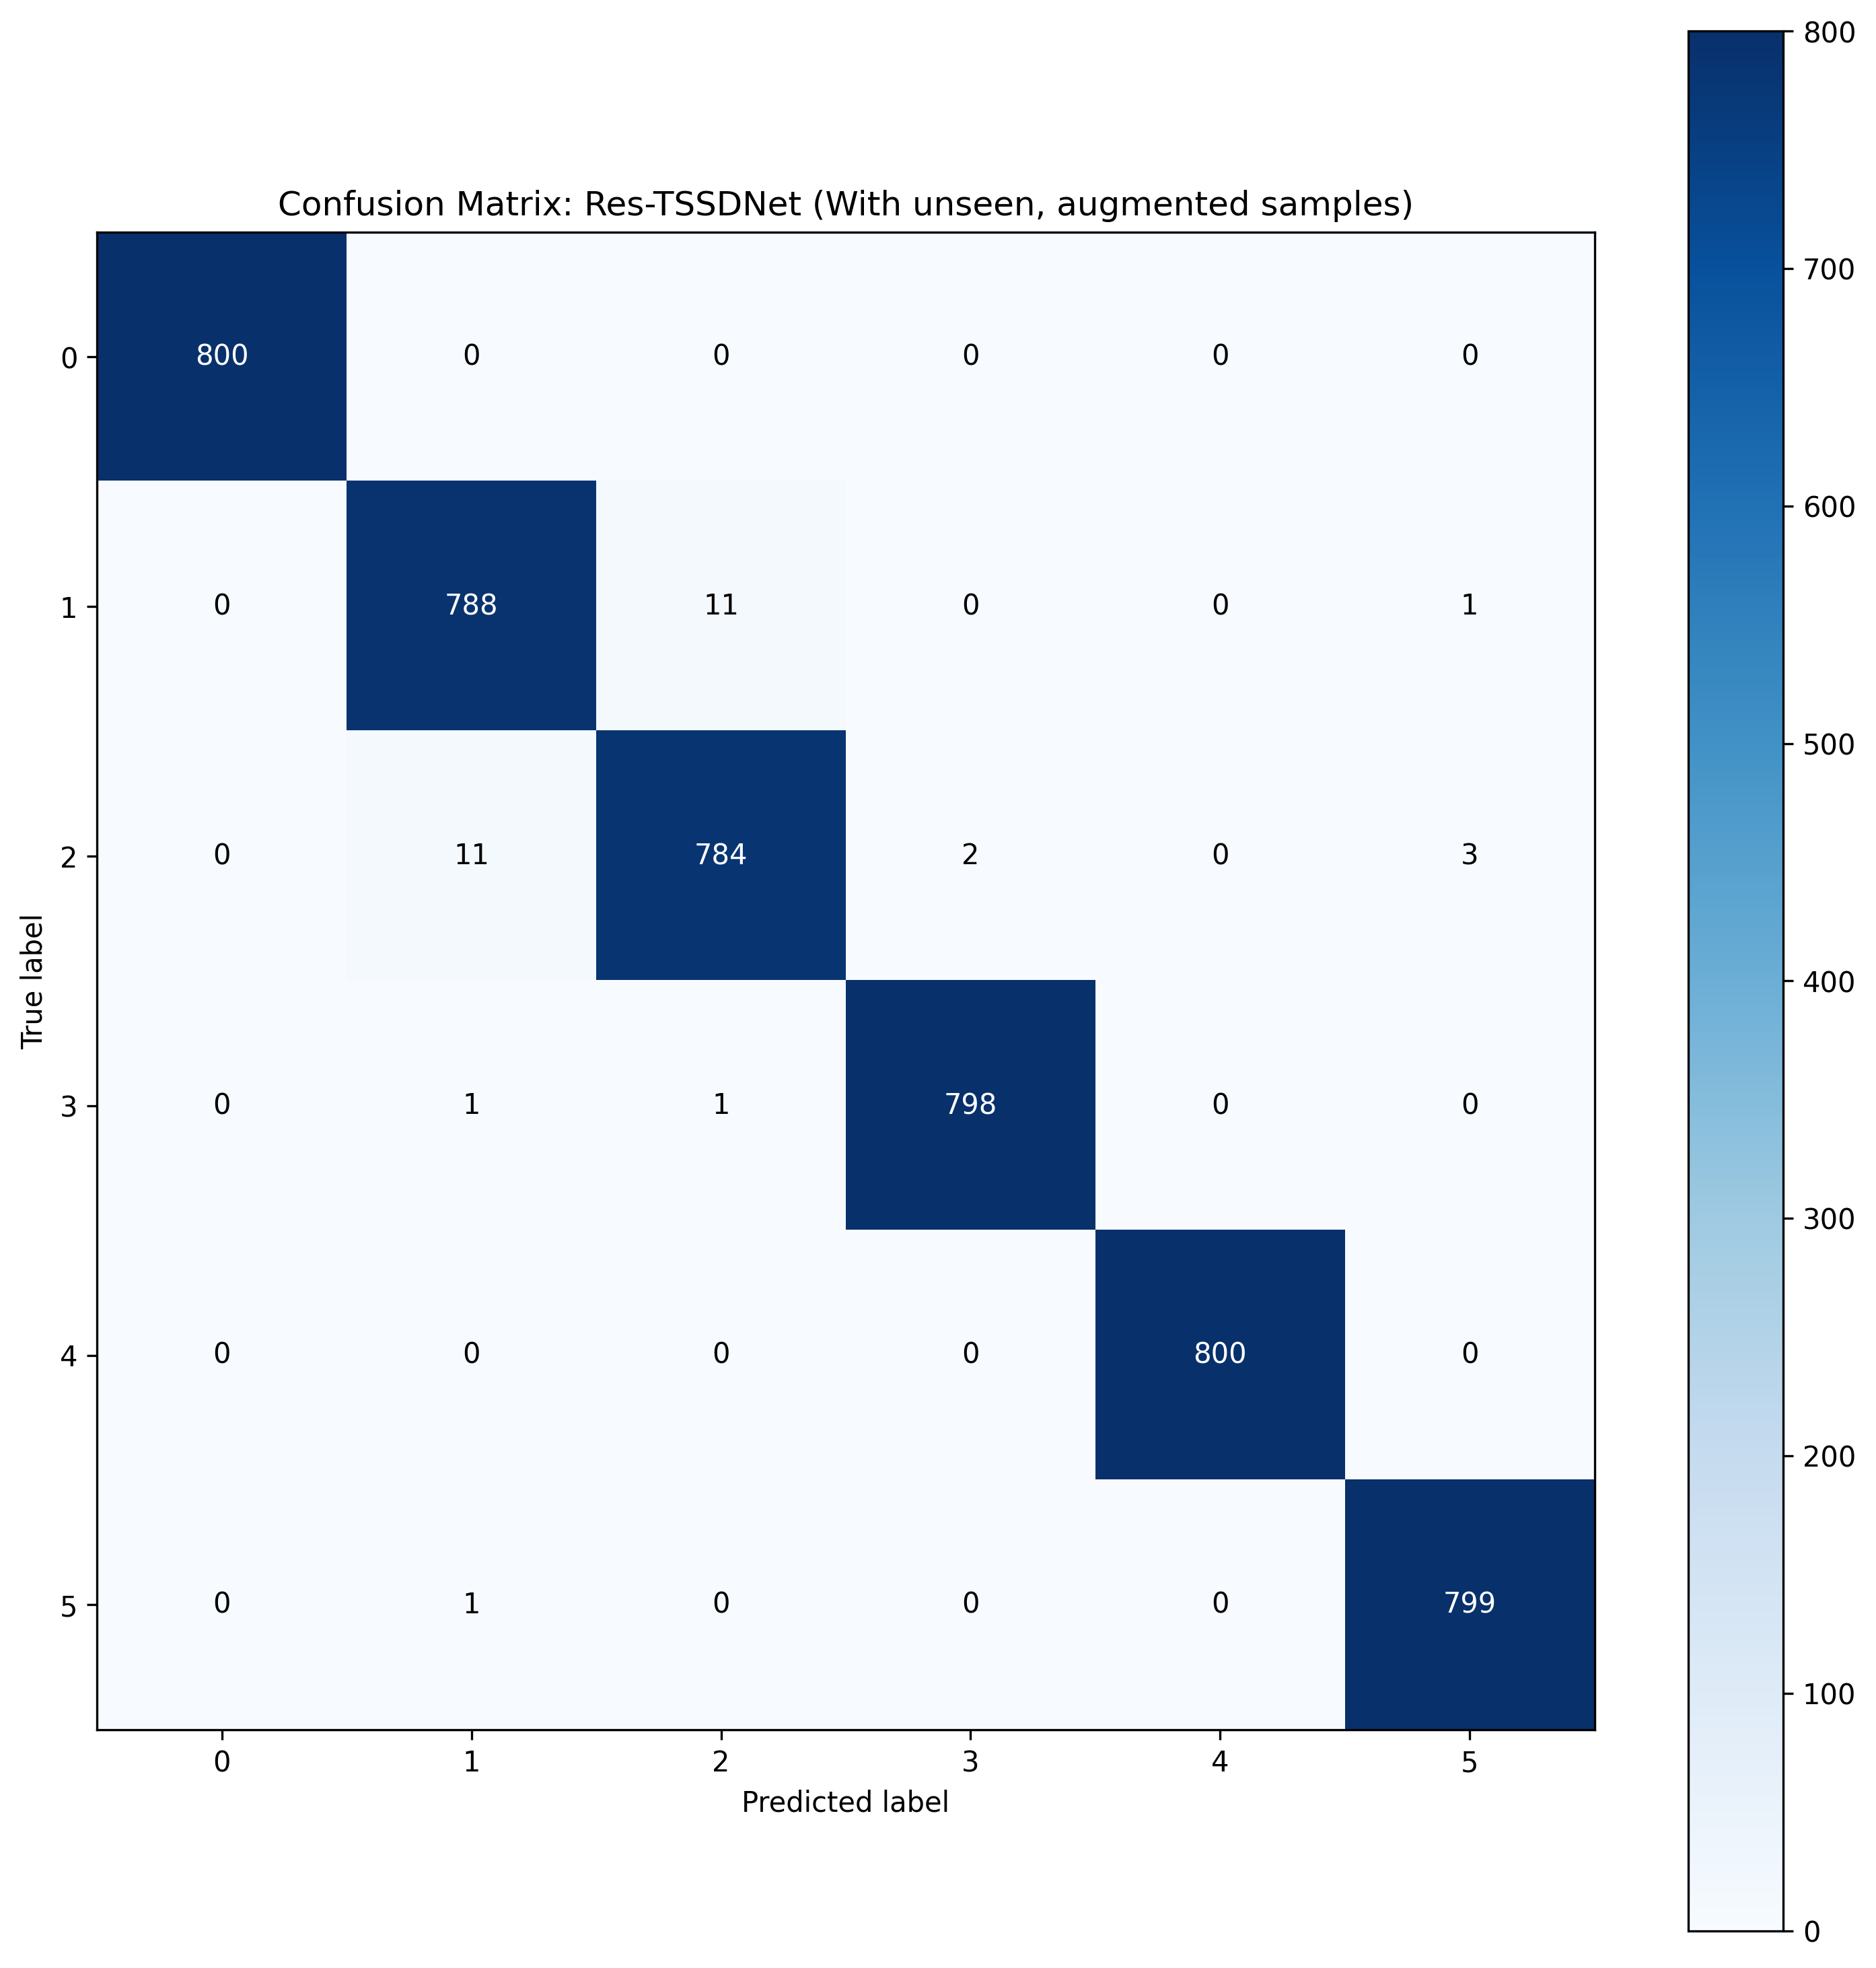

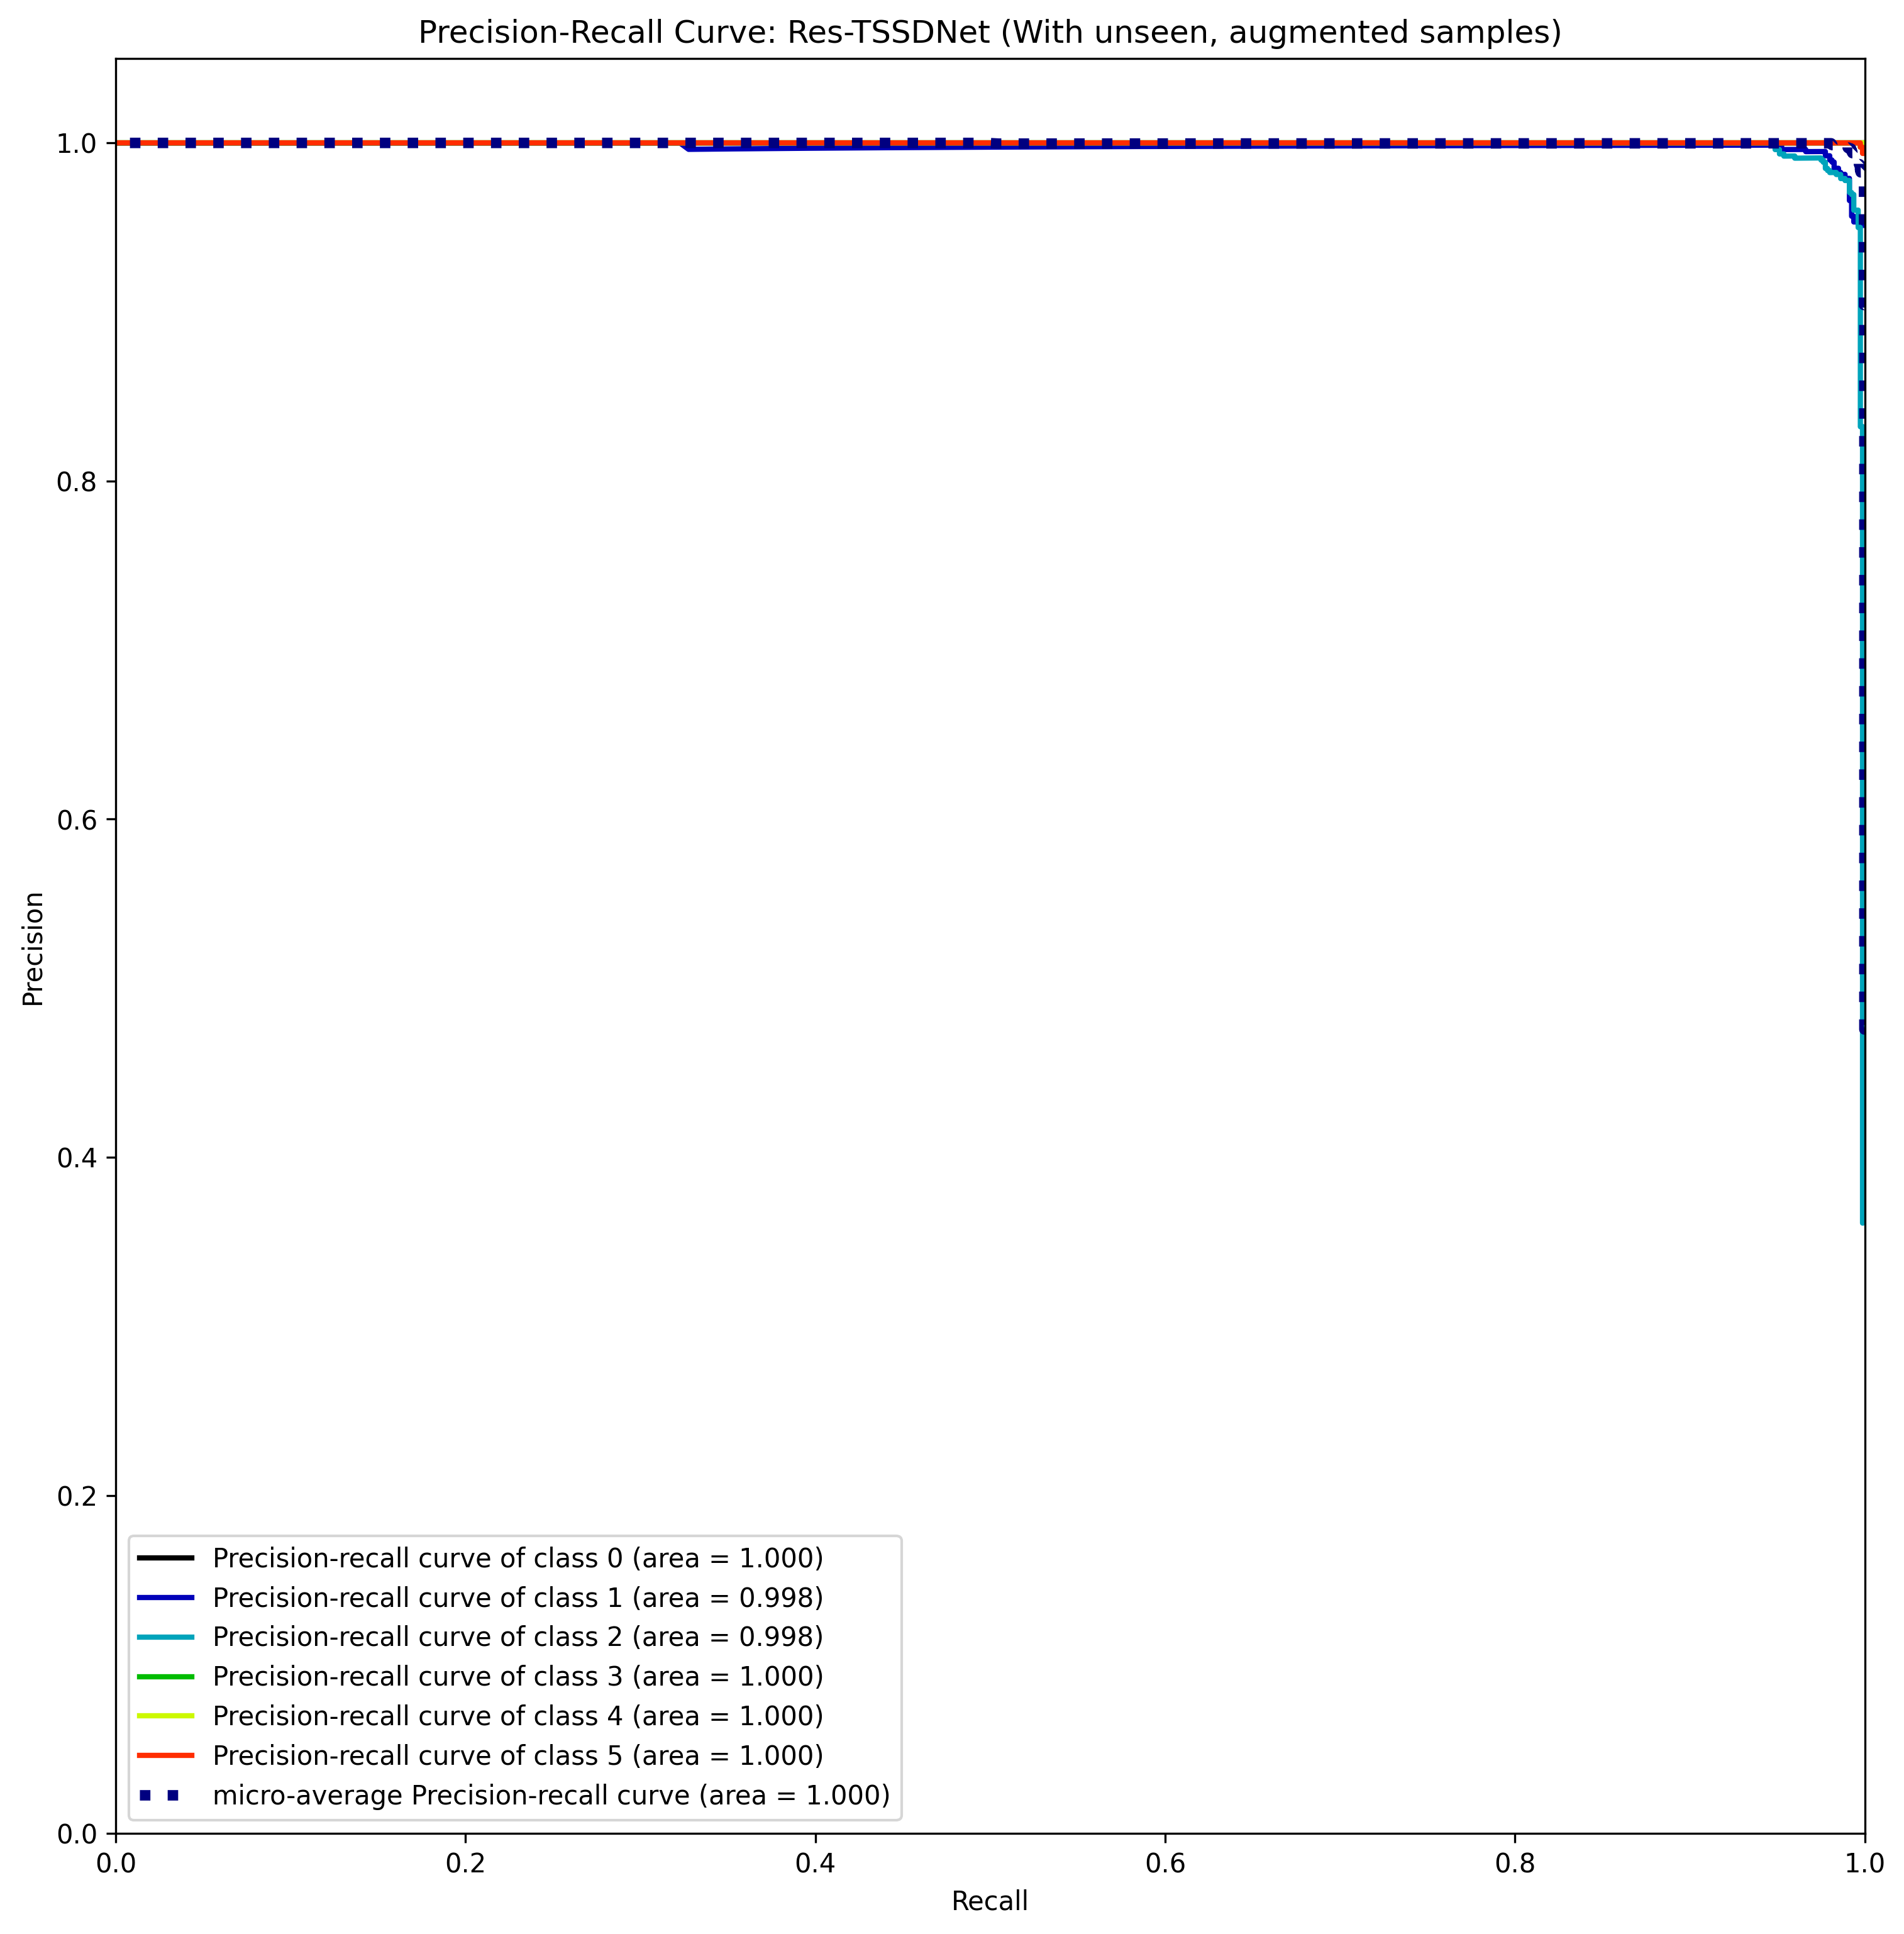

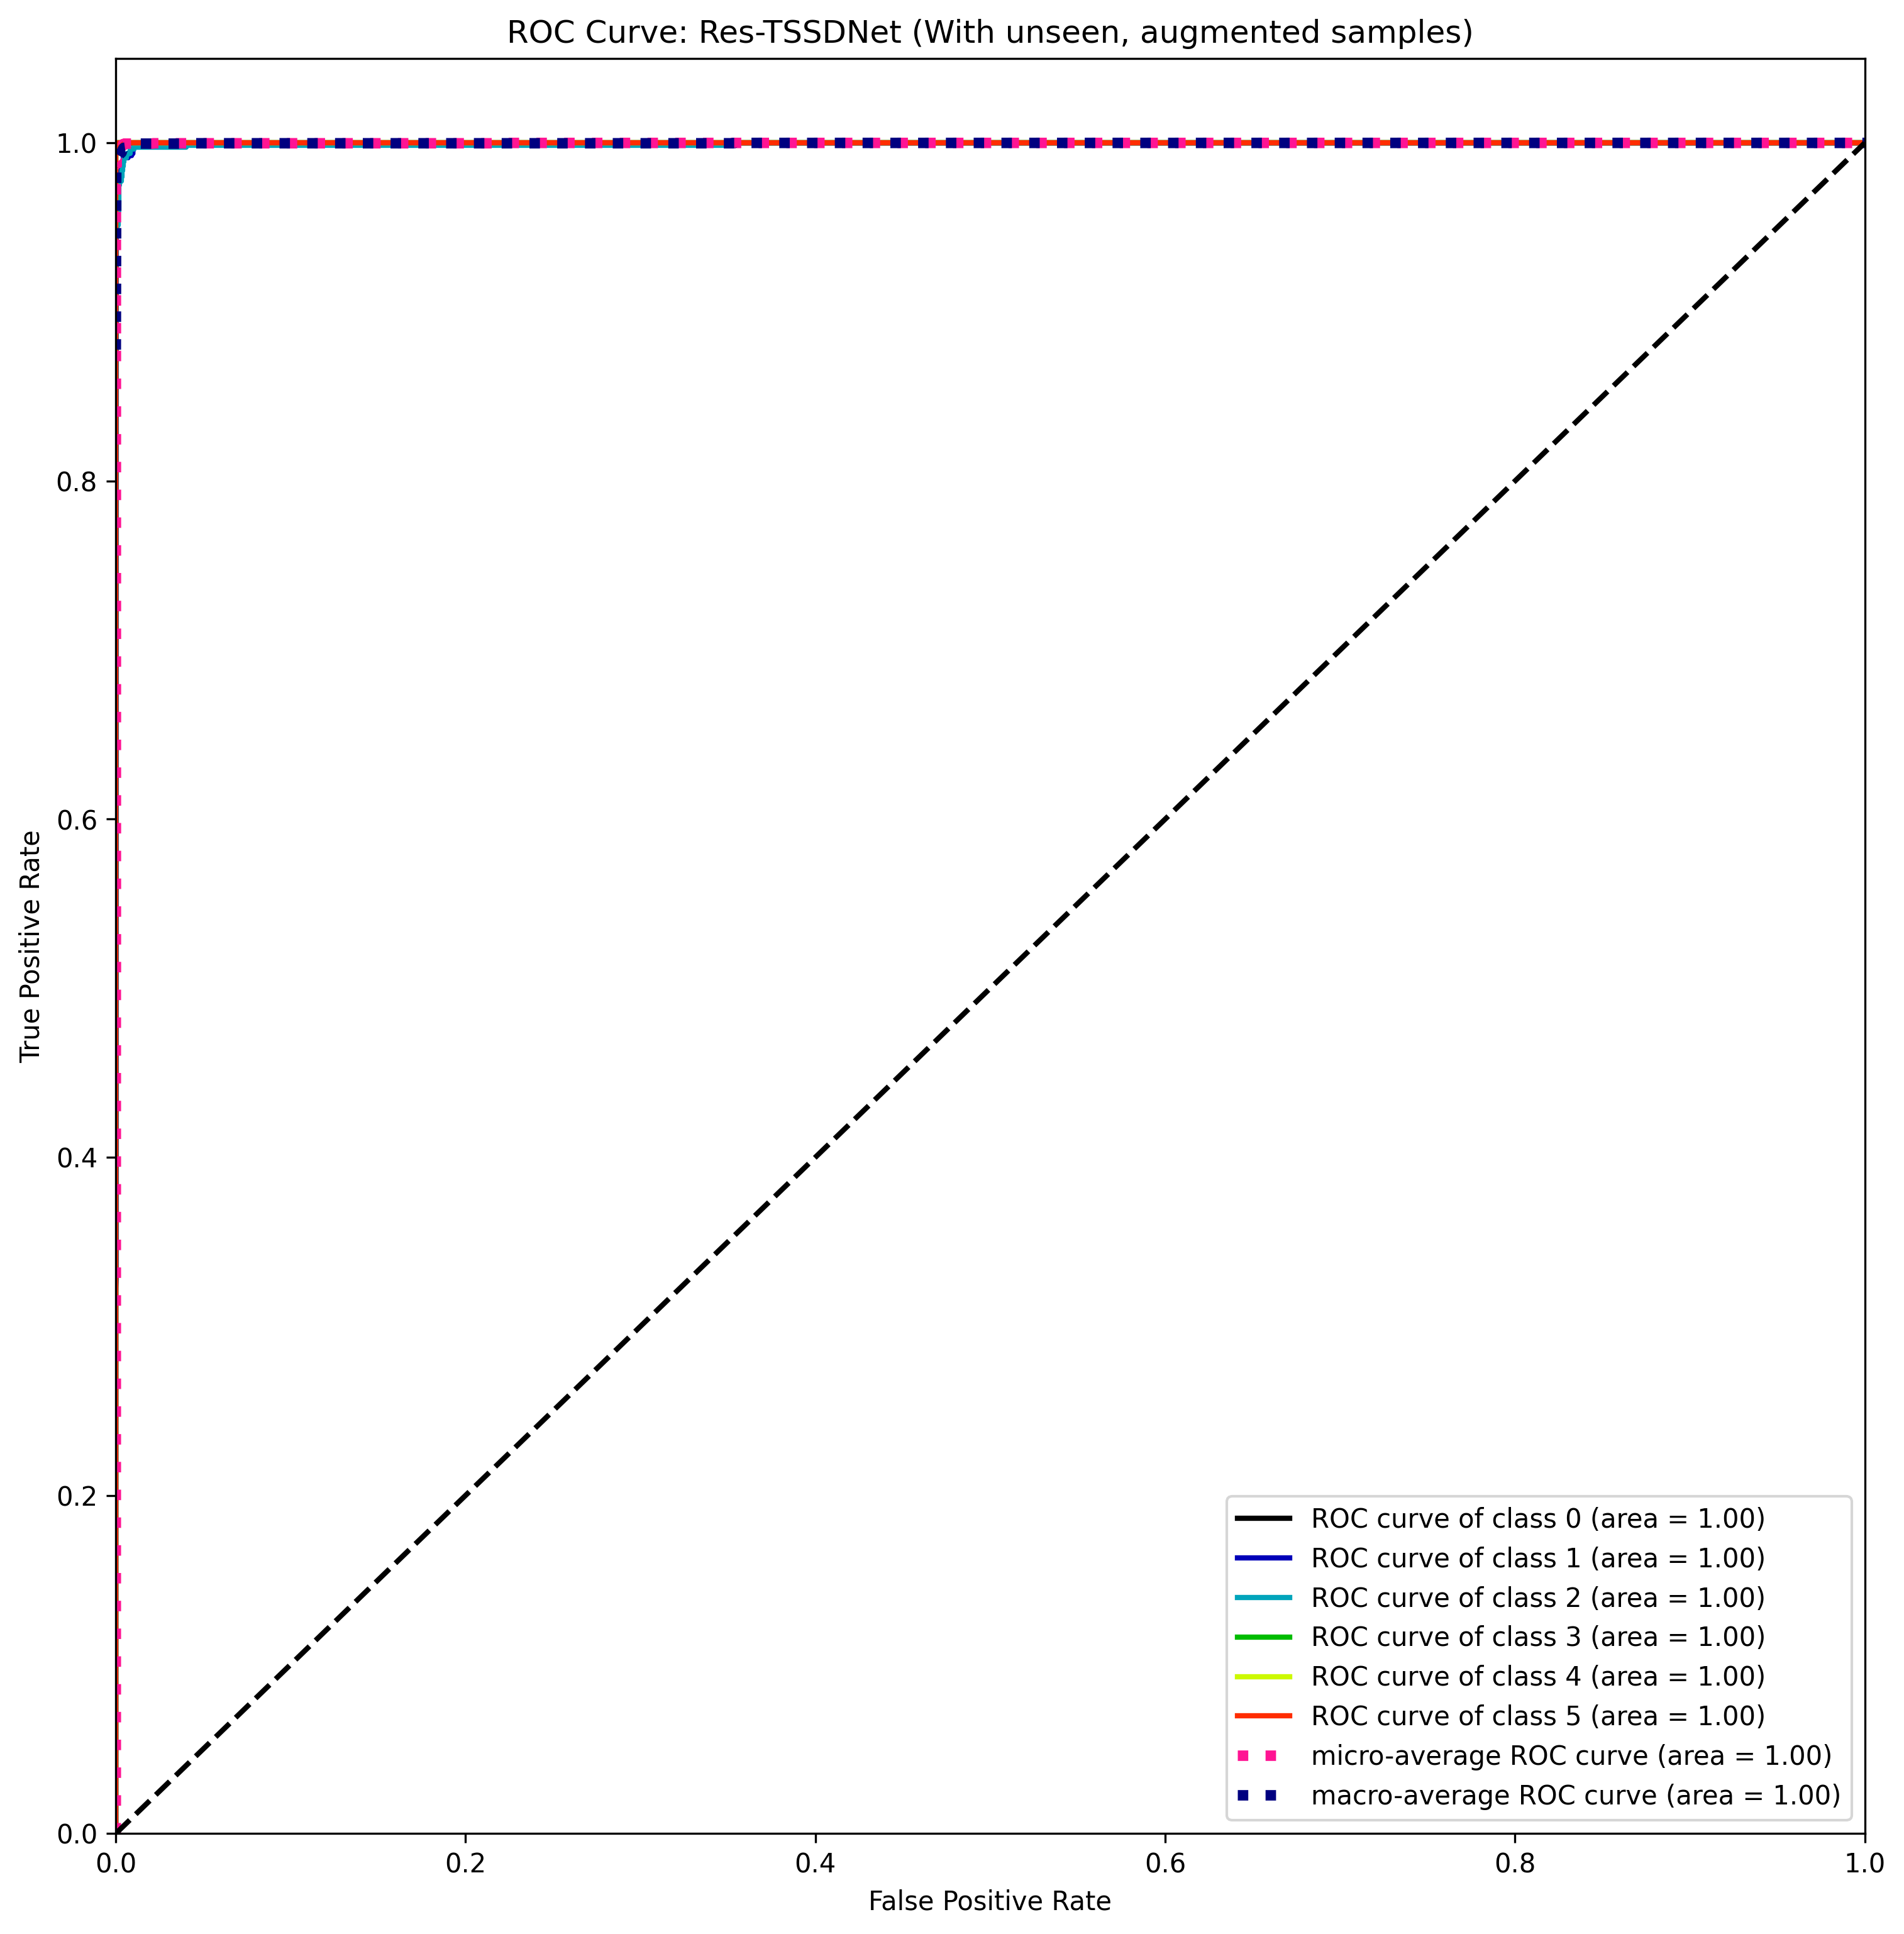

In [12]:
checkpoint = ResTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/res_tssdnet_with_unseen_aug/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_augmented_data=True,
    should_include_unseen_in_training_data=True,
)
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);
print_scores(actual_labels, predictions)
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "res", "with_unseen_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Res-TSSDNet (With unseen, augmented samples)",
    save_path=fig_save_path
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 63/63 [00:09<00:00,  6.35it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)



    F1 Score: 0.99
    Accuracy: 0.99
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


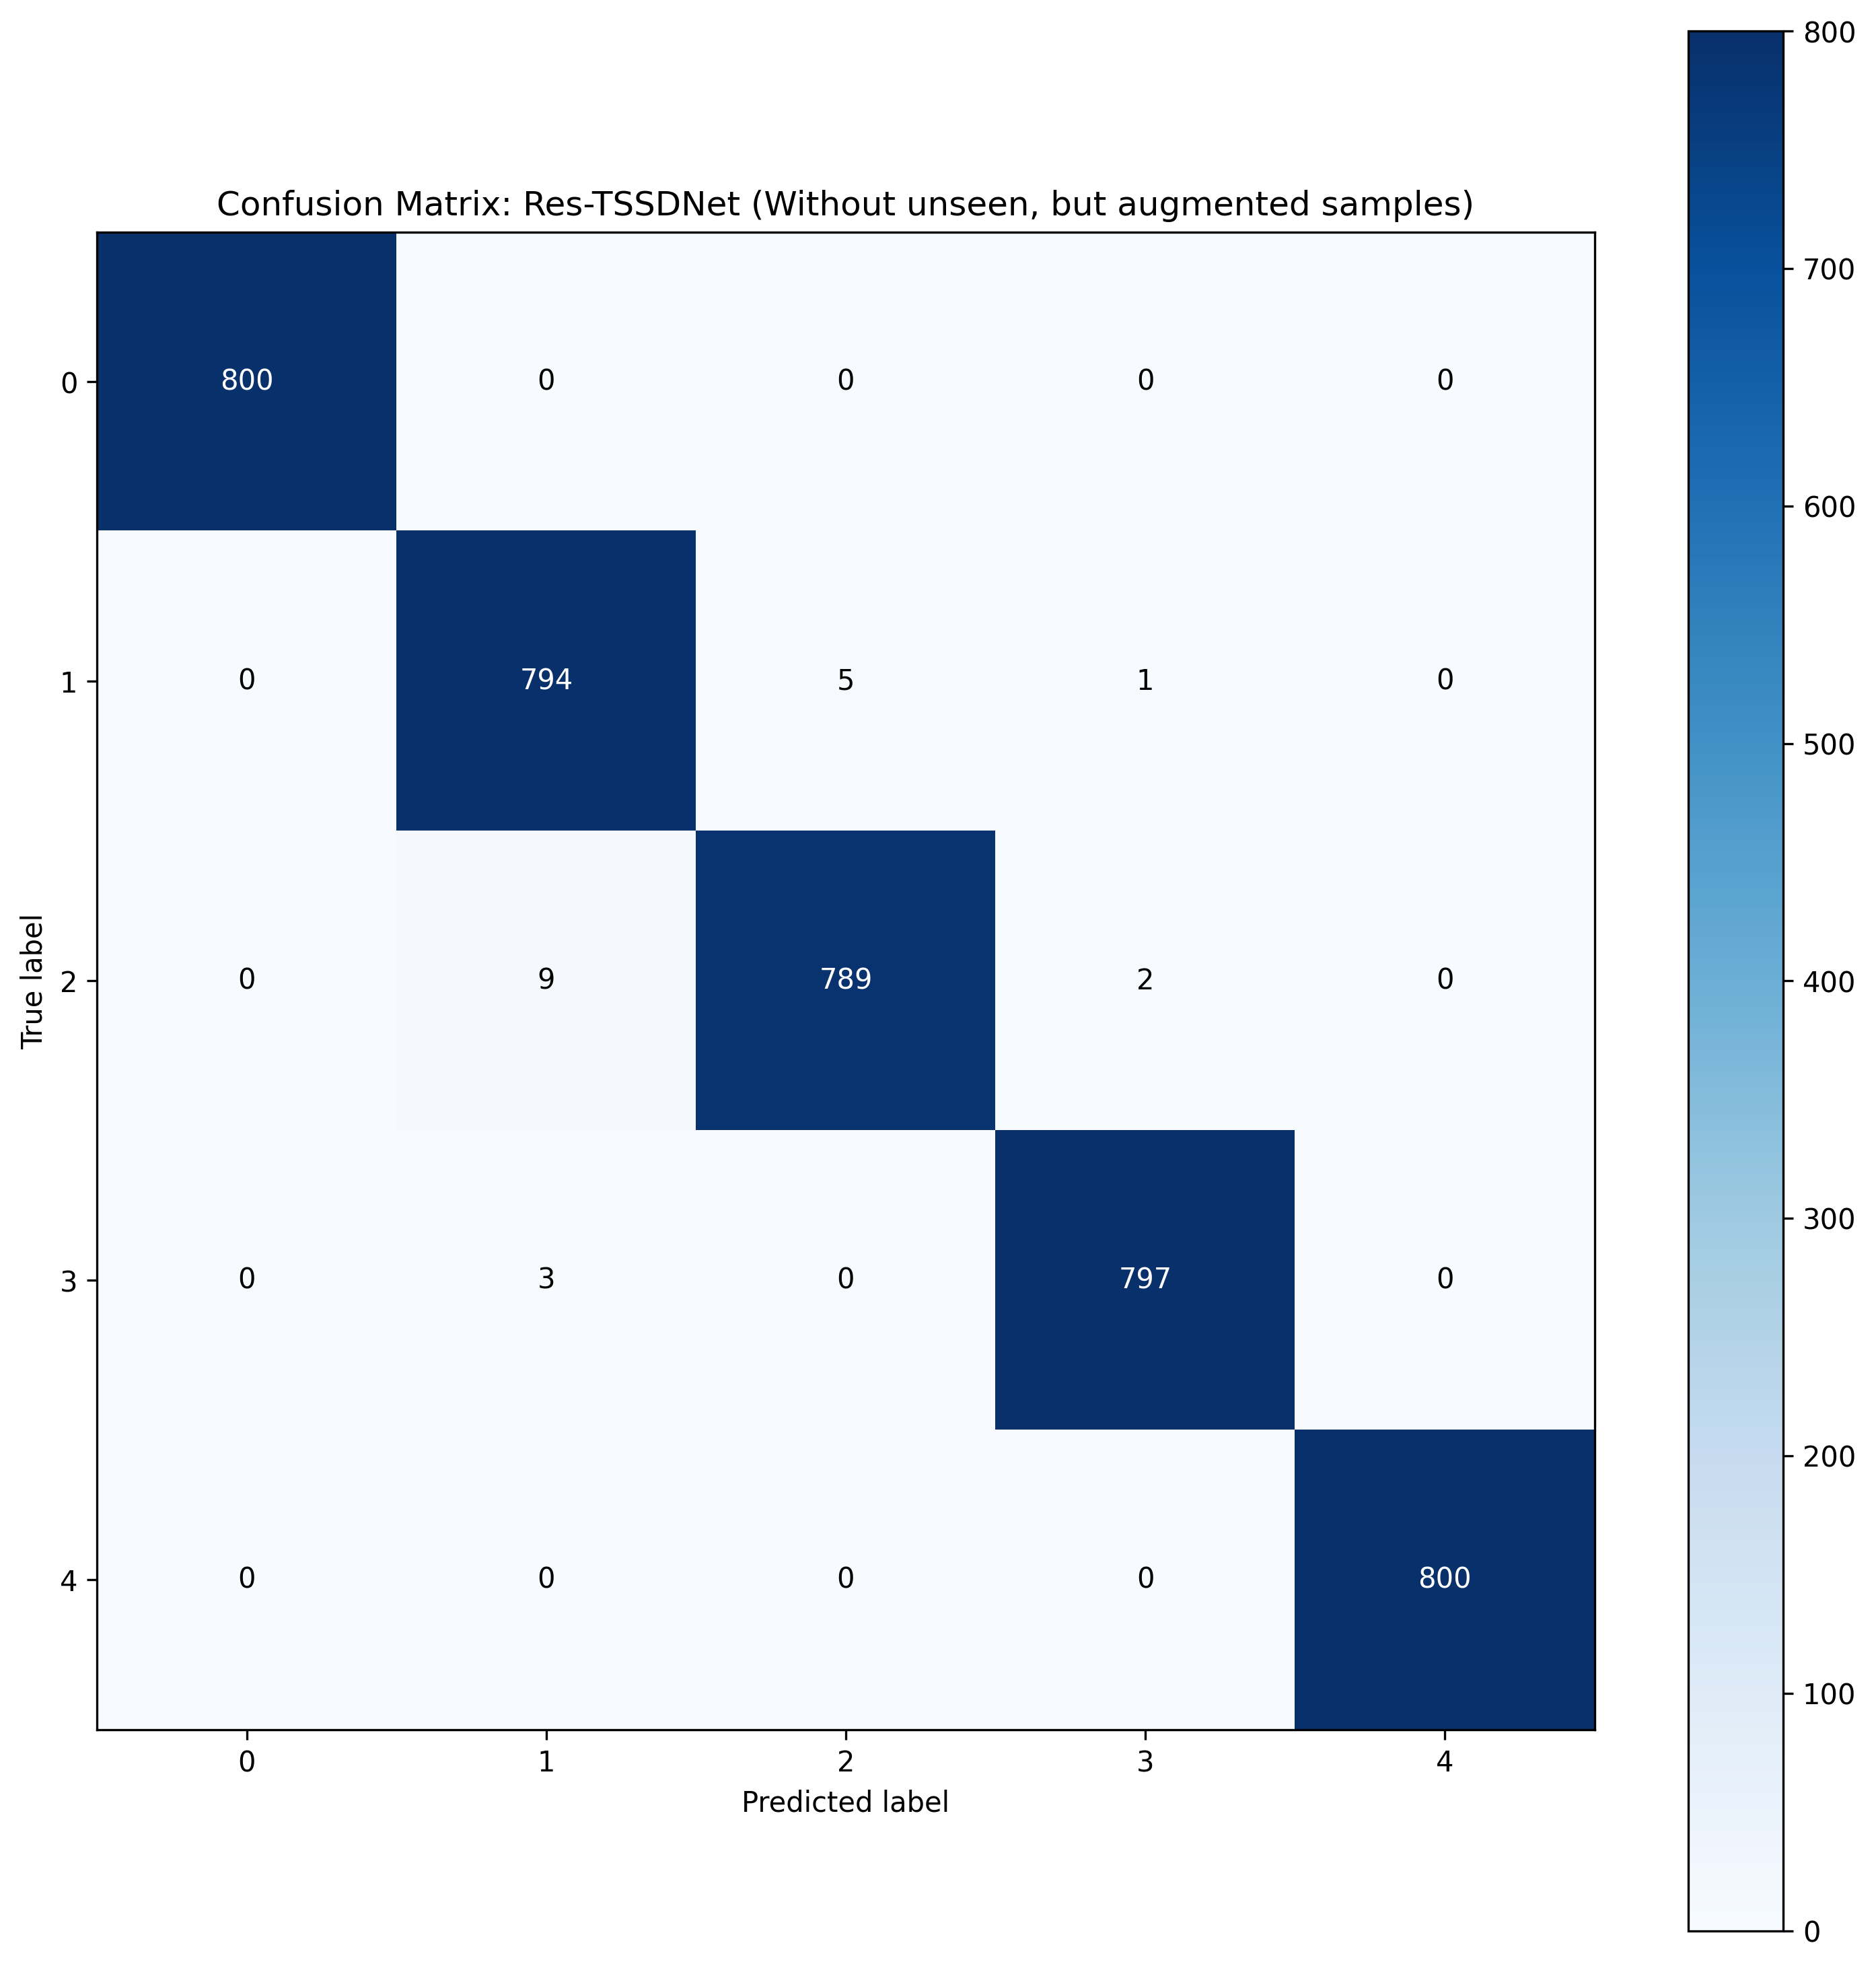

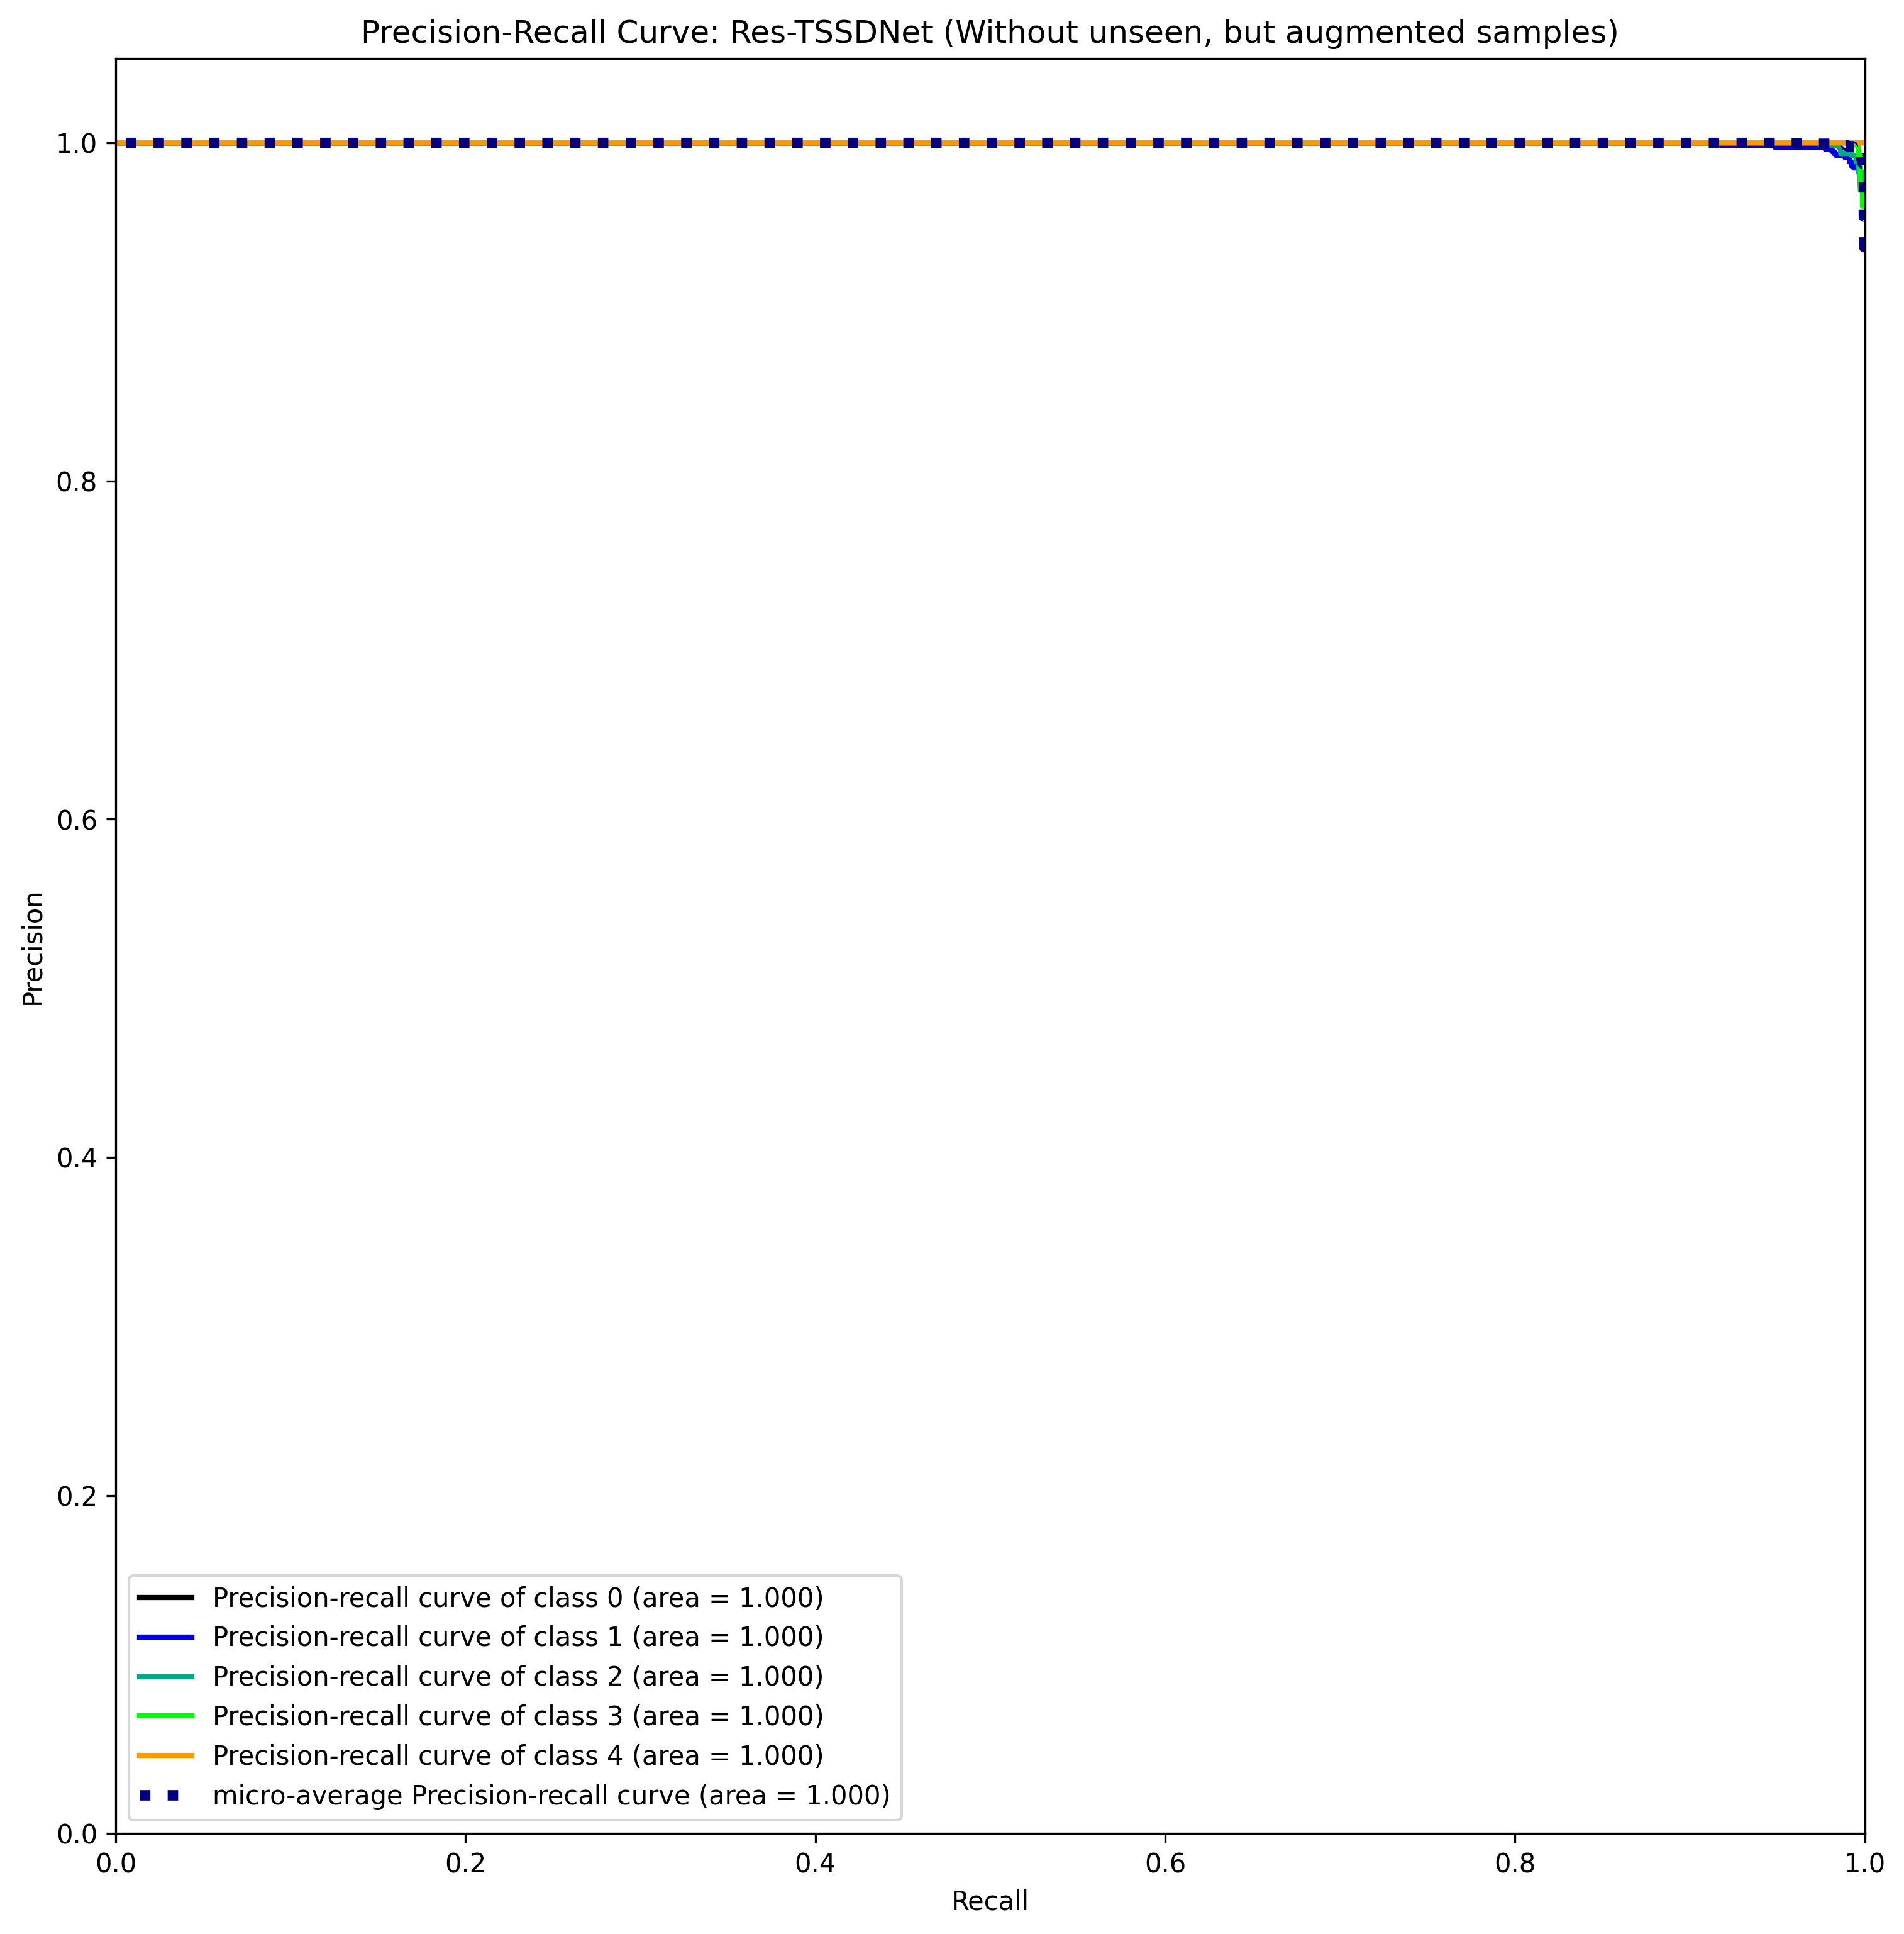

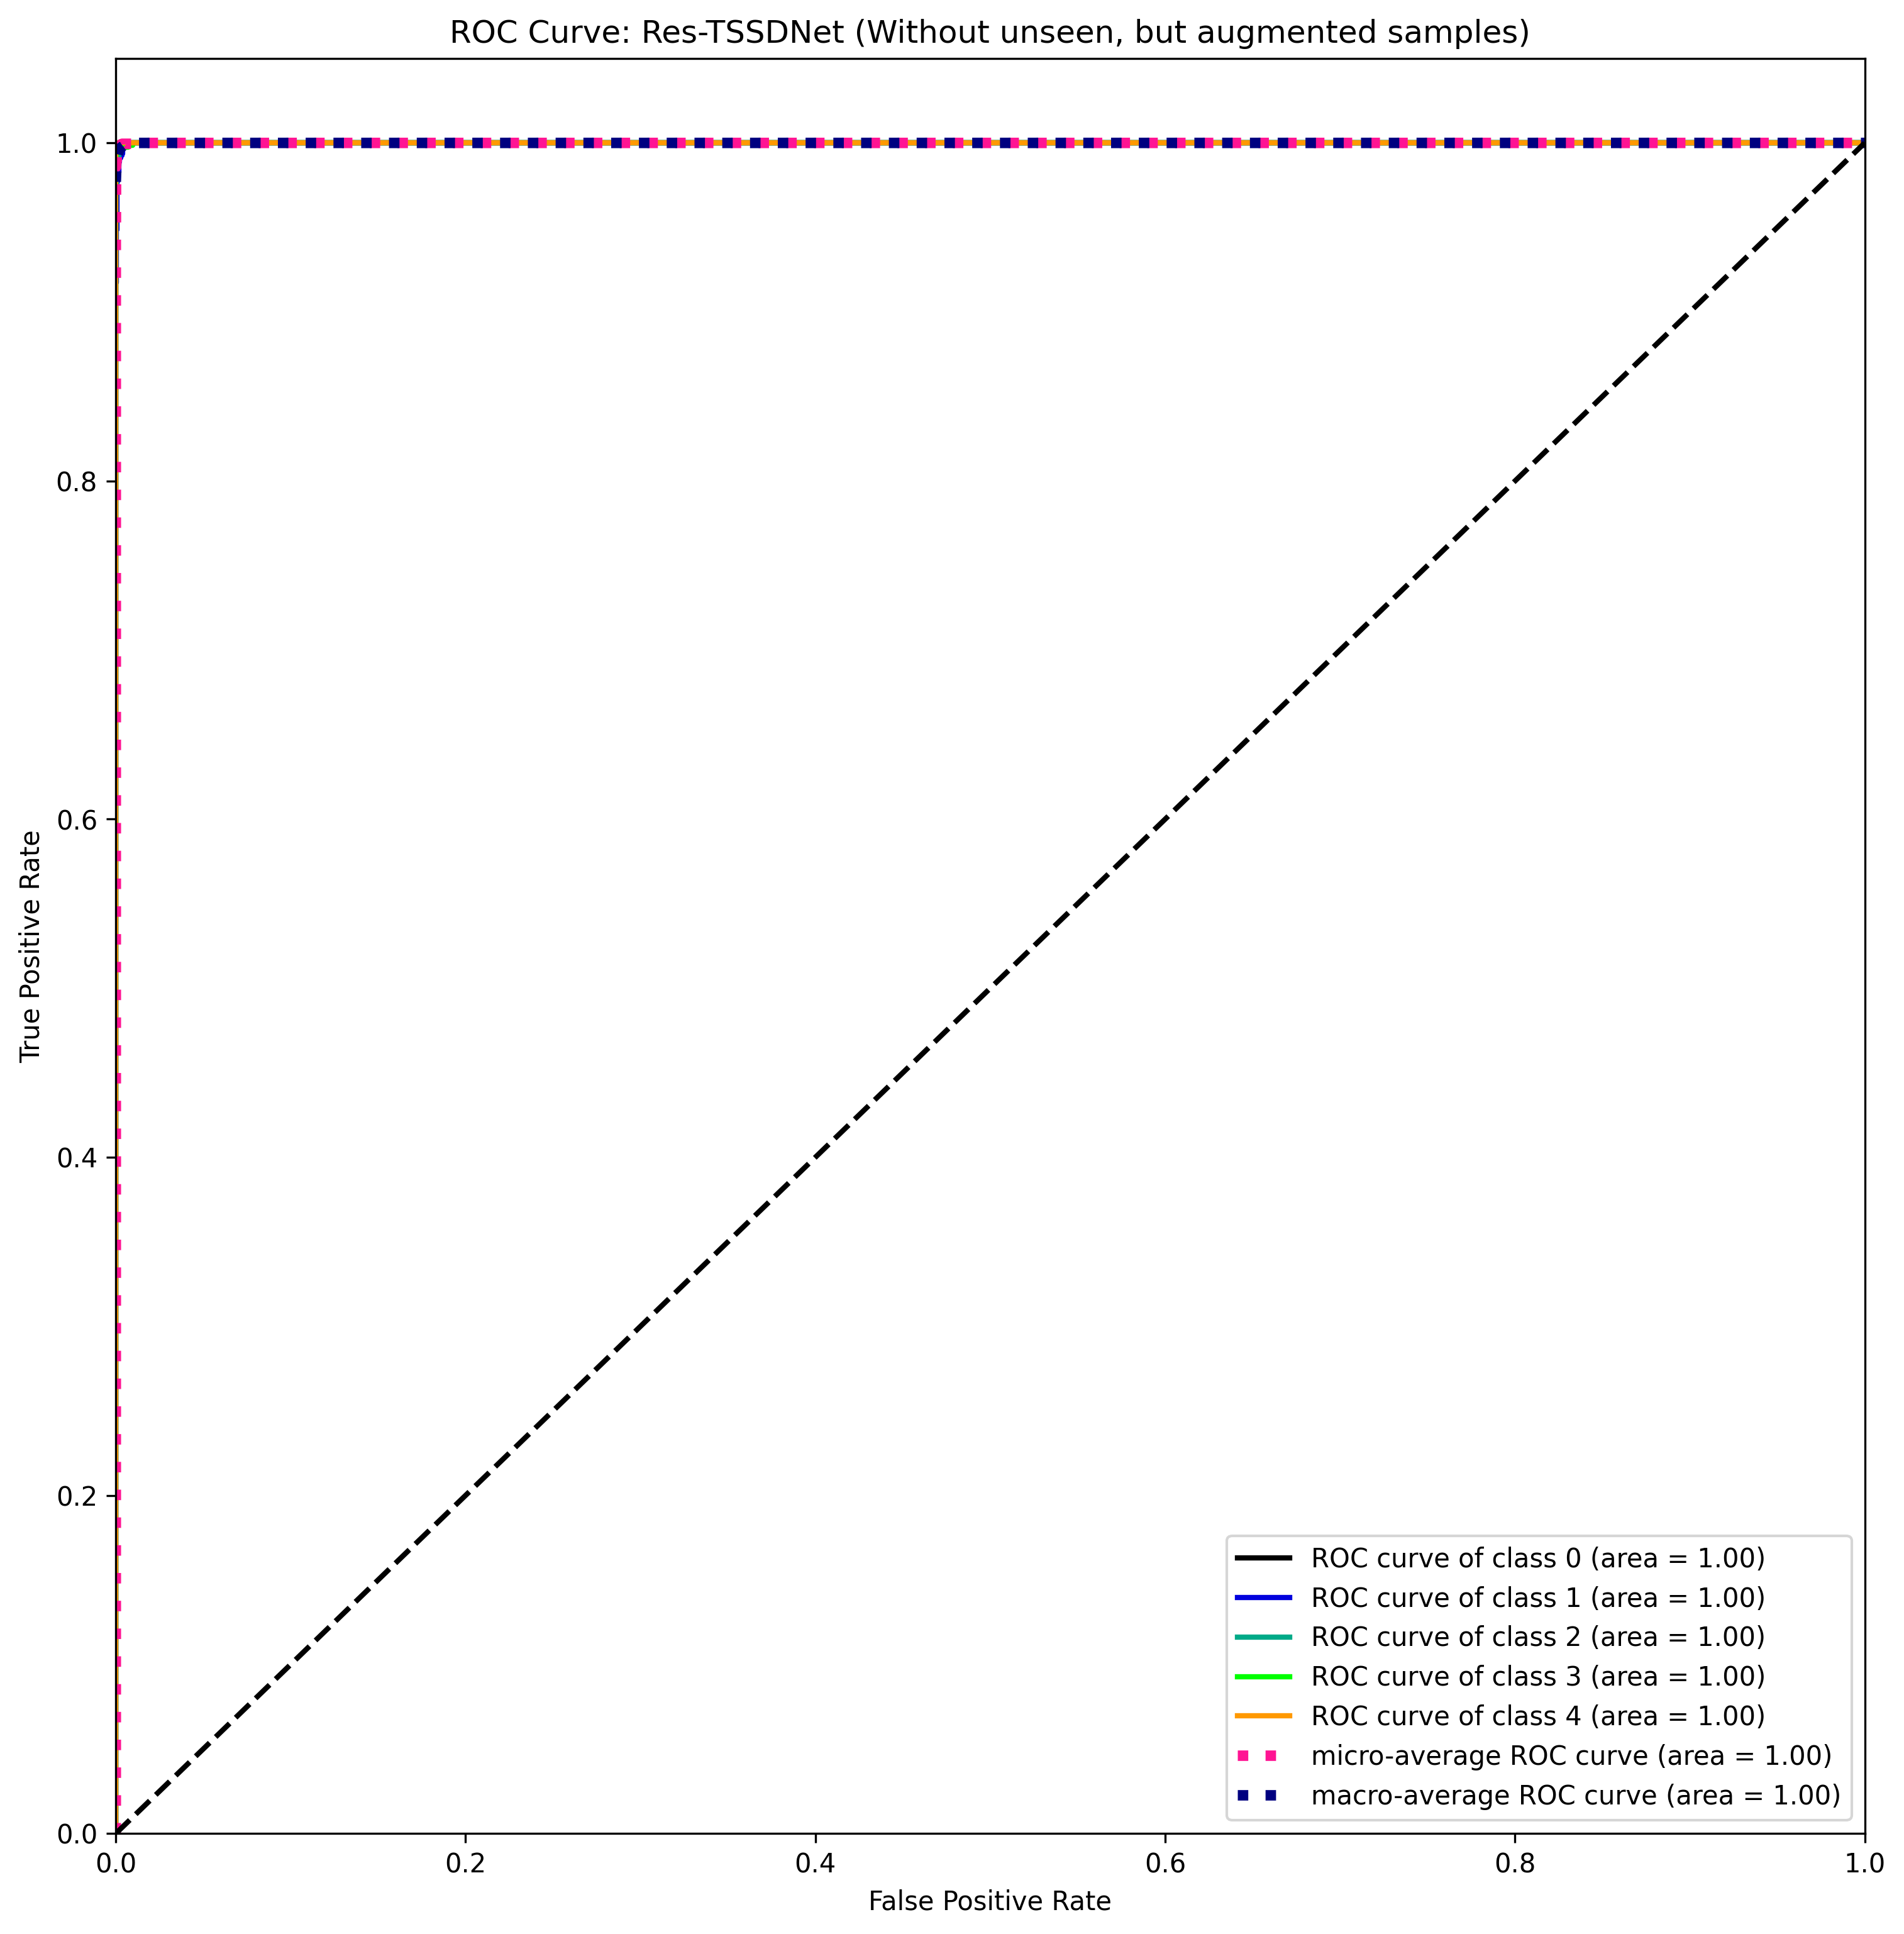

In [13]:
checkpoint = ResTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/res_tssdnet_without_unseen_aug/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_augmented_data=True,
    should_include_unseen_in_training_data=False,
)
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);
print_scores(actual_labels, predictions)
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "res", "without_unseen_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Res-TSSDNet (Without unseen, but augmented samples)",
    save_path=fig_save_path
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 19/19 [00:02<00:00,  8.66it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)



    F1 Score: 1.00
    Accuracy: 1.00
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


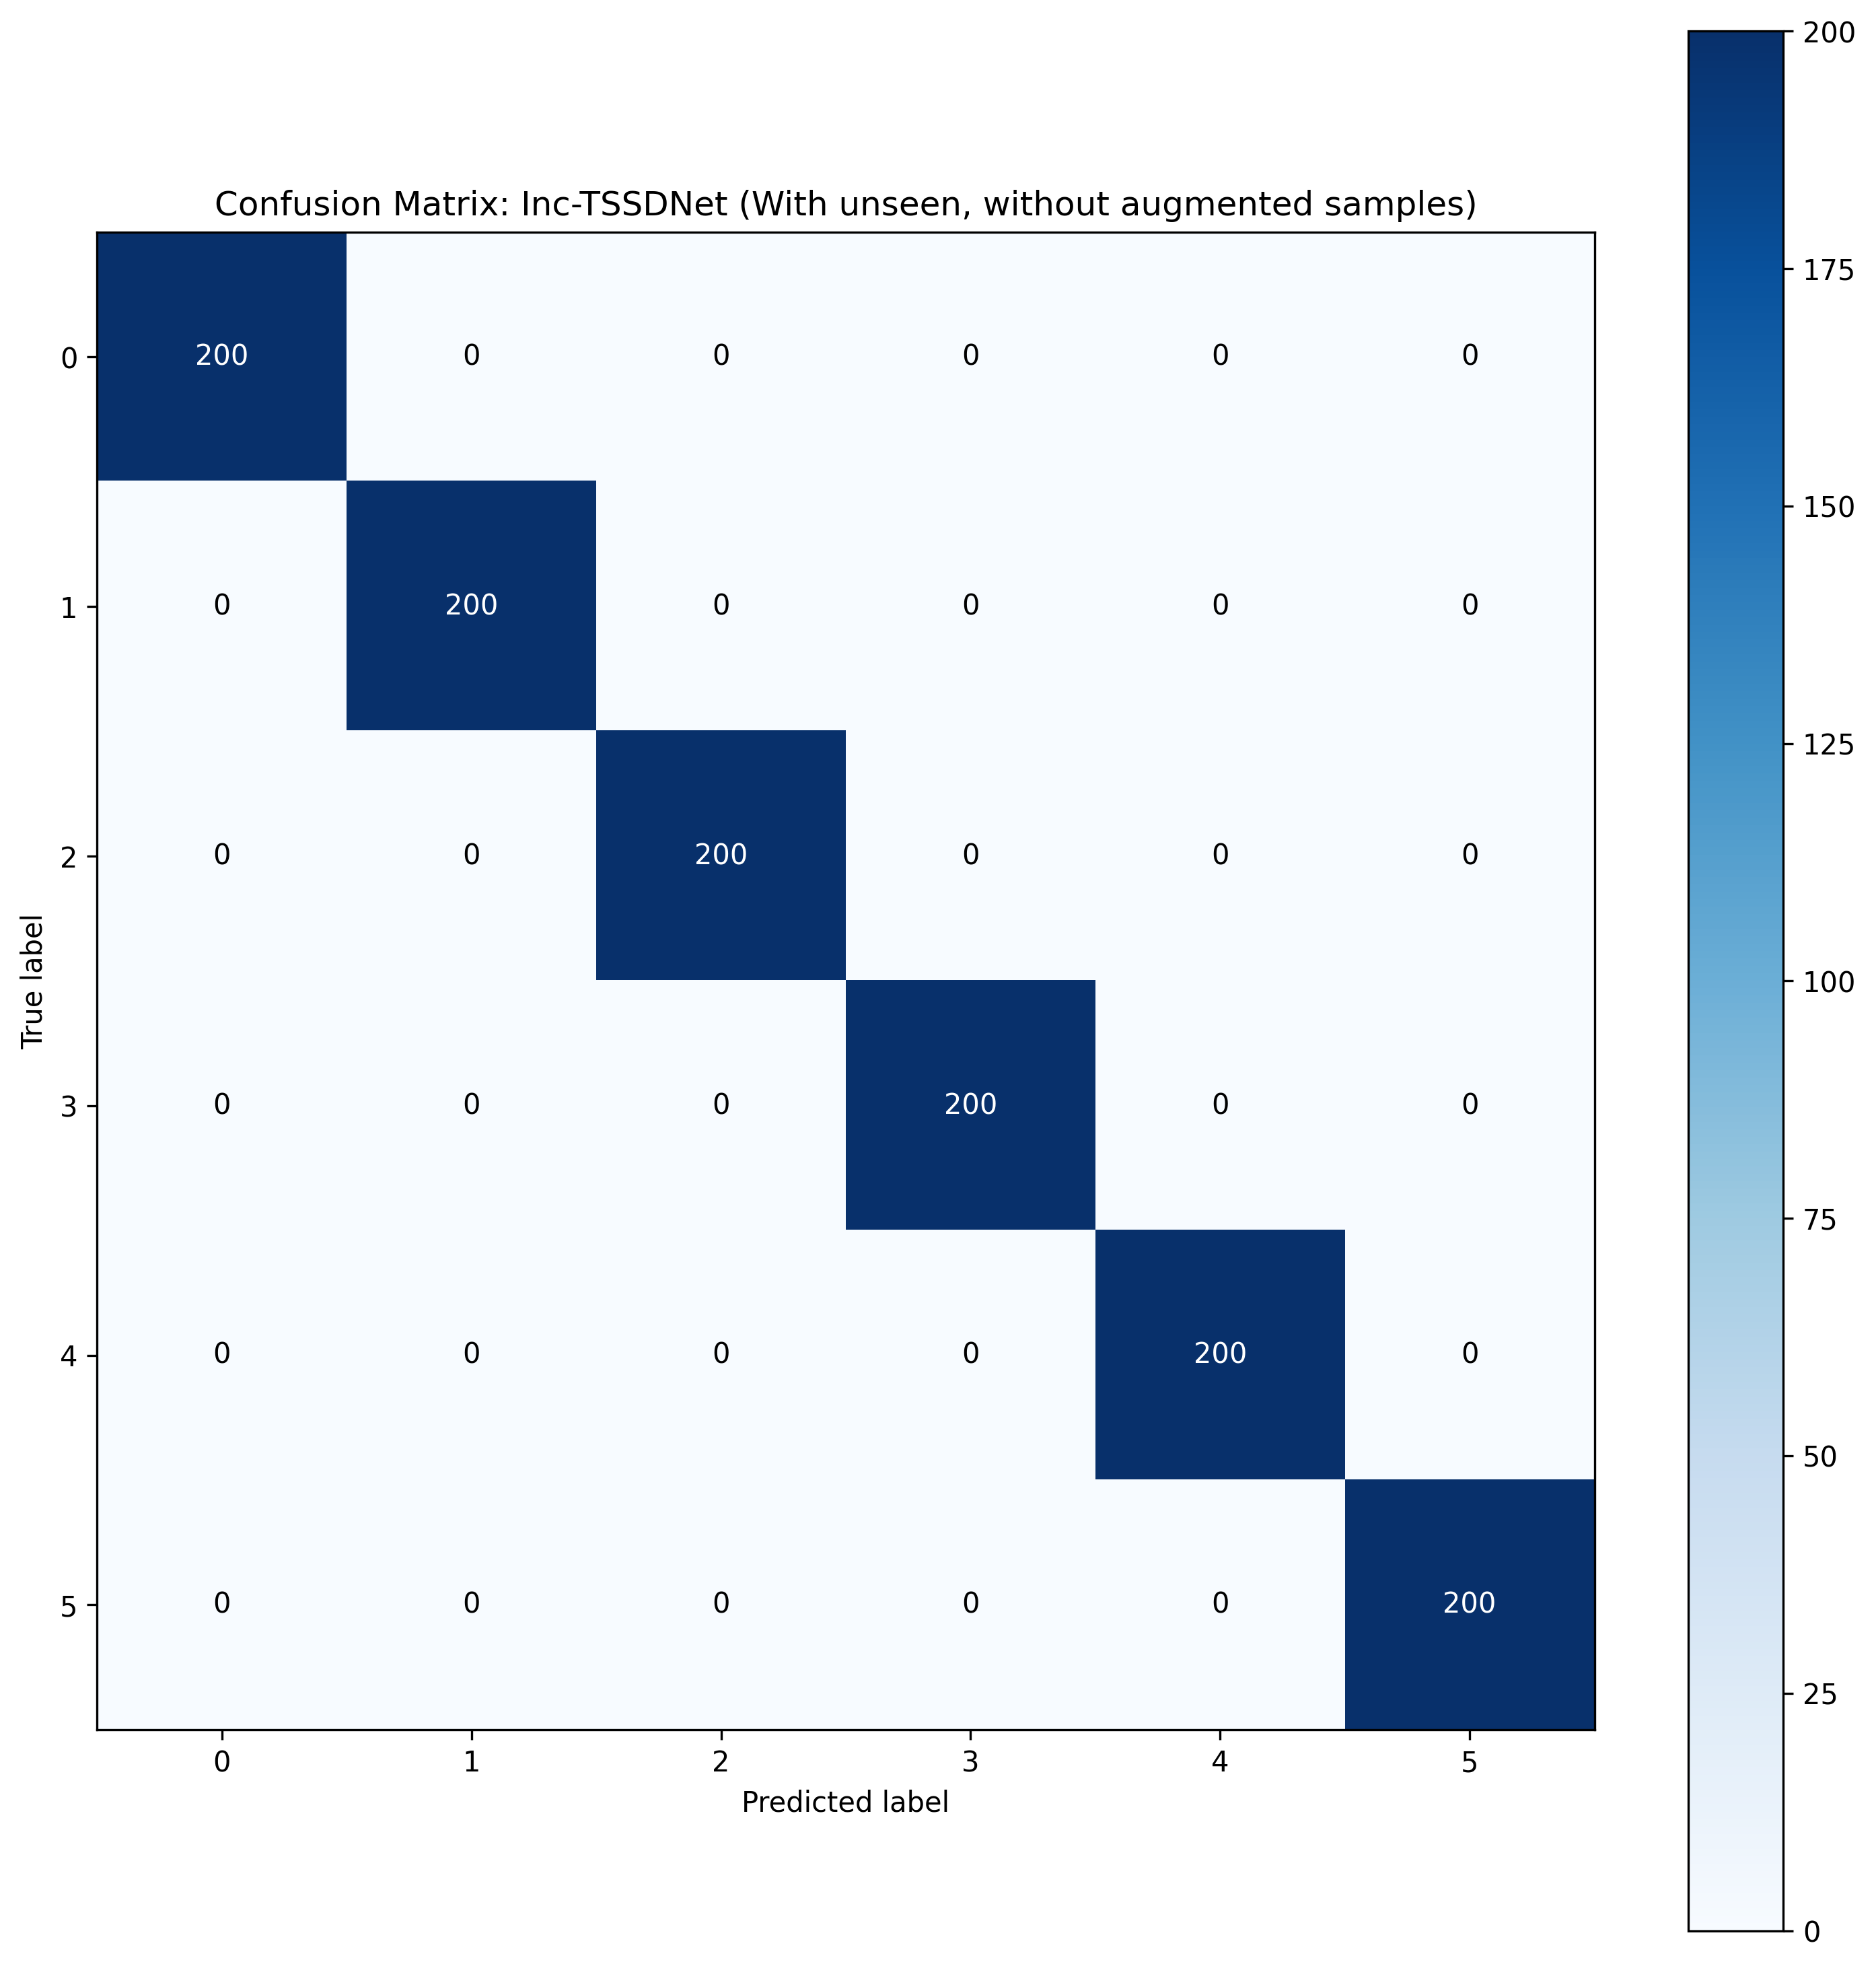

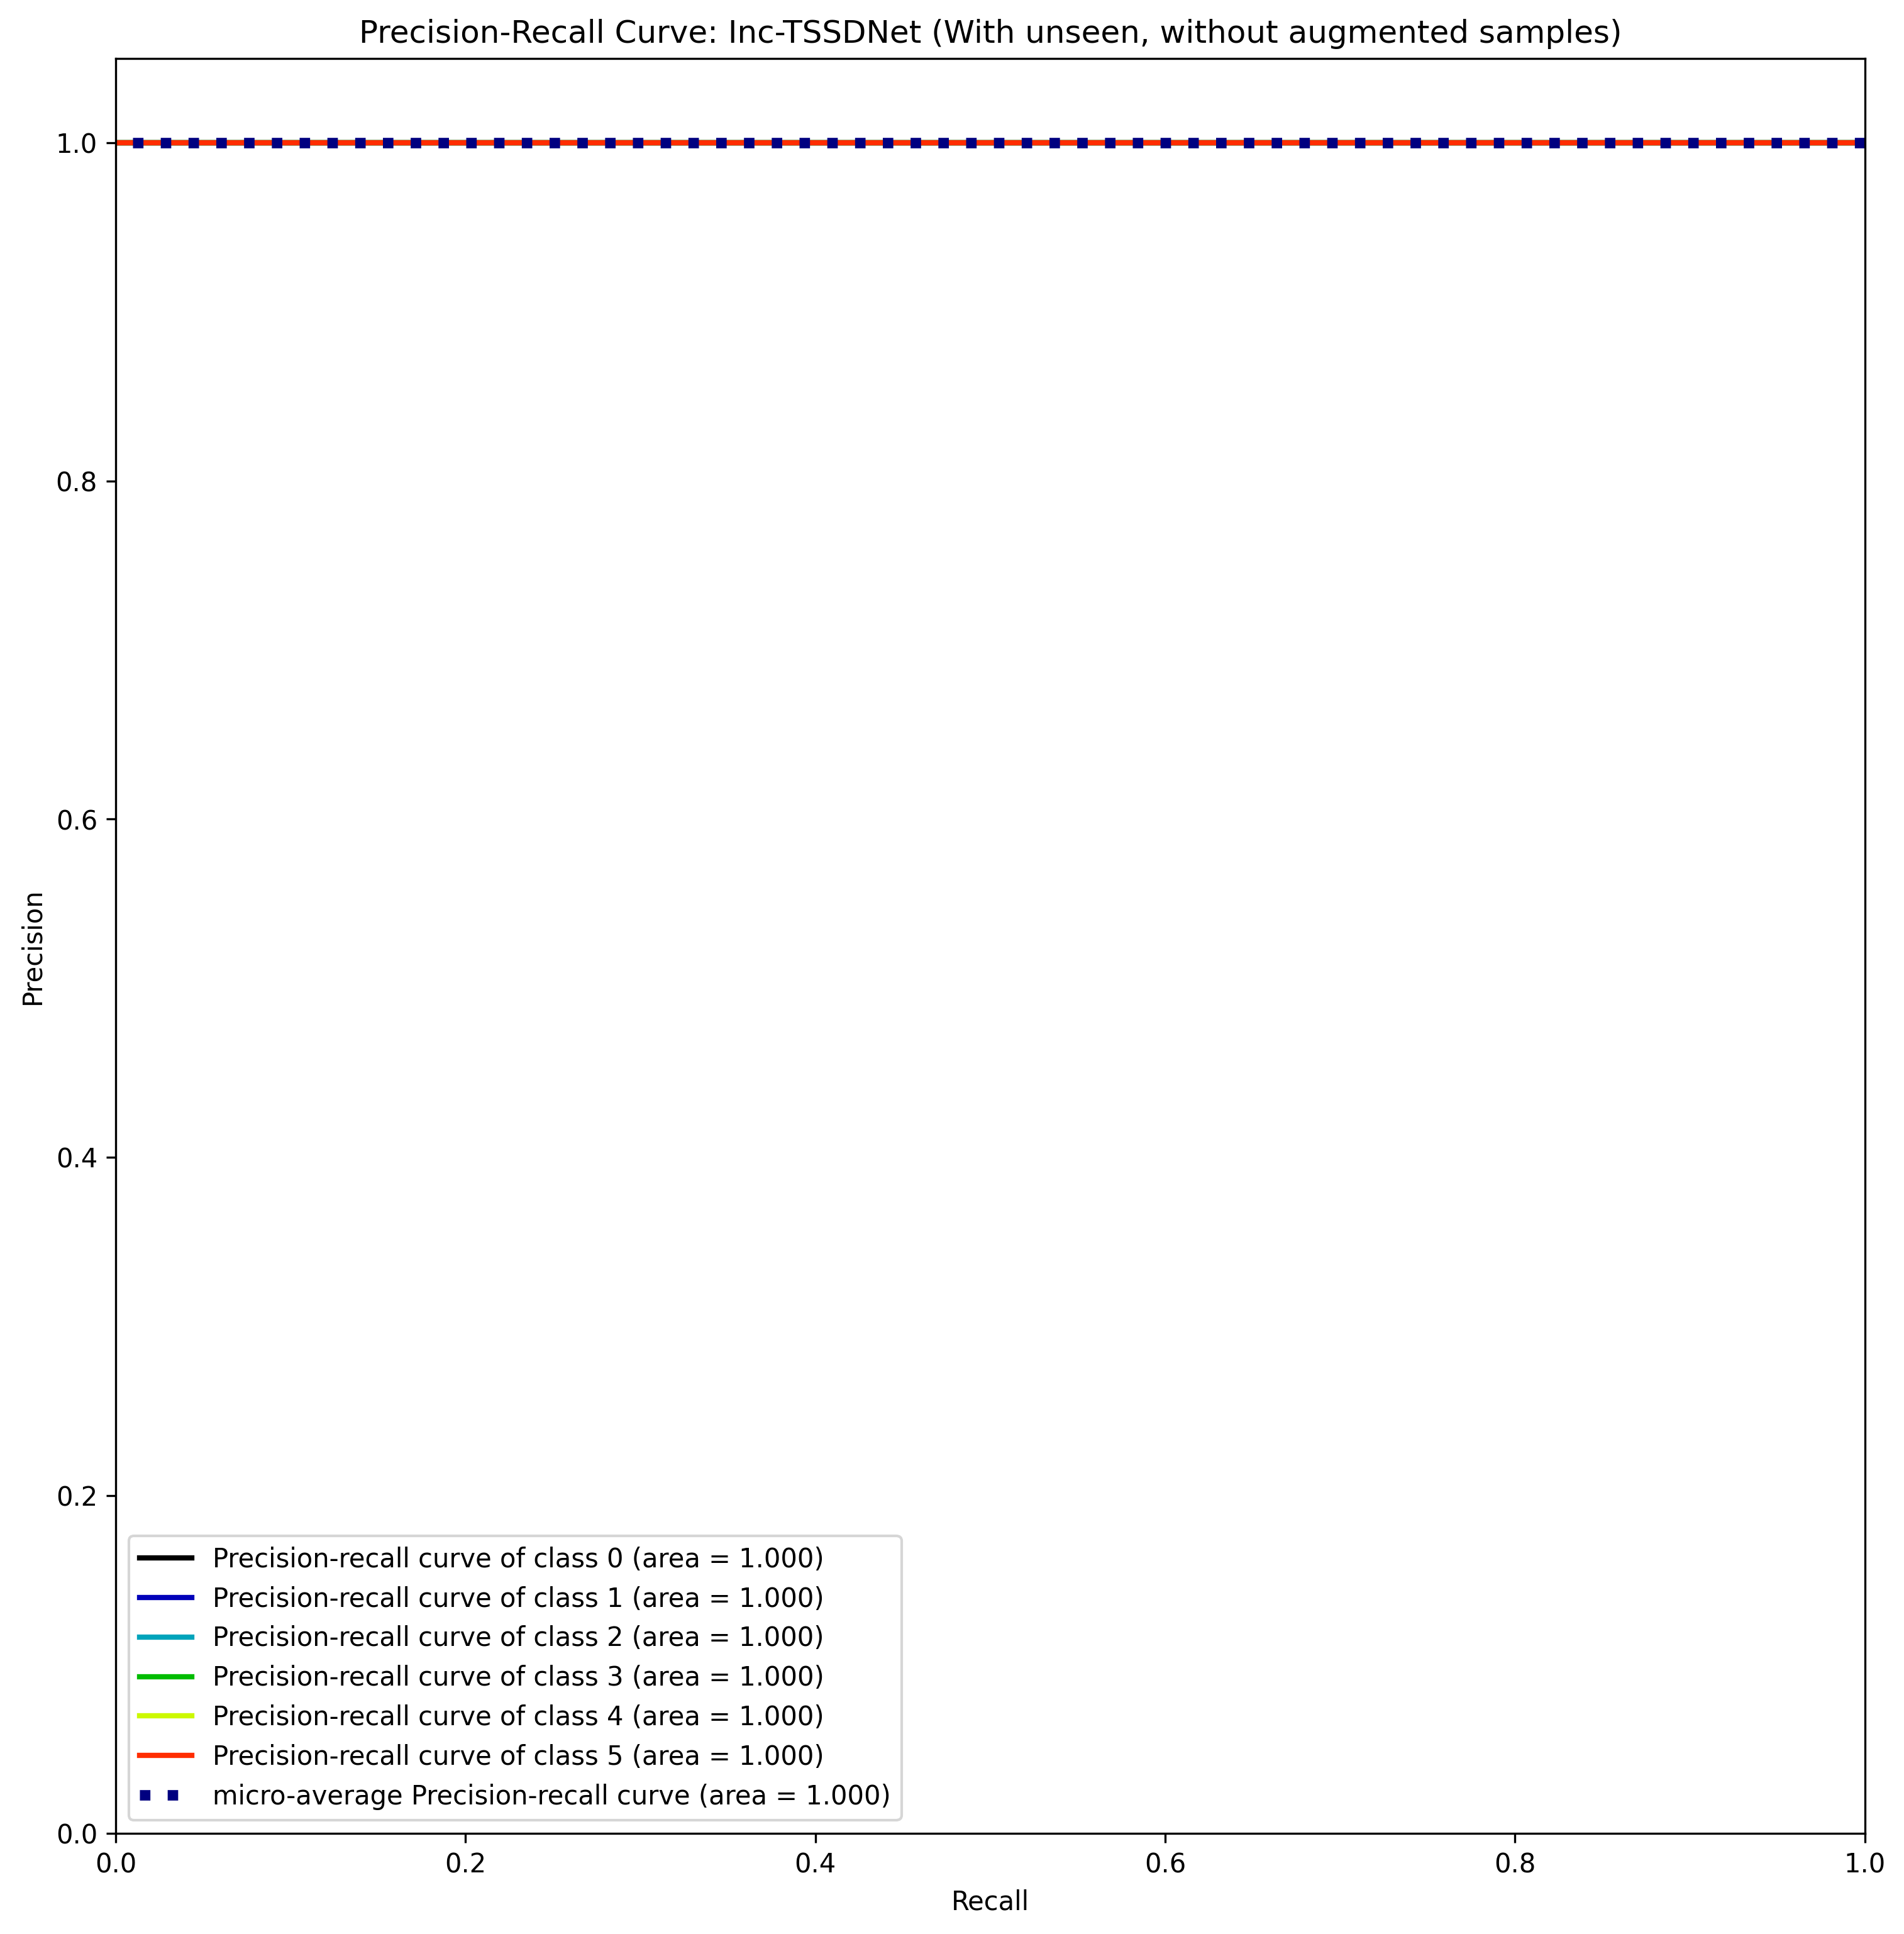

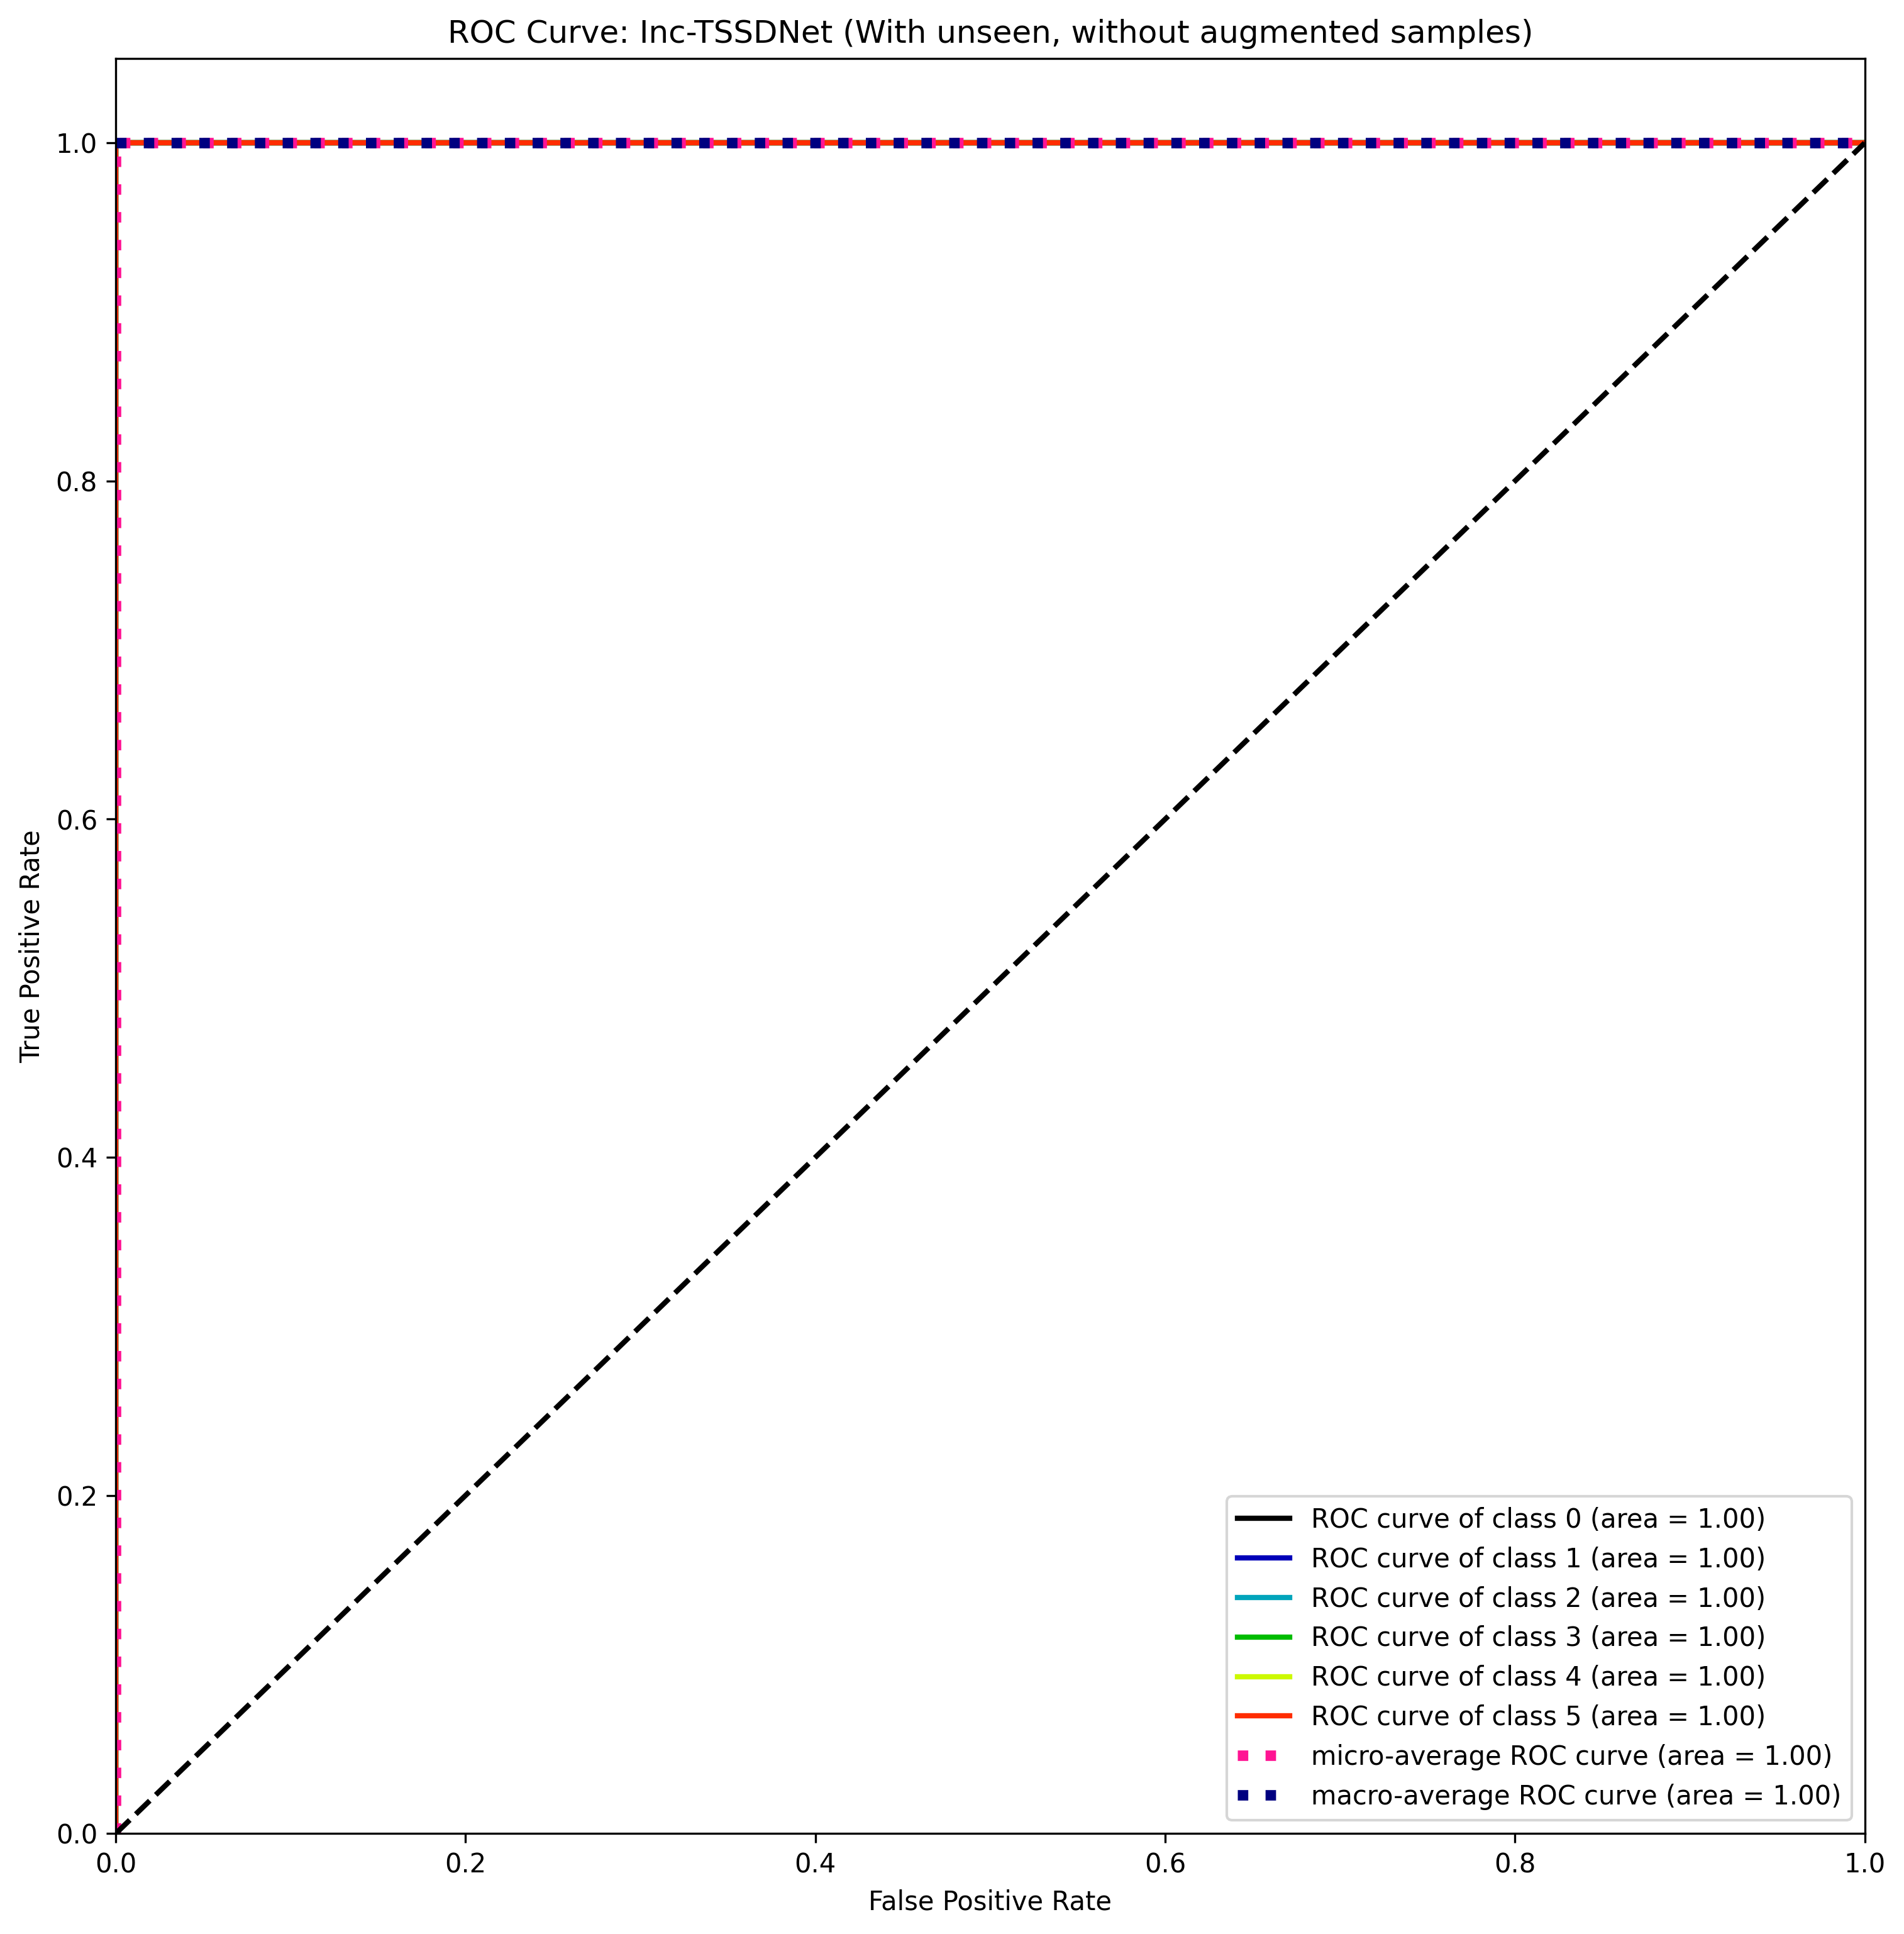

In [14]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    "/home/iubnlp/spcup22/SPCUP2022/checkpoints/inc_tssdnet_with_unseen_aug/last.ckpt"
)
data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_unseen_in_training_data=True,
)
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);
print_scores(actual_labels, predictions)
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "with_unseen_without_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (With unseen, without augmented samples)",
    save_path=fig_save_path
)